In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MaxNLocator
from matplotlib.lines import Line2D 
from numpy import trapz
from sklearn.manifold import MDS
import statsmodels.api as sm
from sklearn.metrics import euclidean_distances
from statistics import mean, stdev

## Gap hw to users (Global)

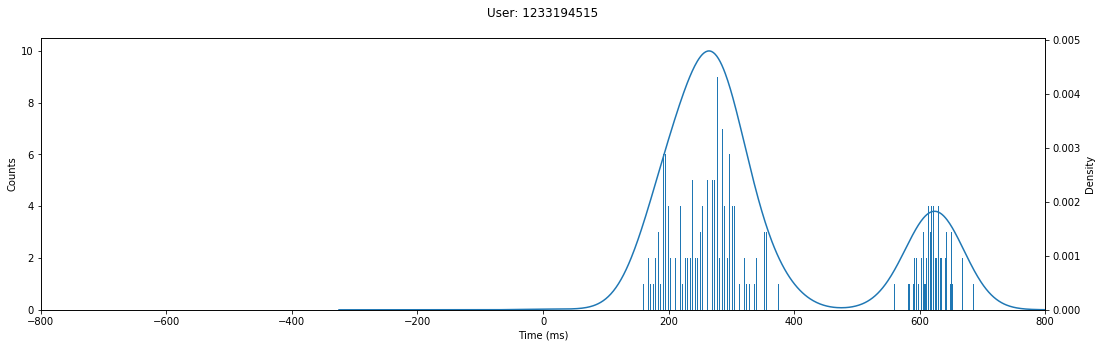

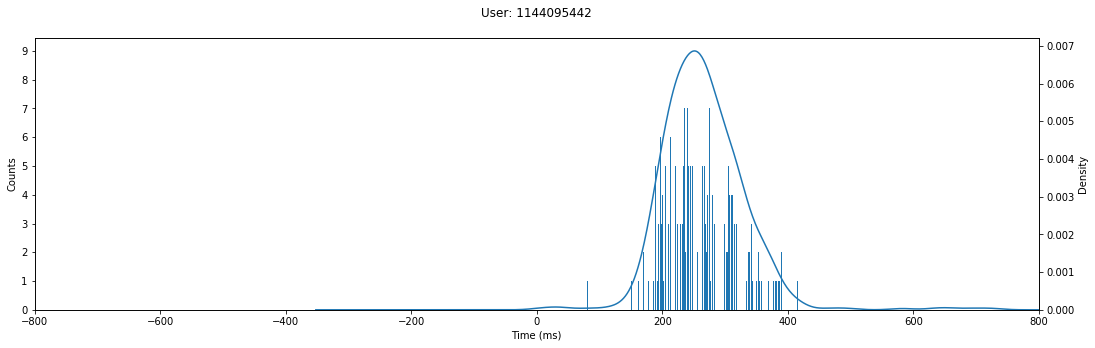

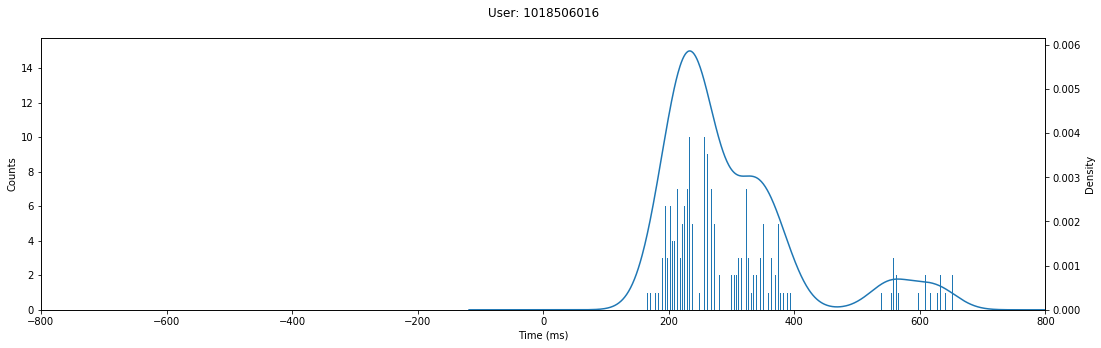

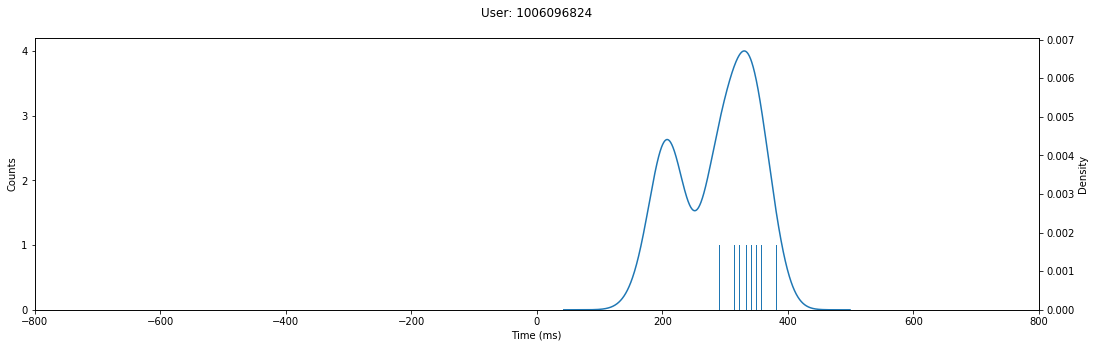

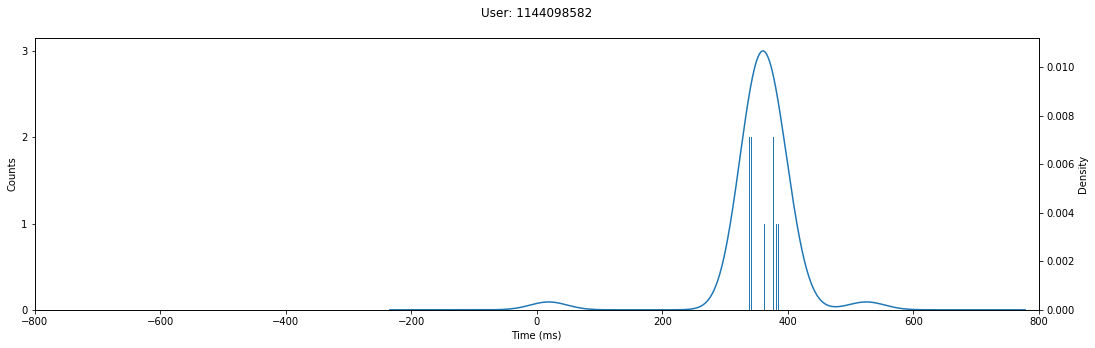

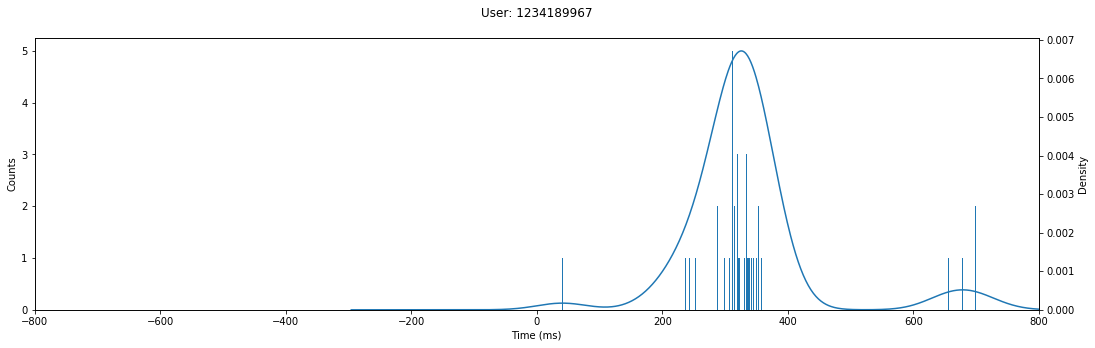

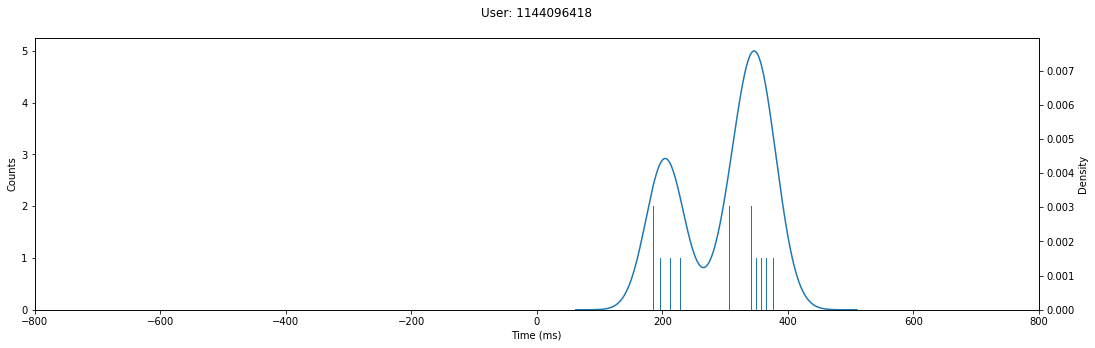

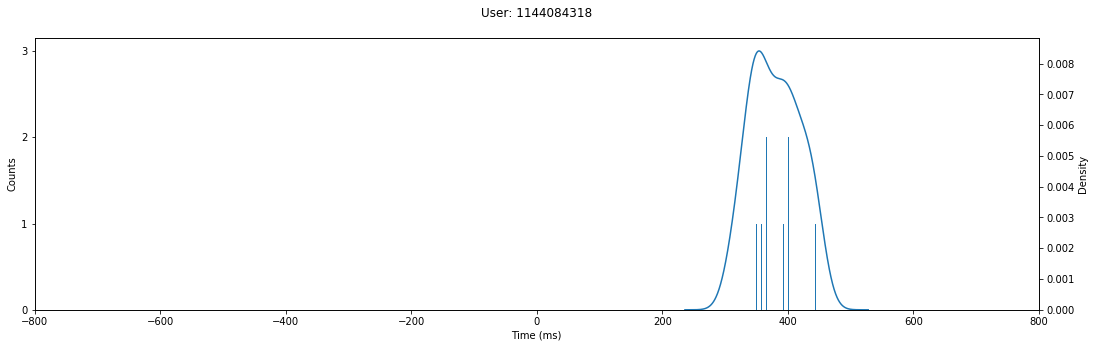

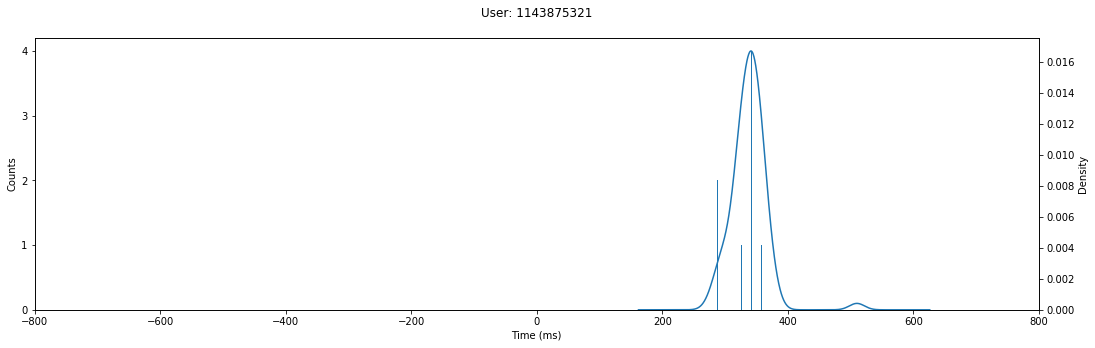

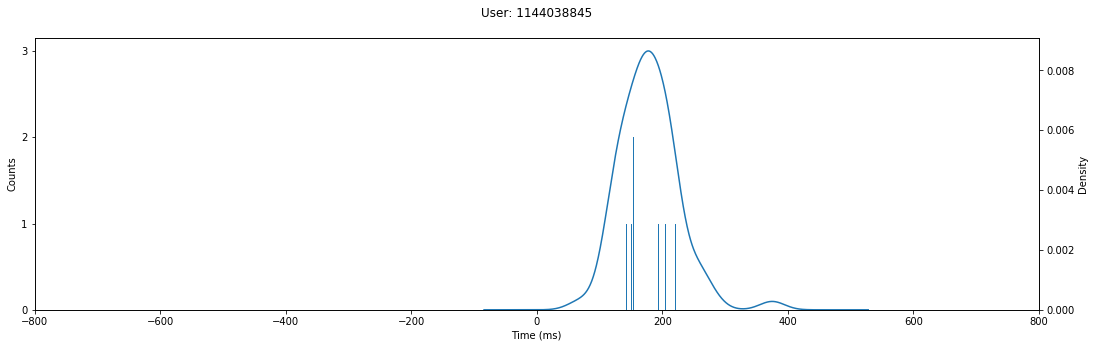

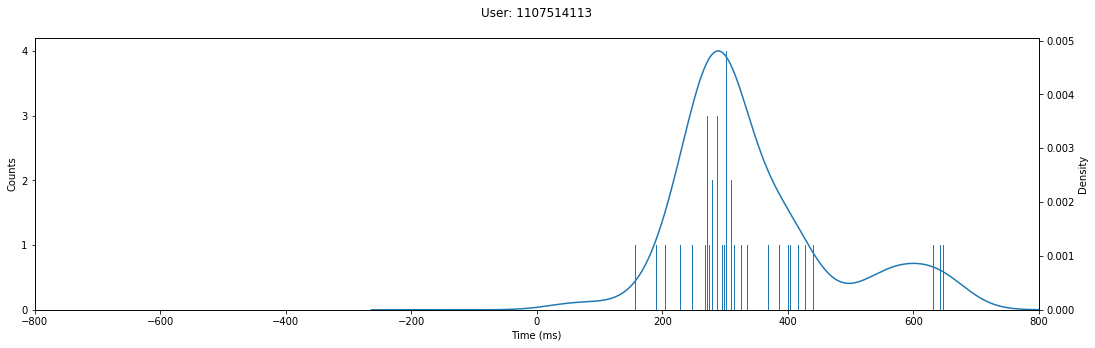

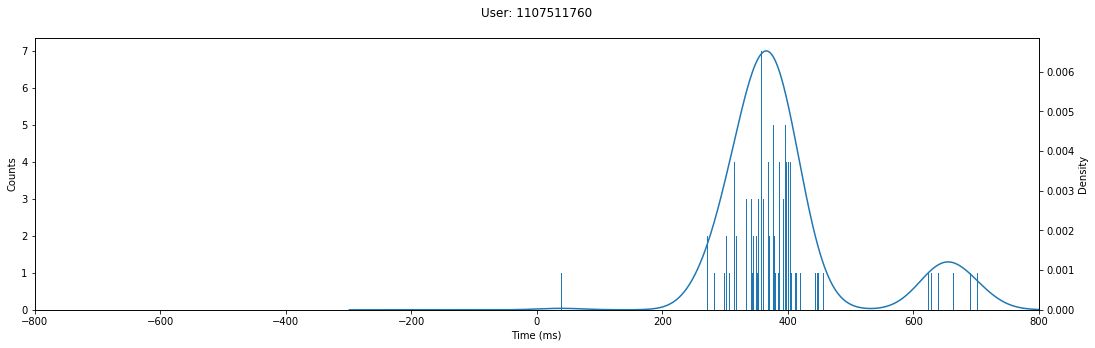

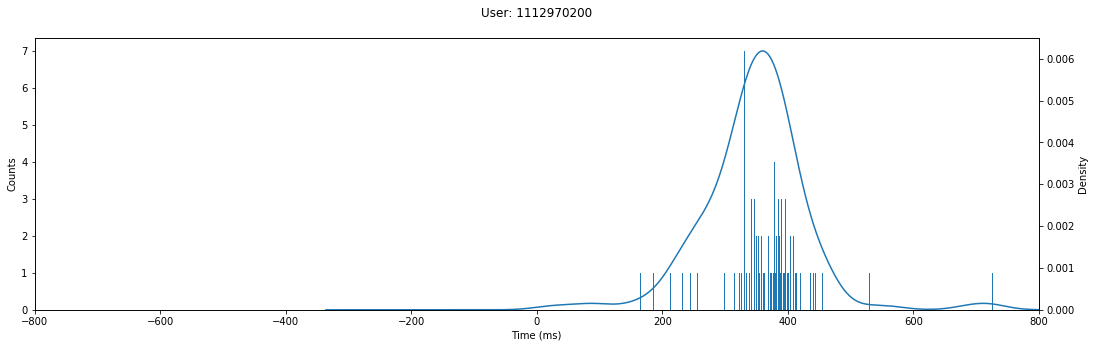

In [2]:
f = open("Data/Global_Hw/gap_hw.txt", "r")
global_dict_gaps = {}
users_kde = {}
sharp_dict = {}
for linea in f:

    list_gaps = []

    data = linea.split("_")
    values = data[1].split(" ")
    if len(values) >0 :
        for x in values:
            if (x != '\n') and (x != "") :
                list_gaps.append(float(x))
    global_dict_gaps[data[0]] = list_gaps
    
f.close()

dict_gap_hw = {}
for user in global_dict_gaps:
    sharp_dict[user] = mean(global_dict_gaps[user]) / stdev(global_dict_gaps[user])
    data = pd.DataFrame(global_dict_gaps[user])
    
    fig, ax1 = plt.subplots(1,1, figsize = (18,5))
    ax1.hist(global_dict_gaps[user], bins=1600)
    ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
   
    ax2 = ax1.twinx()
    
    
    ax1.set_xlabel('Time (ms)')
    ax1.set_ylabel('Counts')
    ax1.set_xlim(right=800, left=-800)
    
    kde = data.plot(kind='kde', ax=ax2, secondary_y=False)
    ax2.set_ylim(bottom=0)
    ax2.get_legend().remove()
    
    
    array_kde_y = kde.get_children()[0]._y
    array_kde_x = kde.get_children()[0]._x
    
    users_kde[user] = kde.get_children()[0]
    
    max_inx = np.argmax(array_kde_y)
    max_kde_value_y = array_kde_y[max_inx]
    max_kde_value_x = array_kde_x[max_inx]
    
    dict_gap_hw[user] = max_kde_value_x
    
    plt.title("User: "+user+"\n")
    plt.show()

### List of gap hw from users

In [3]:
for user in dict_gap_hw:
    print("User: "+ user+" Gap Hw: "+str(dict_gap_hw[user]))

User: 1233194515 Gap Hw: 264.66566566566564
User: 1144095442 Gap Hw: 251.72372372372377
User: 1018506016 Gap Hw: 233.55555555555554
User: 1006096824 Gap Hw: 330.56756756756755
User: 1144098582 Gap Hw: 360.63863863863867
User: 1234189967 Gap Hw: 326.467967967968
User: 1144096418 Gap Hw: 346.3163163163163
User: 1144084318 Gap Hw: 354.0860860860861
User: 1143875321 Gap Hw: 341.28328328328325
User: 1144038845 Gap Hw: 177.5855855855856
User: 1107514113 Gap Hw: 288.8123123123123
User: 1107511760 Gap Hw: 365.01351351351354
User: 1112970200 Gap Hw: 359.95195195195197


## Gap hw to users (Individual)

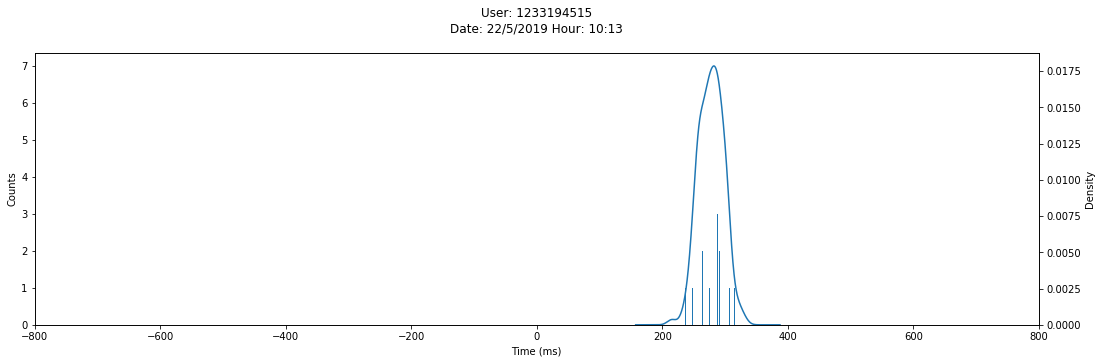

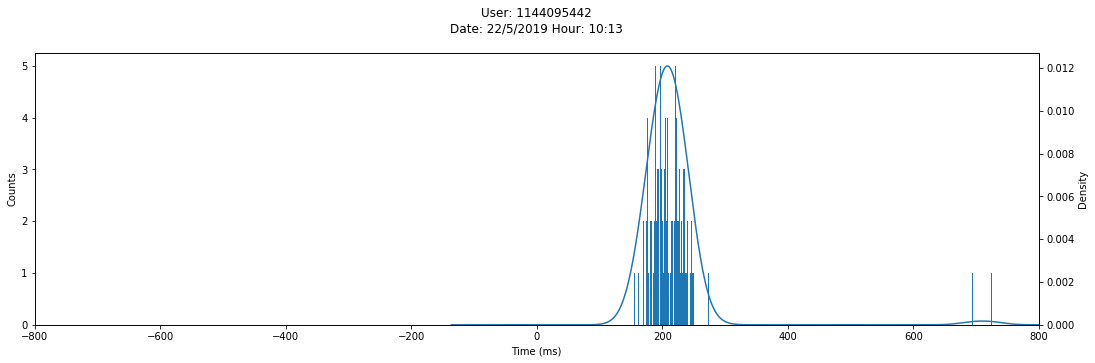

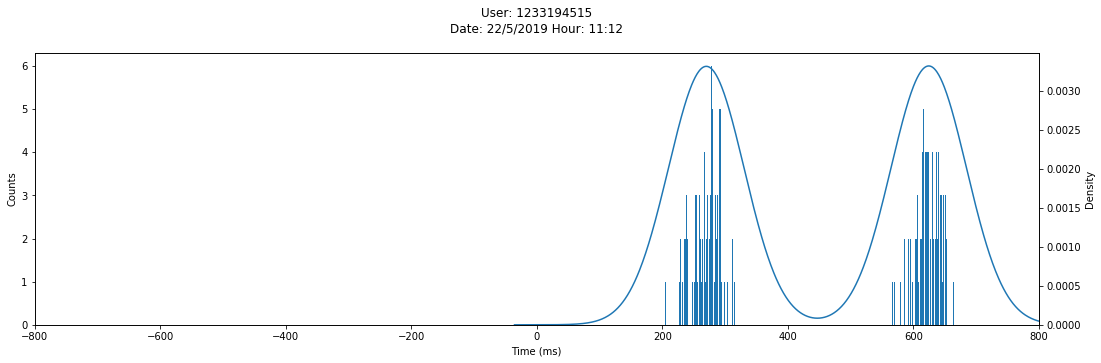

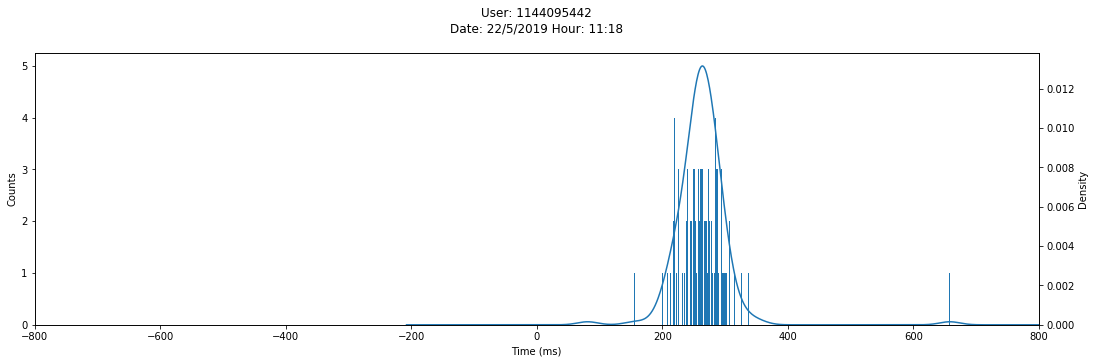

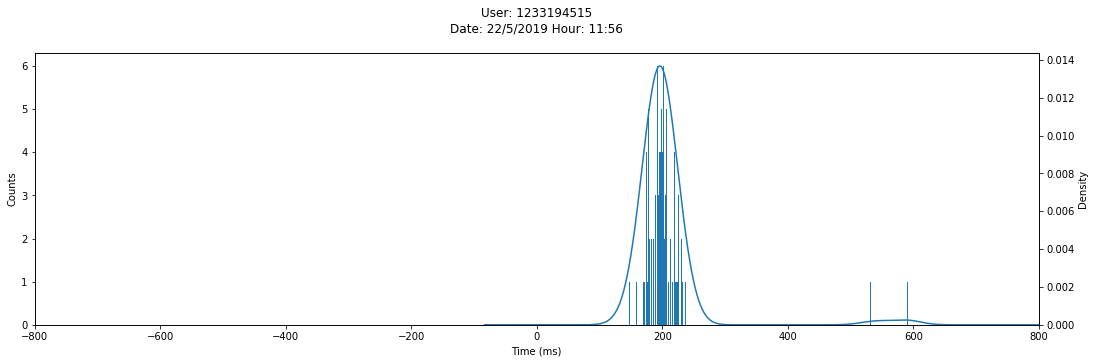

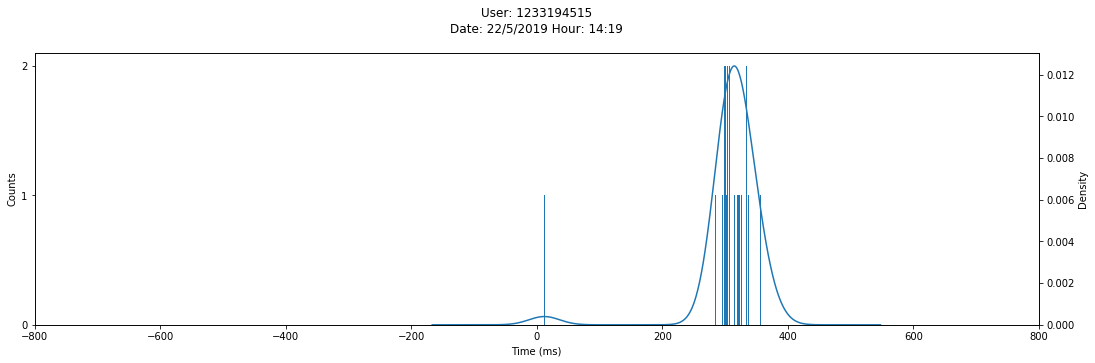

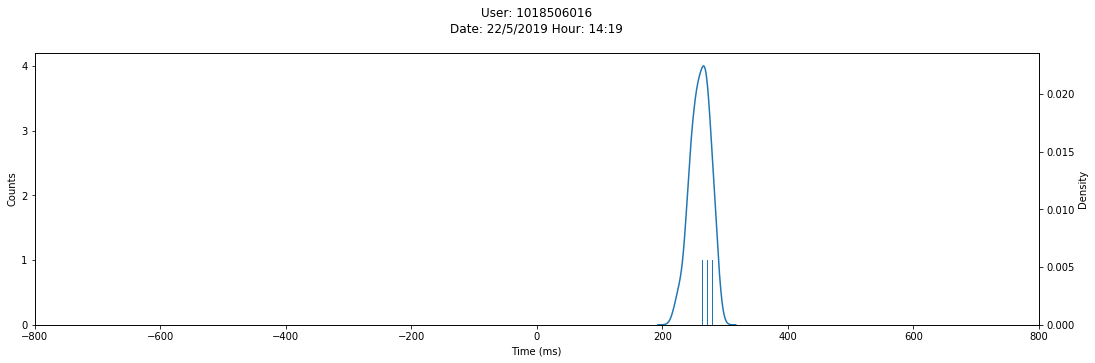

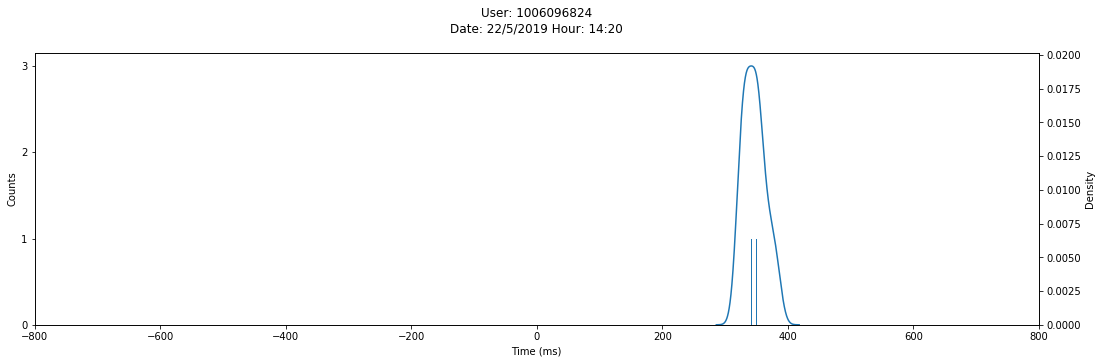

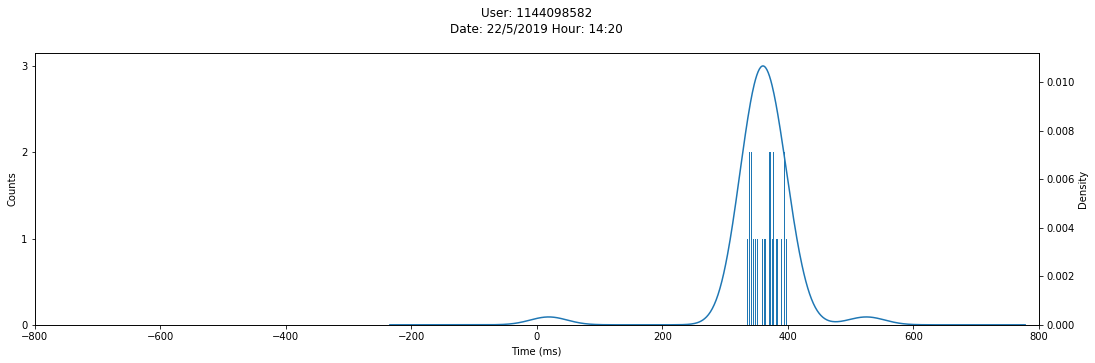

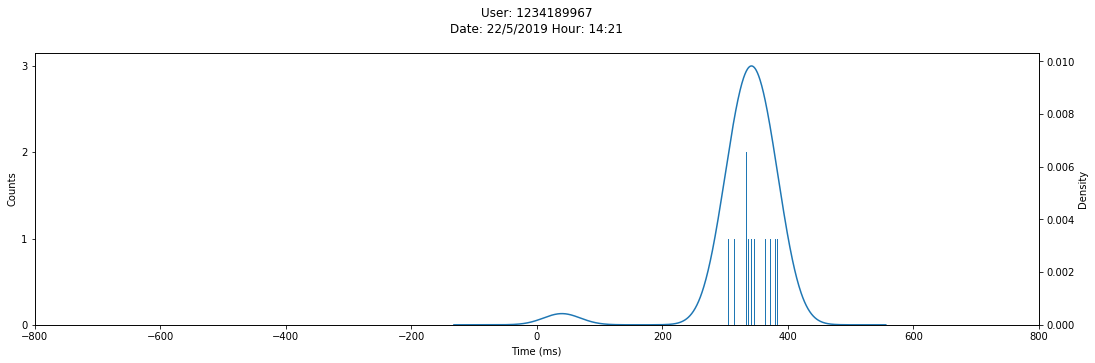

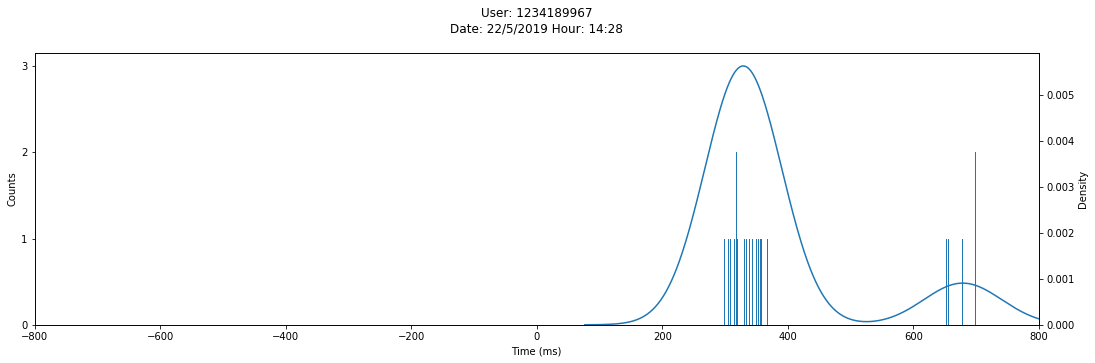

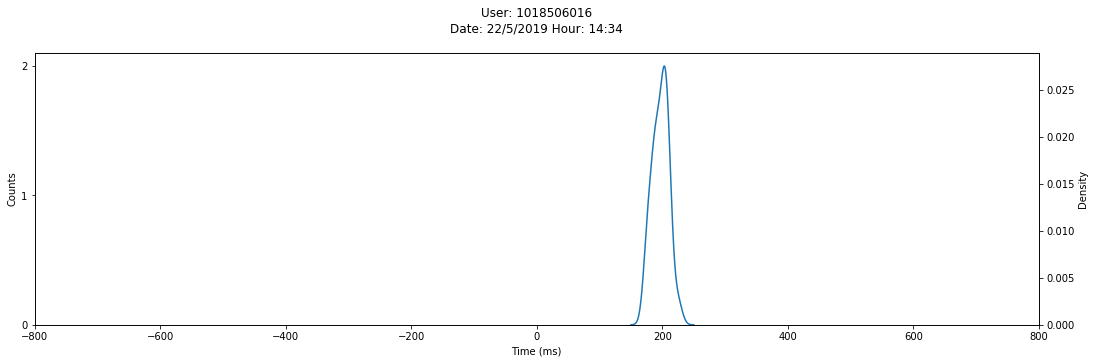

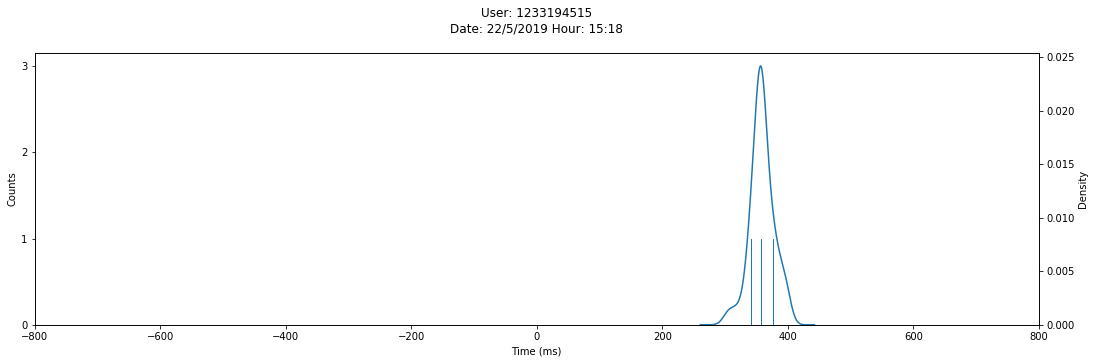

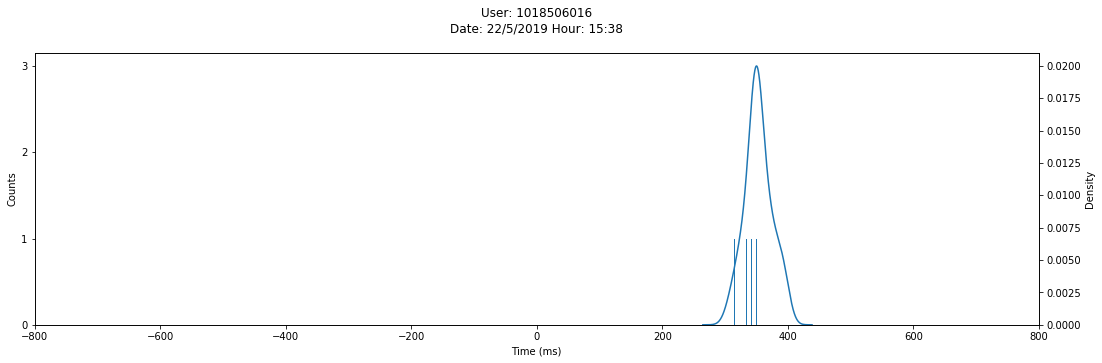

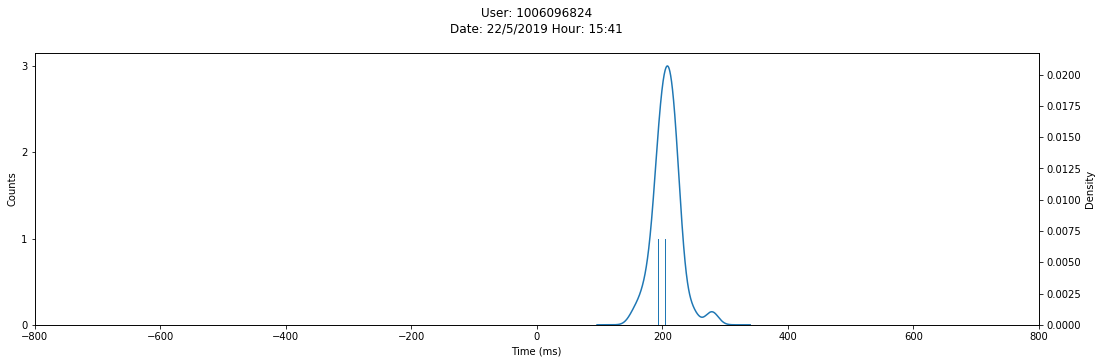

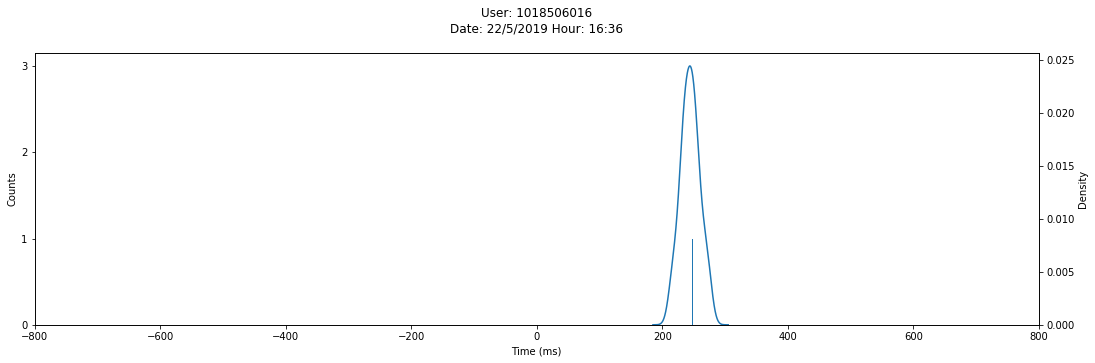

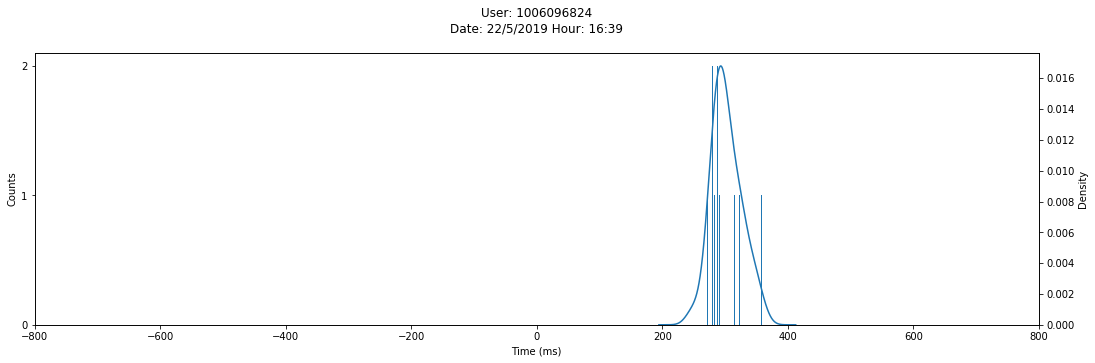

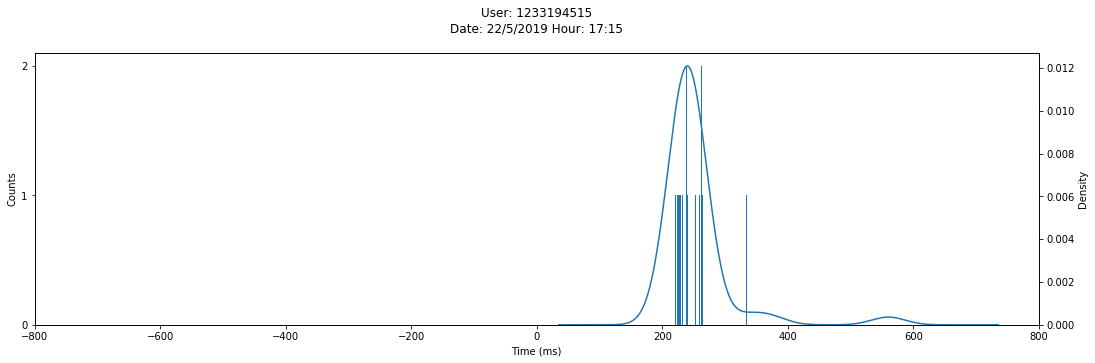

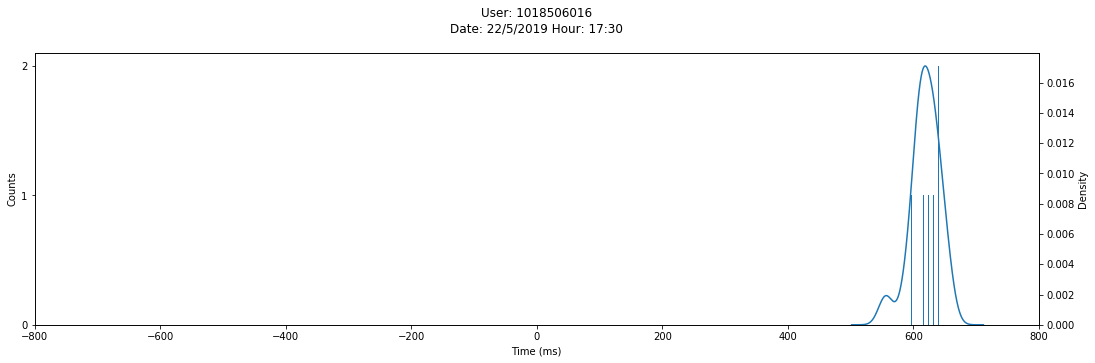

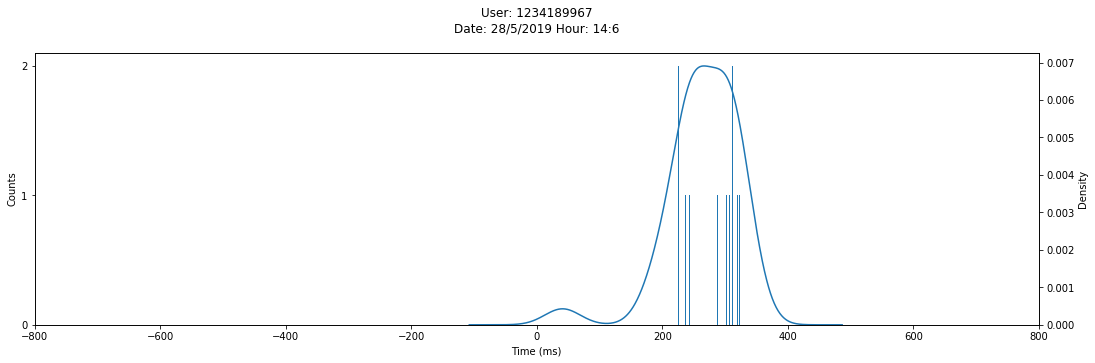

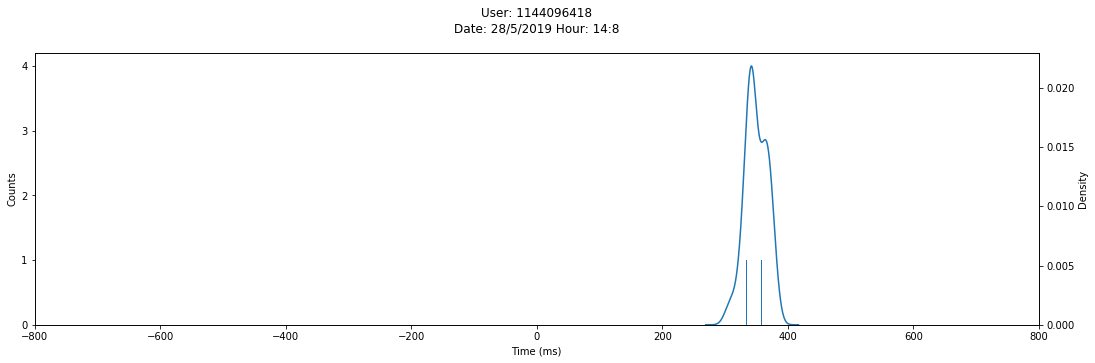

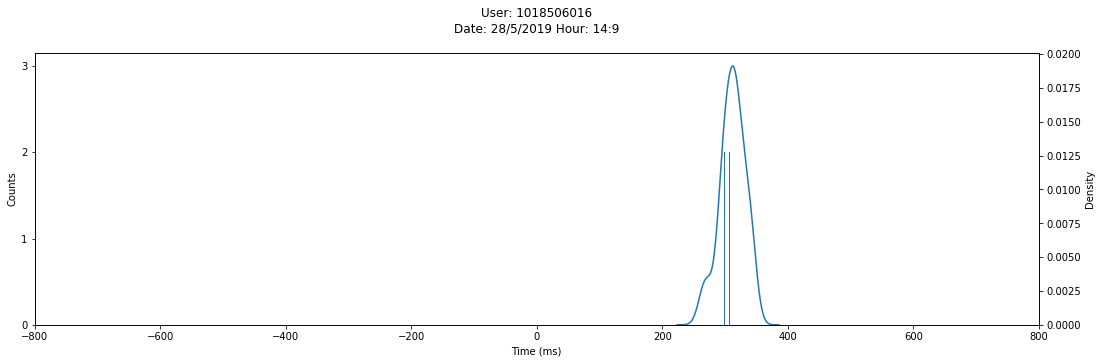

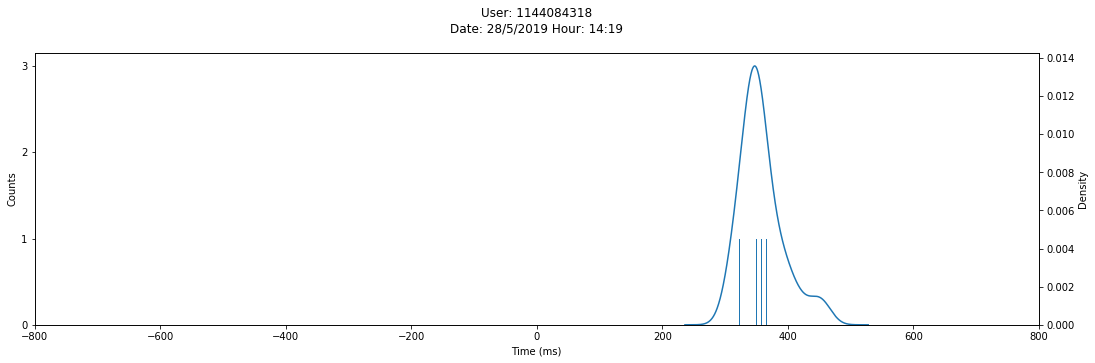

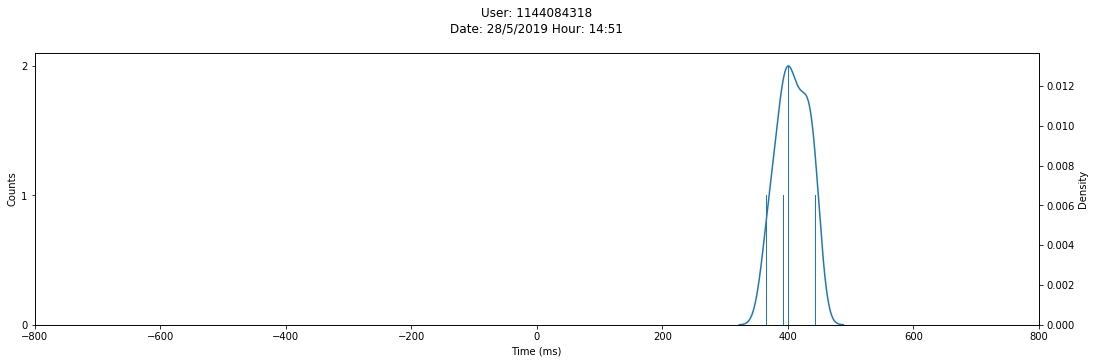

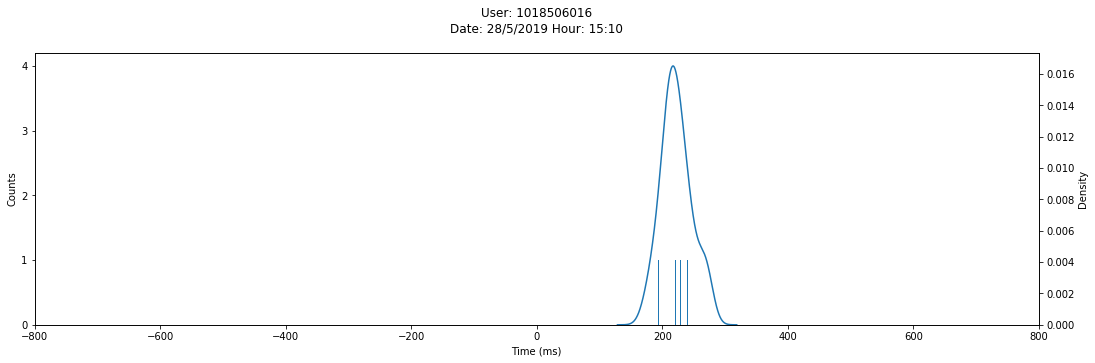

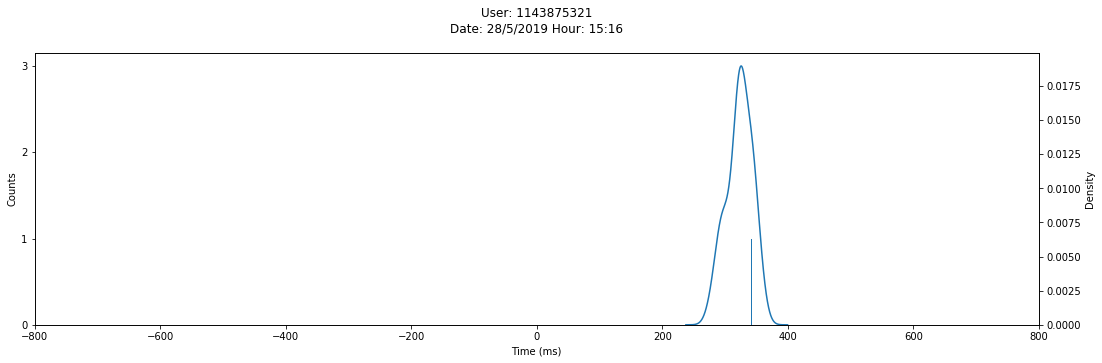

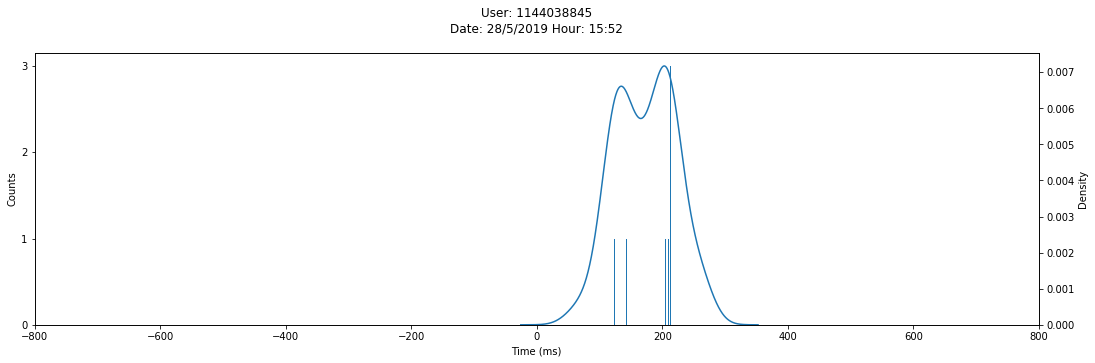

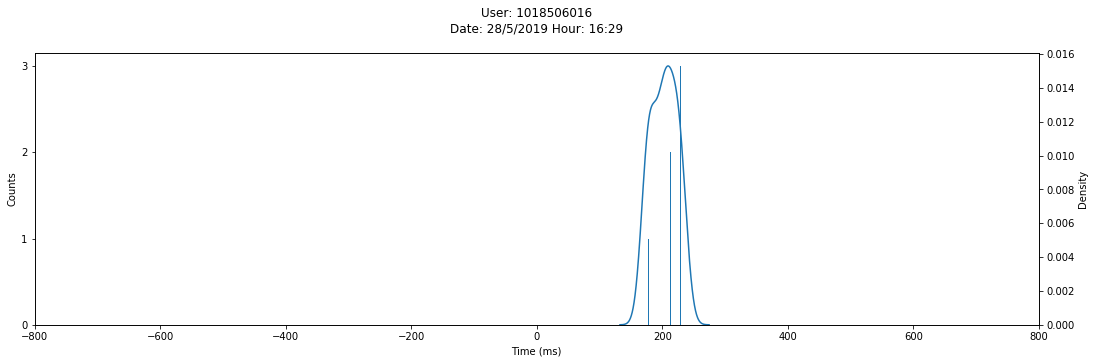

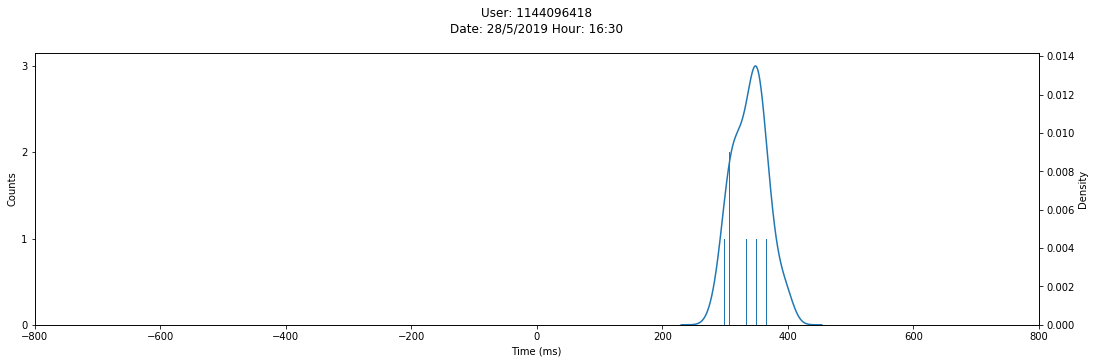

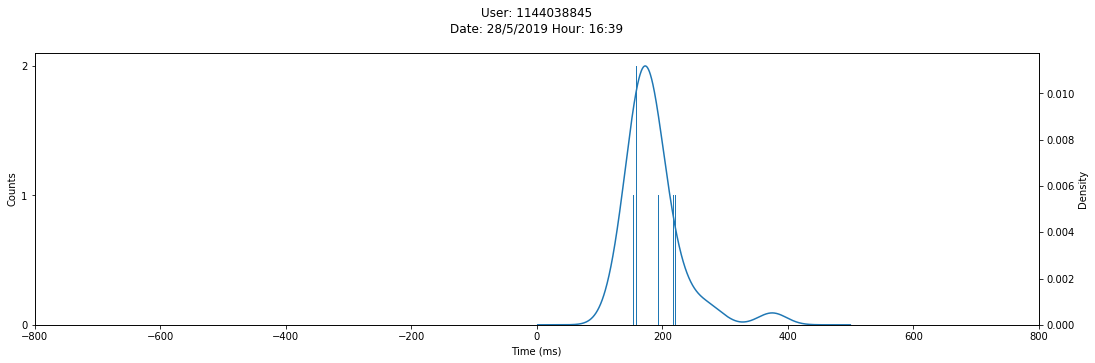

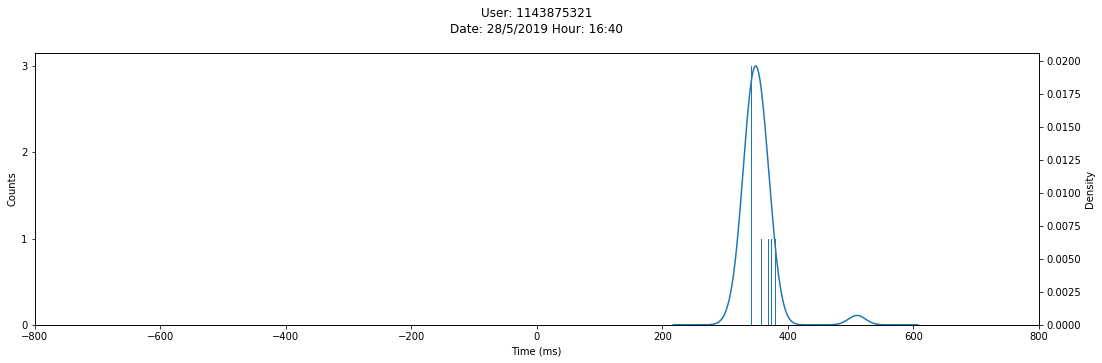

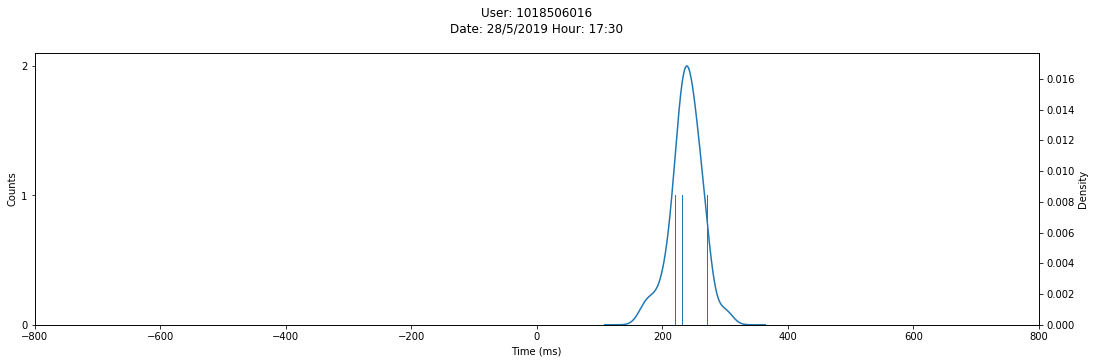

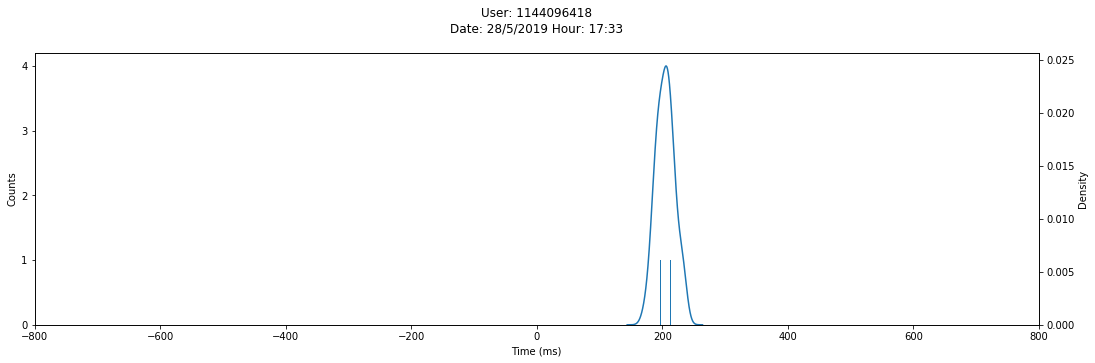

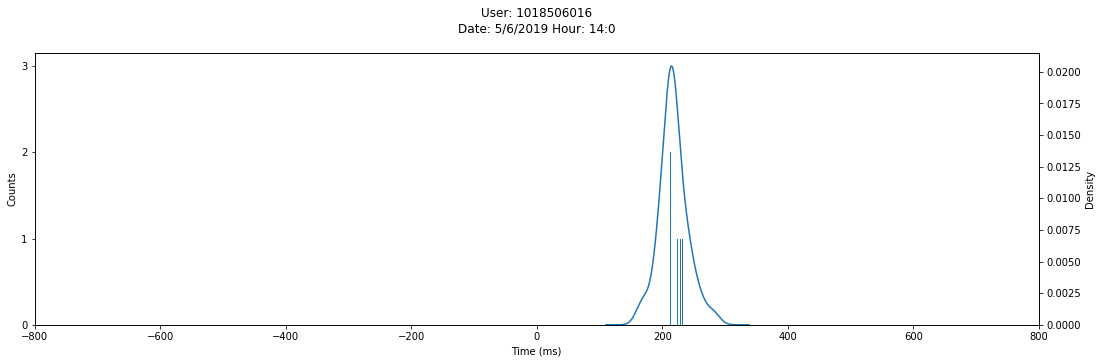

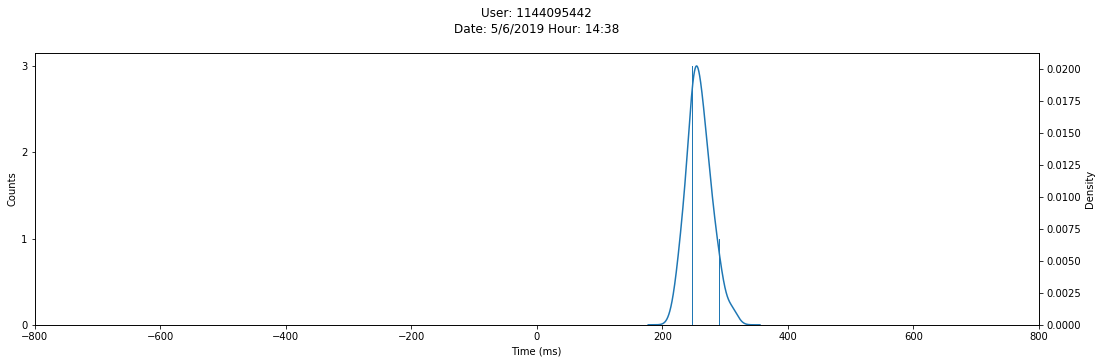

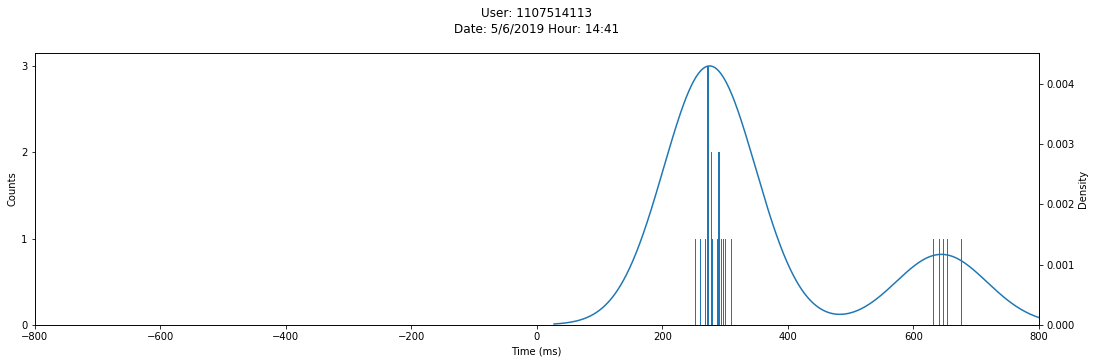

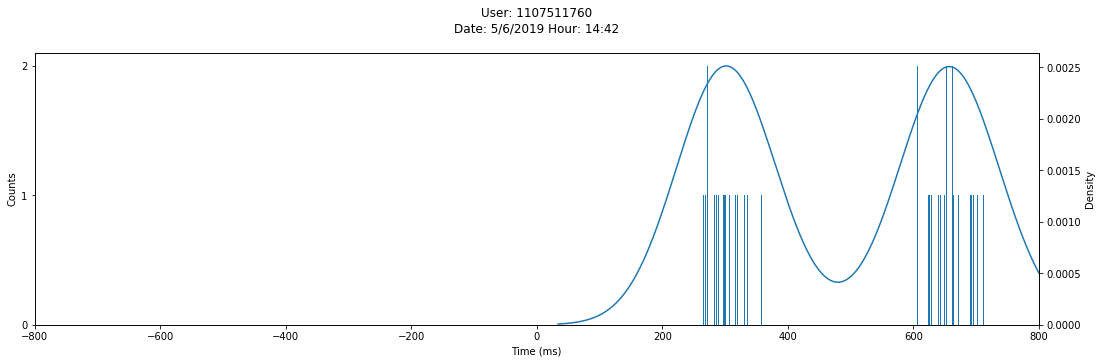

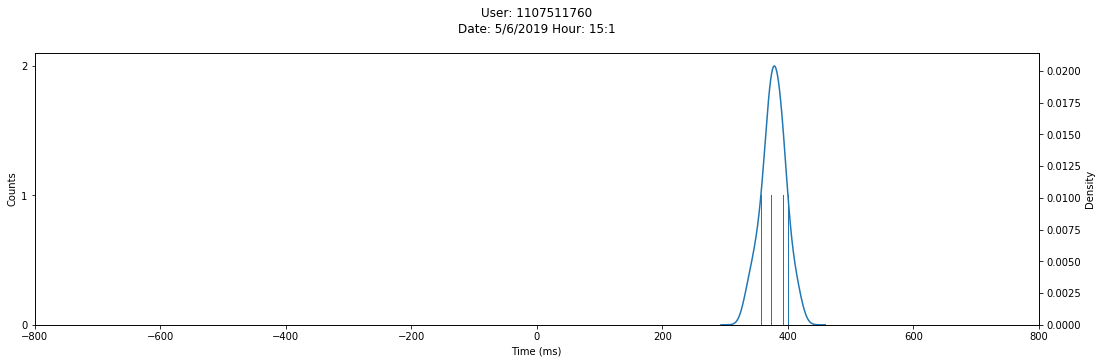

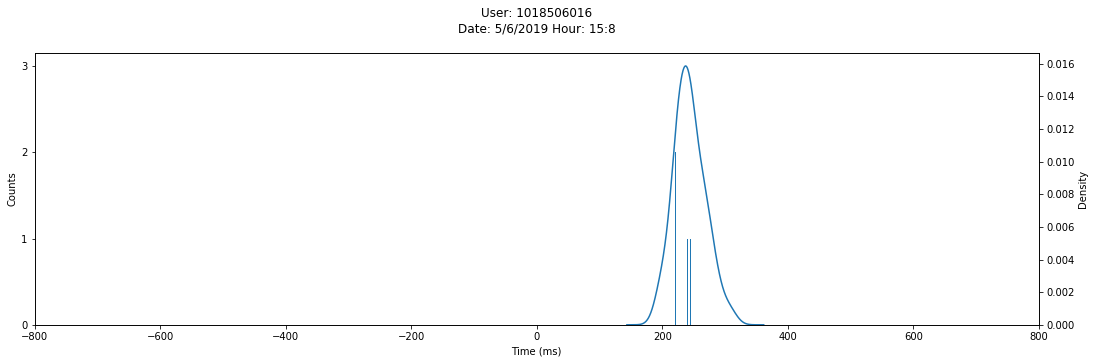

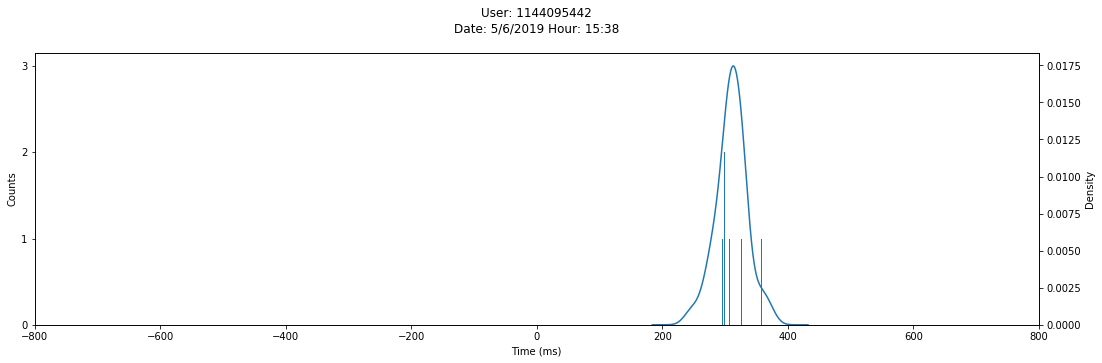

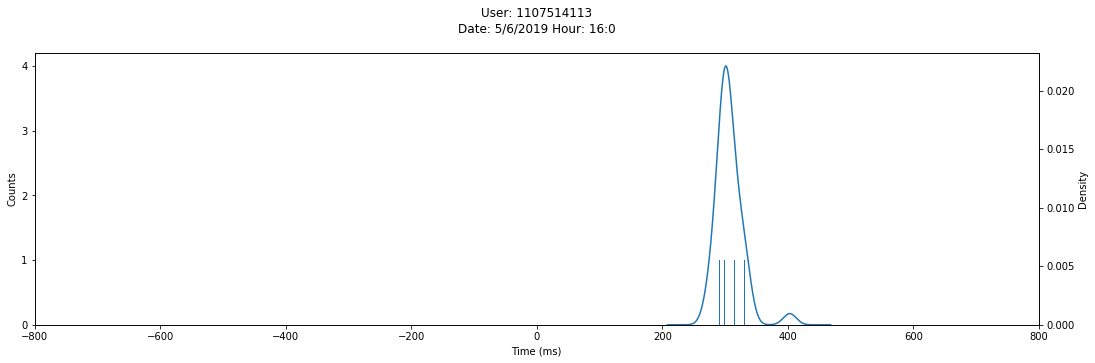

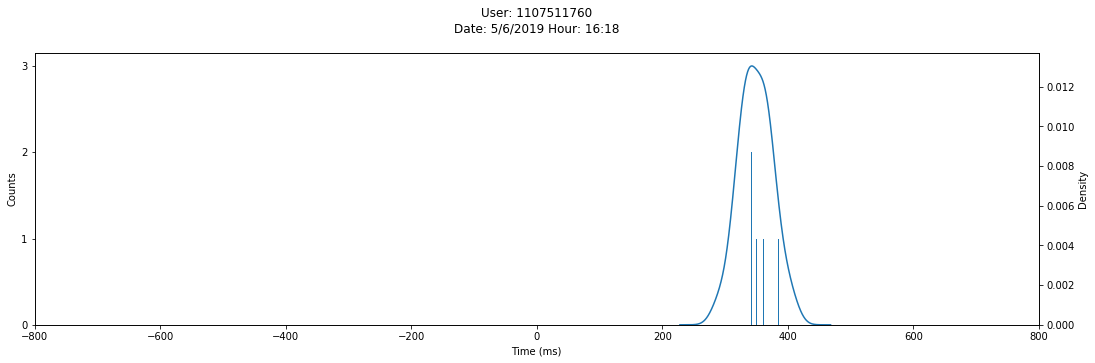

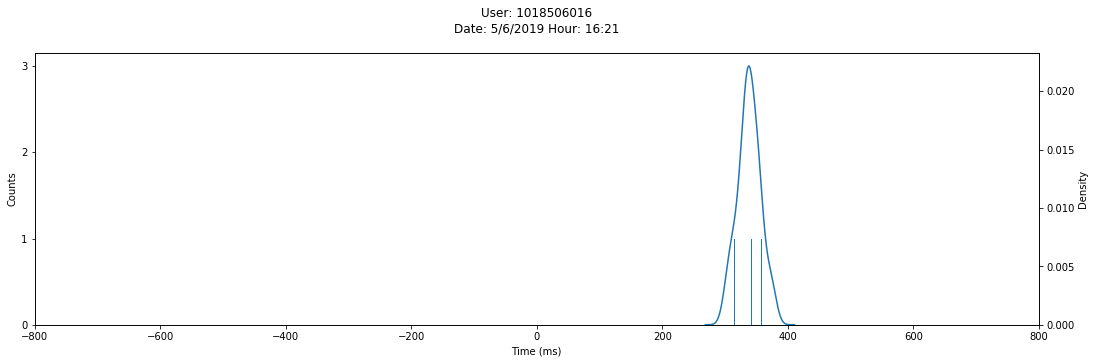

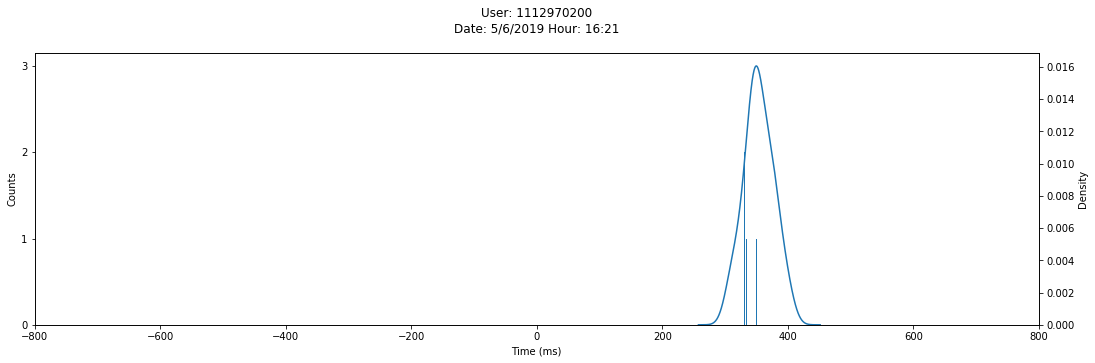

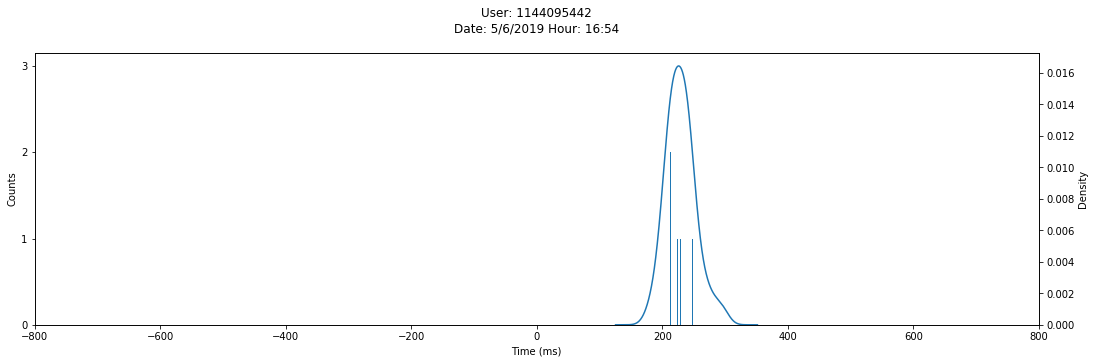

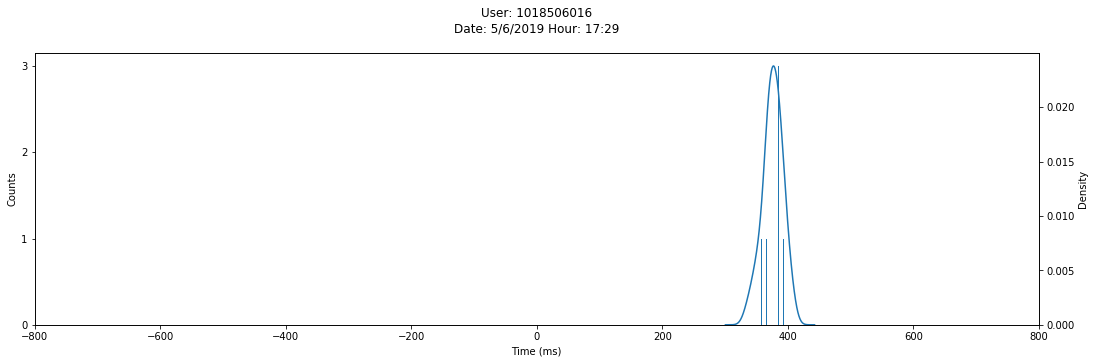

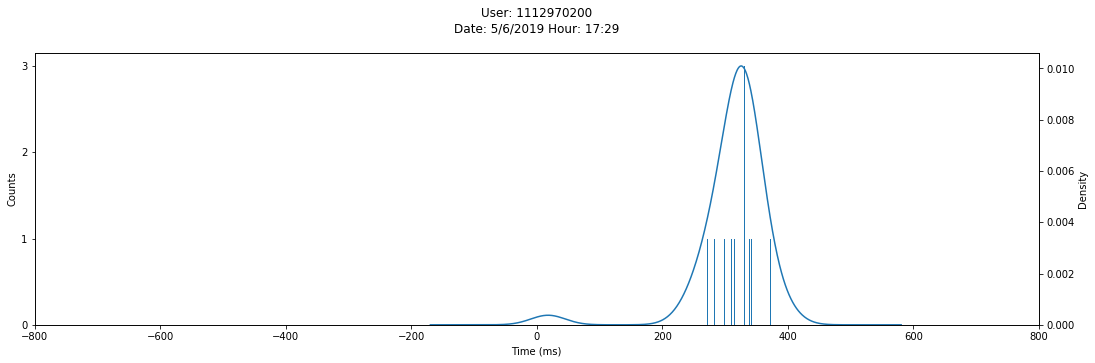

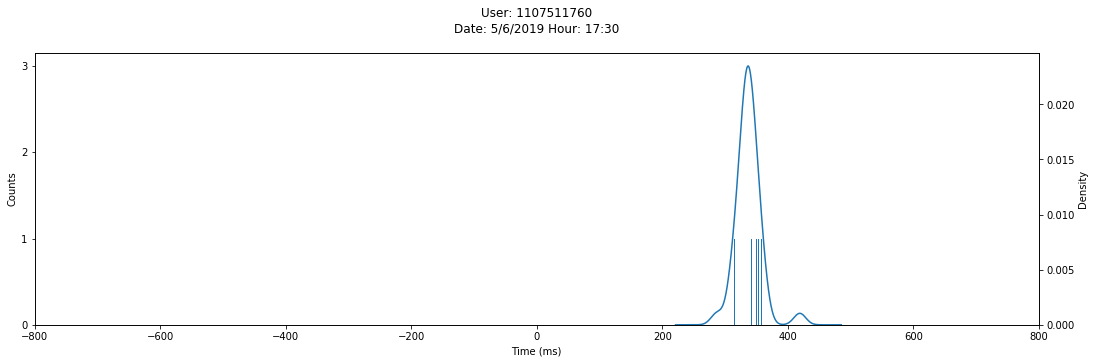

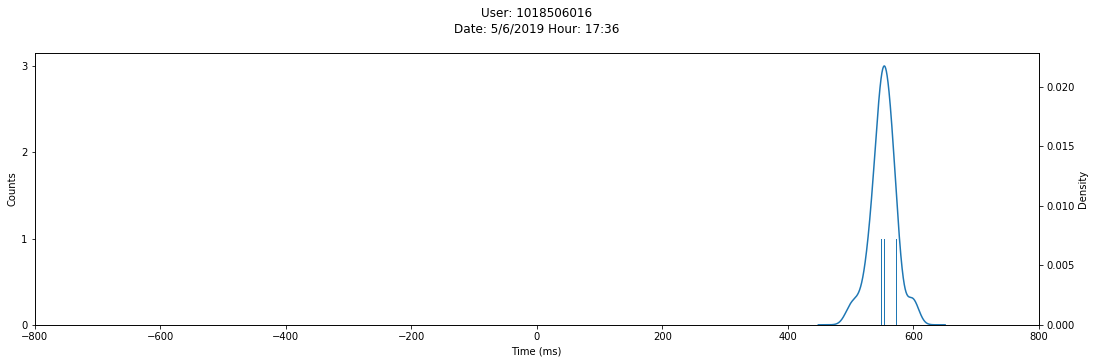

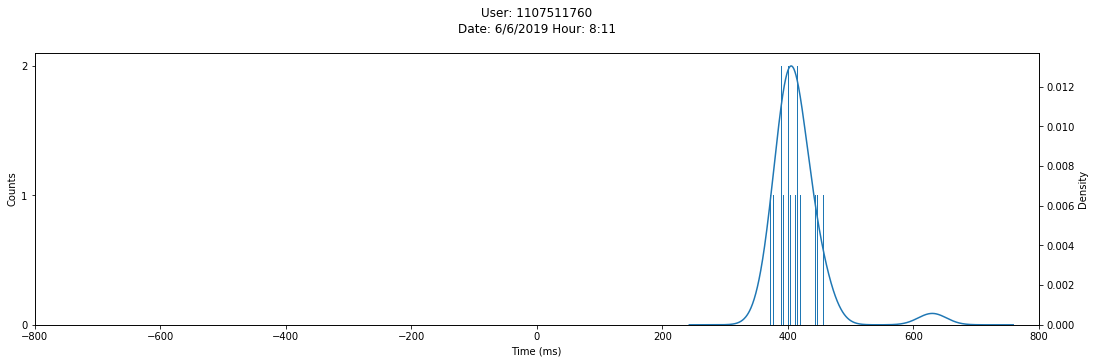

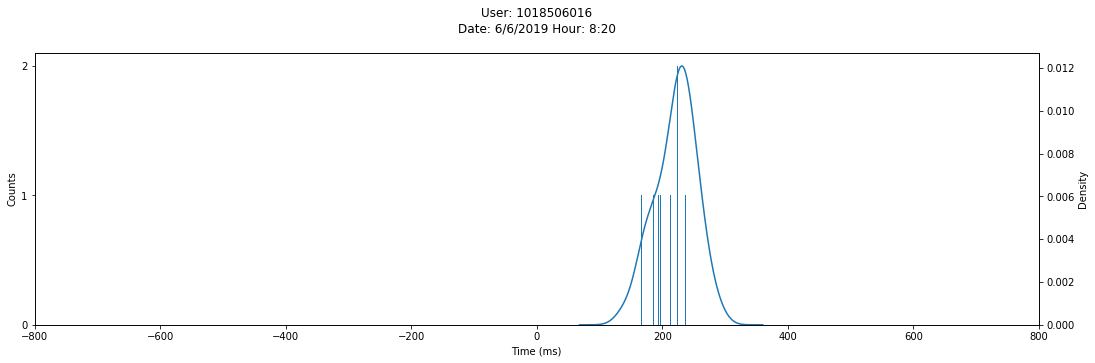

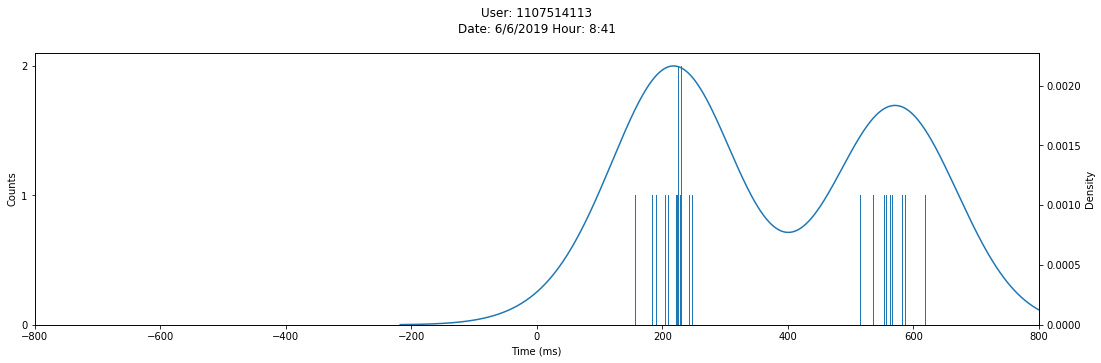

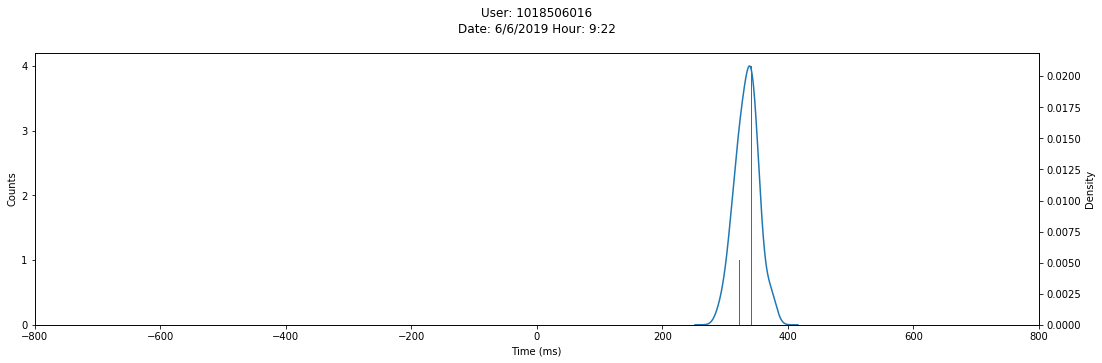

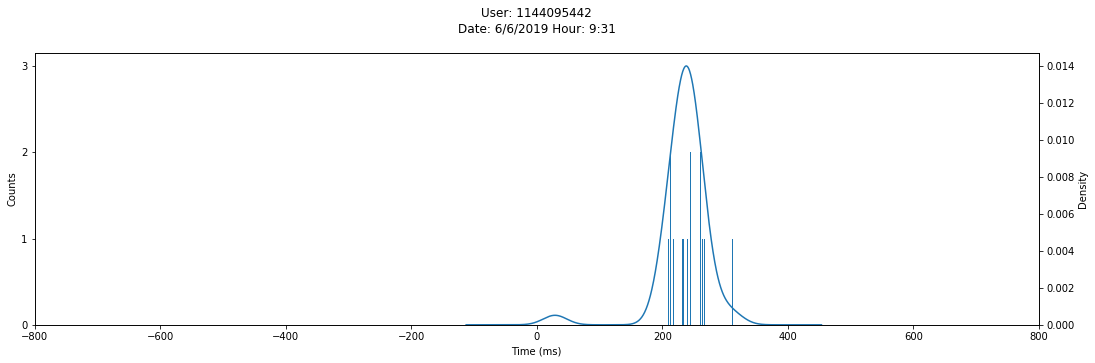

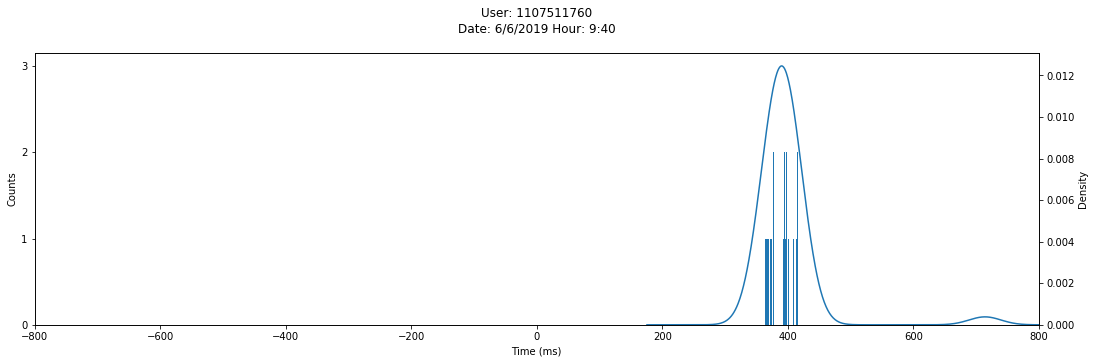

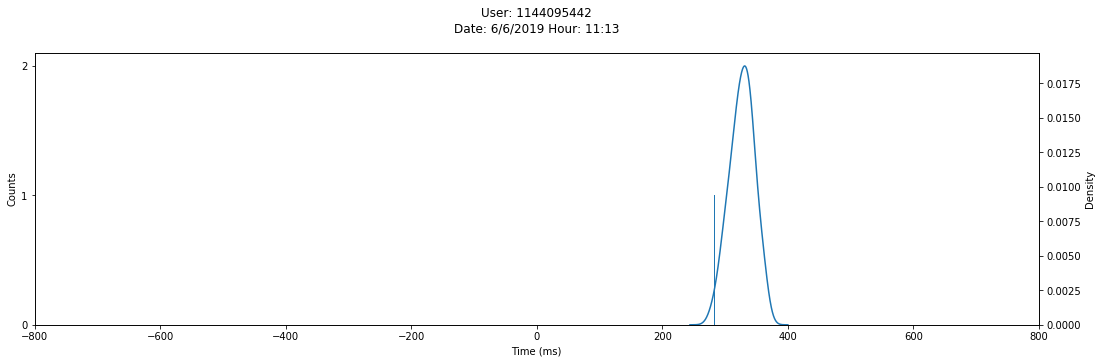

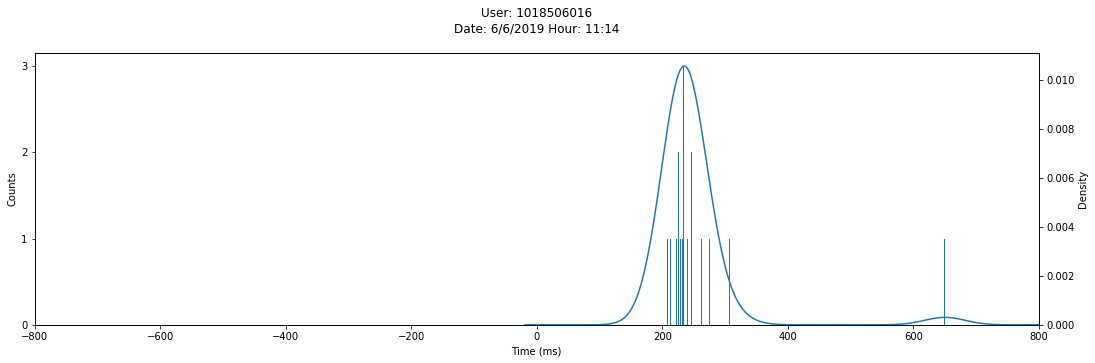

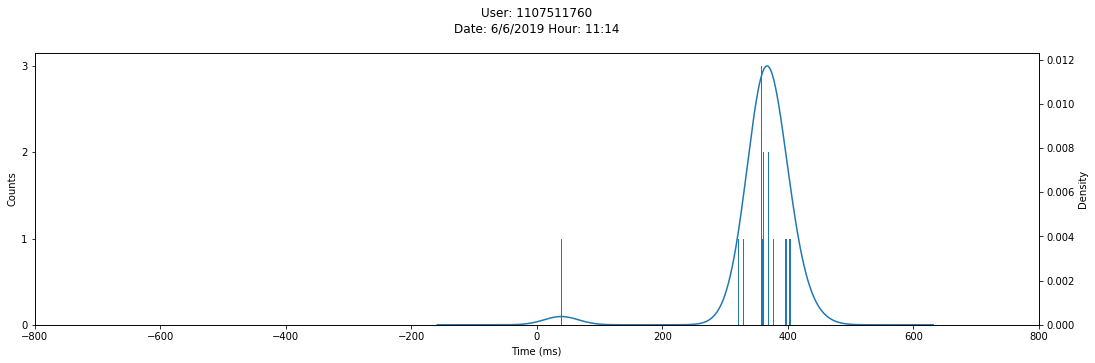

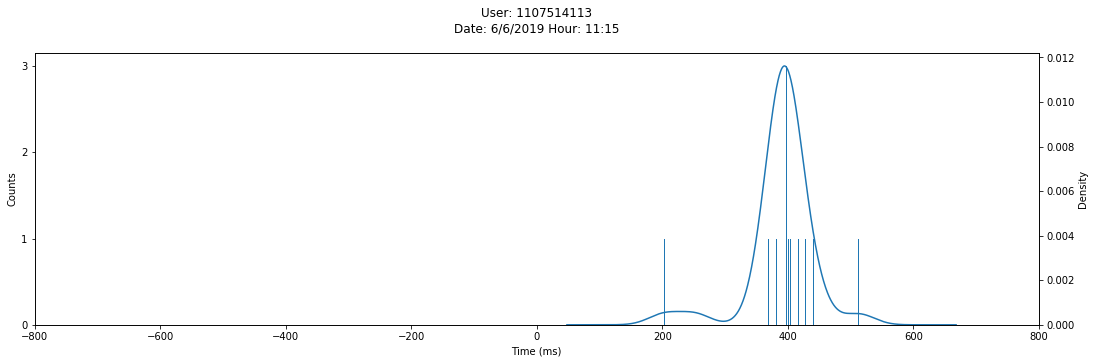

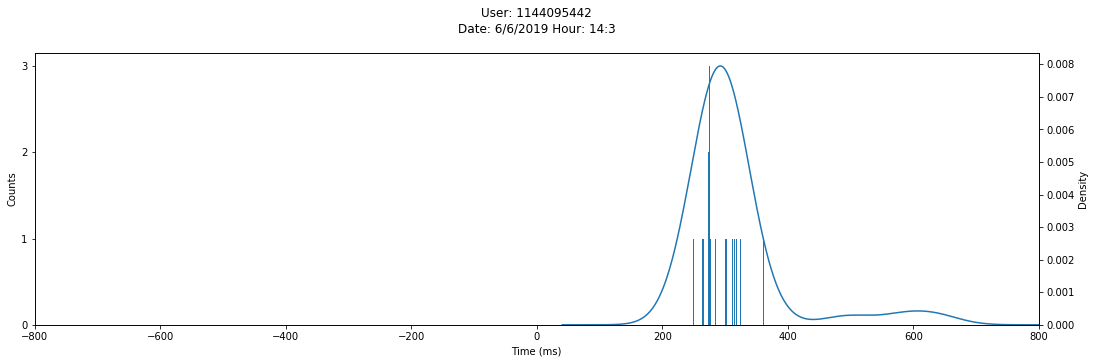

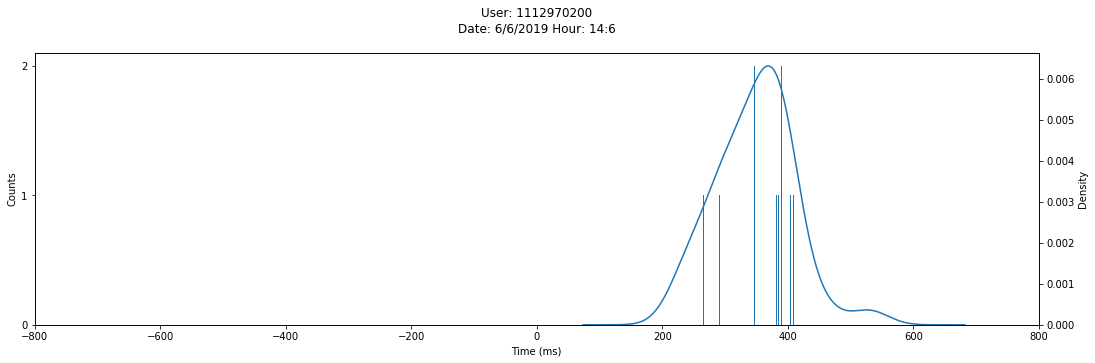

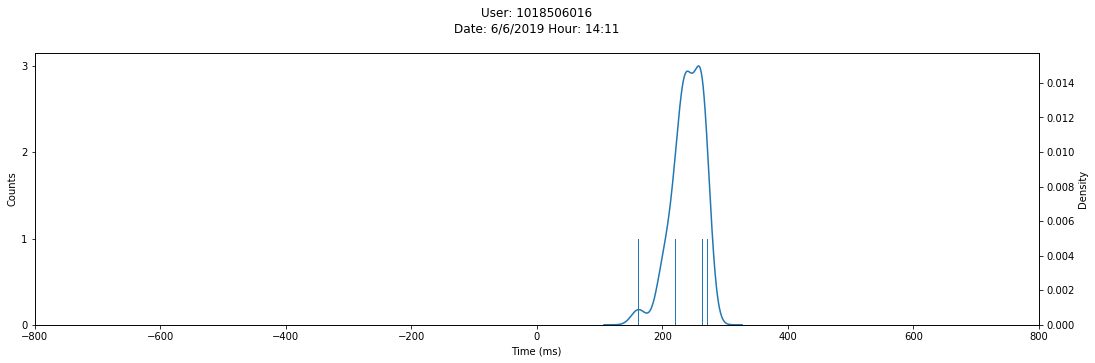

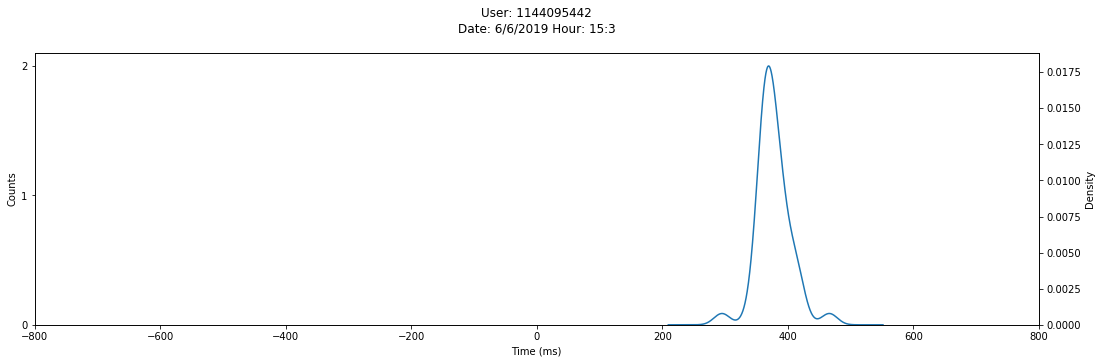

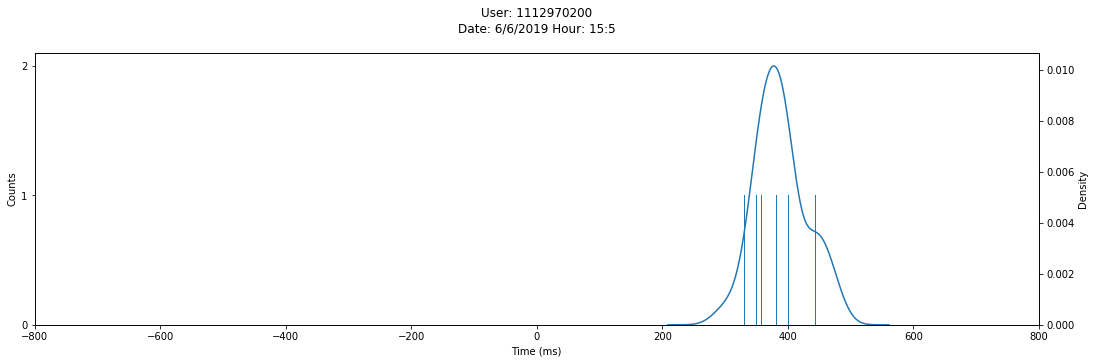

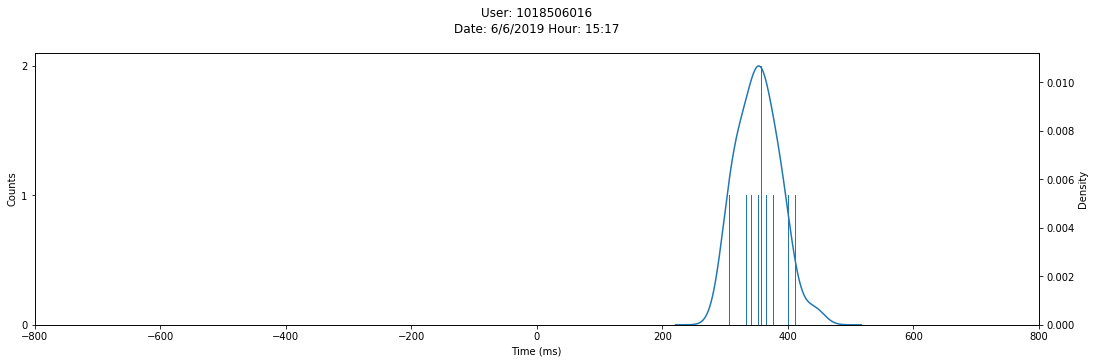

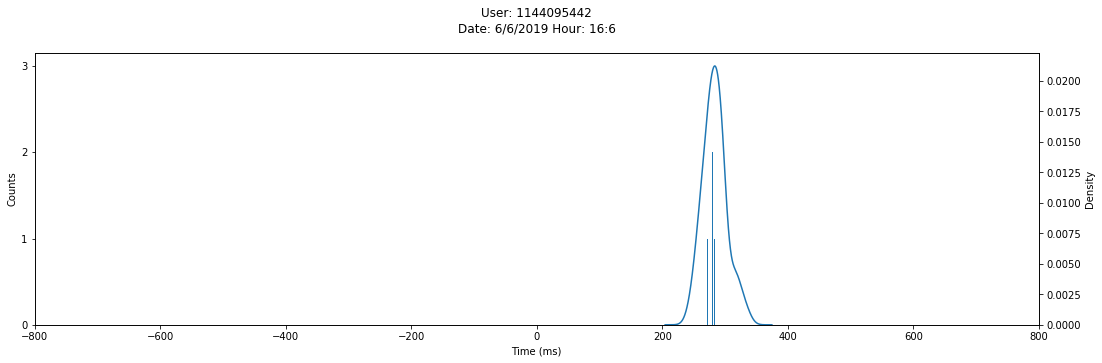

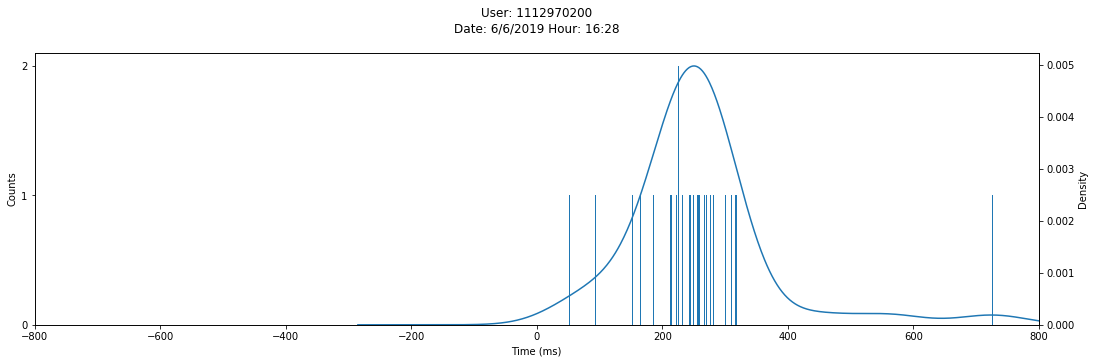

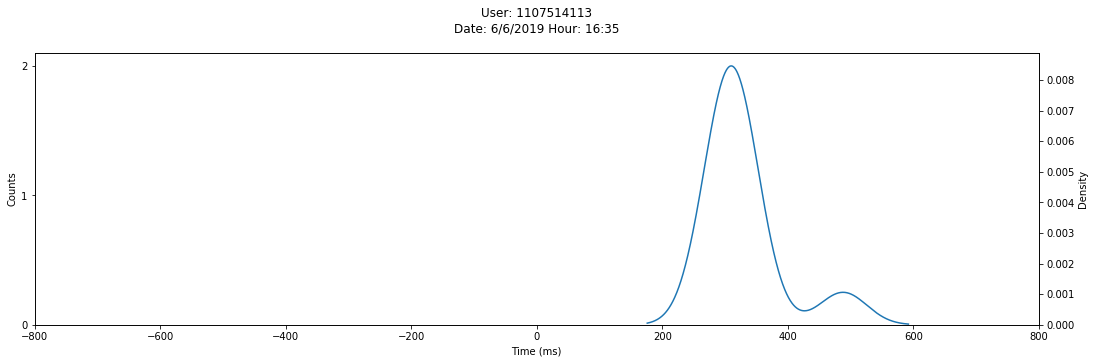

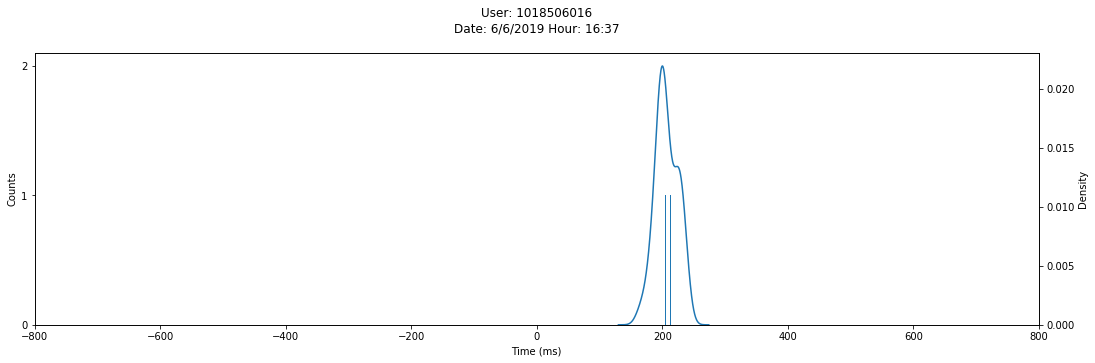

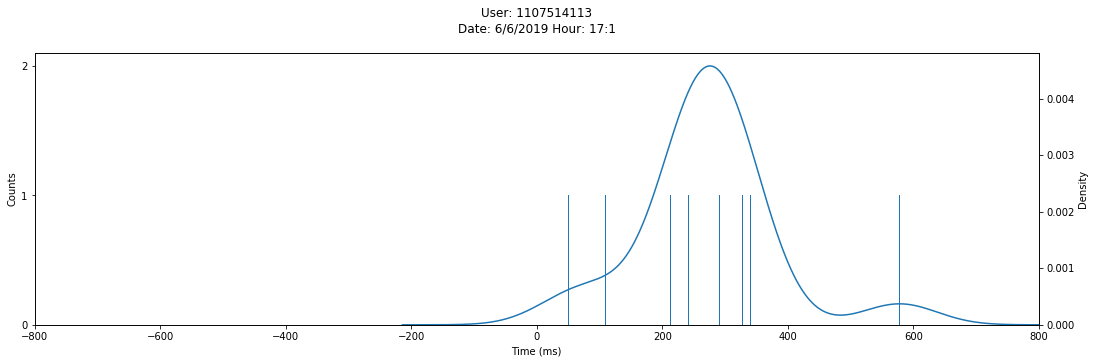

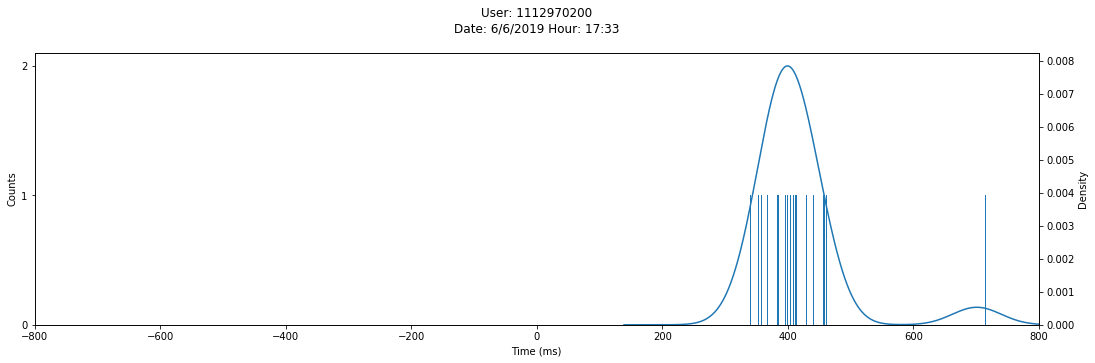

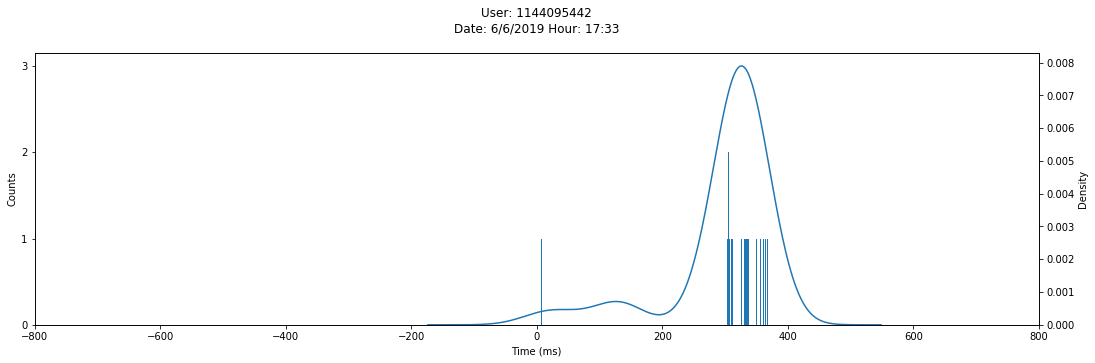

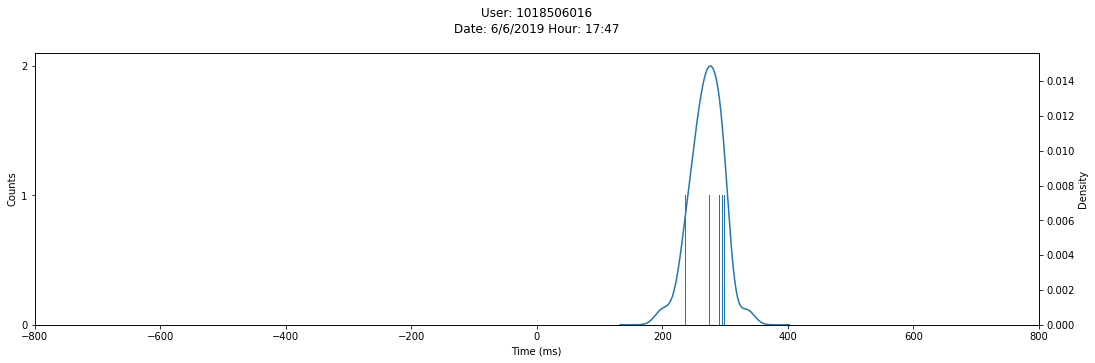

In [4]:
f = open("Data/Individual_Hw/gap_hw.txt", "r")
dict_gaps = {}

for linea in f:

    list_gaps = []

    data = linea.split("_")
    values = data[2].split(" ")
    if len(values) >0 :
        for x in values:
            if (x != '\n') and (x != "") :
                list_gaps.append(float(x))
    dict_gaps[data[0]+"_"+data[1]] = list_gaps
    
f.close()

dict_gap_hw = {}
for user in dict_gaps:
    data = pd.DataFrame(dict_gaps[user])
    
    
    fig, ax1 = plt.subplots(1,1, figsize = (18,5))
    ax1.hist(dict_gaps[user], bins=600)
    ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
   
    ax2 = ax1.twinx()
    
    
    ax1.set_xlabel('Time (ms)')
    ax1.set_ylabel('Counts')
    ax1.set_xlim(right=800, left=-800)
    
    kde = data.plot(kind='kde', ax=ax2, secondary_y=False)
    ax2.set_ylim(bottom=0)
    ax2.get_legend().remove()
    
    
    array_kde_y = kde.get_children()[0]._y
    array_kde_x = kde.get_children()[0]._x
    
    max_inx = np.argmax(array_kde_y)
    max_kde_value_y = array_kde_y[max_inx]
    max_kde_value_x = array_kde_x[max_inx]
    
    dict_gap_hw[user] = max_kde_value_x
    
    title = user.split("_")
    date = title[1].split("-")
    date_title = date[0]+"/"+date[1]+"/2019"+" Hour: "+date[2].split("H")[1]+":"+date[3]
    plt.title("User: "+title[0]+"\n"+"Date: "+ date_title+"\n")
    plt.show()

### List of gap hw from users in the session

In [5]:
for user in dict_gap_hw:
    title = user.split("_")
    date = title[1].split("-")
    date_title = date[0]+"/"+date[1]+"/2019"+" Hour: "+date[2].split("H")[1]+":"+date[3]
    print("User: "+title[0]+"| Date: "+ date_title+"| Gap Hw: "+str(dict_gap_hw[user]))

User: 1233194515| Date: 22/5/2019 Hour: 10:13| Gap Hw: 282.05455455455456
User: 1144095442| Date: 22/5/2019 Hour: 10:13| Gap Hw: 207.59559559559563
User: 1233194515| Date: 22/5/2019 Hour: 11:12| Gap Hw: 624.1296296296296
User: 1144095442| Date: 22/5/2019 Hour: 11:18| Gap Hw: 263.80330330330327
User: 1233194515| Date: 22/5/2019 Hour: 11:56| Gap Hw: 196.39989989989988
User: 1233194515| Date: 22/5/2019 Hour: 14:19| Gap Hw: 314.503003003003
User: 1018506016| Date: 22/5/2019 Hour: 14:19| Gap Hw: 265.6126126126126
User: 1006096824| Date: 22/5/2019 Hour: 14:20| Gap Hw: 341.75975975975973
User: 1144098582| Date: 22/5/2019 Hour: 14:20| Gap Hw: 360.63863863863867
User: 1234189967| Date: 22/5/2019 Hour: 14:21| Gap Hw: 341.81781781781785
User: 1234189967| Date: 22/5/2019 Hour: 14:28| Gap Hw: 328.86036036036035
User: 1018506016| Date: 22/5/2019 Hour: 14:34| Gap Hw: 203.05305305305305
User: 1233194515| Date: 22/5/2019 Hour: 15:18| Gap Hw: 356.51001001001
User: 1018506016| Date: 22/5/2019 Hour: 15:38

# Find the area of the overlap for two users

Define two methods to find the overlap between two functions

In [6]:
# 1233194515  1144095442

def get_y_from_x(x_values, y_values, x):
    
    find = True
    index = 0
    while(find):
        
        if index+1 >= len(x_values):
            find = False
            return None
        
        if round(x_values[index], 0) == round(x, 0):
            return y_values[index]
            find = False
        
        index += 1
        
    
def find_line(x_user1, y_user1, x_user2, y_user2):
    
    dict_values = {}

    for index in range(0, len(x_user1)):
        # search if in user 2 exists the sale value of x that user 1 
        value_y = get_y_from_x(x_user2, y_user2, x_user1[index])
        if value_y != None:
            if value_y >= y_user1[index]:
                dict_values[x_user1[index]] = y_user1[index]
            else:
                dict_values[x_user1[index]] = value_y
            
    return list(dict_values.keys()), list(dict_values.values())

Create the matrix

In [7]:
users_ids = list(global_dict_gaps.keys())
user_name = {}
indx=0
for x in users_ids:
    user_name[indx] = x
    indx += 1
users_matrix = [[0 for x in range(len(users_ids))] for y in range(len(users_ids))]  

Method that compare two users and find the overlap

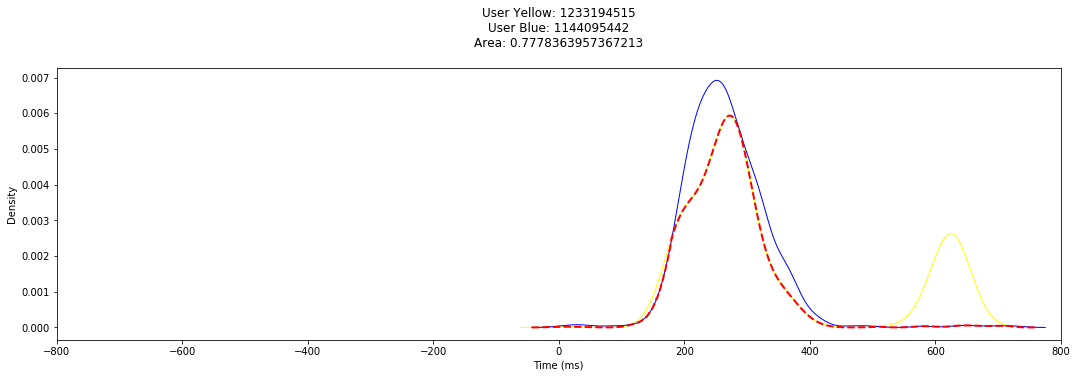

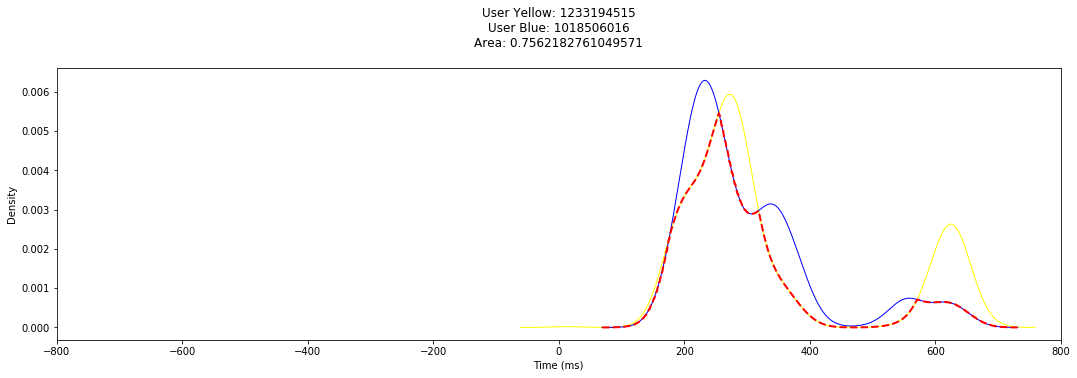

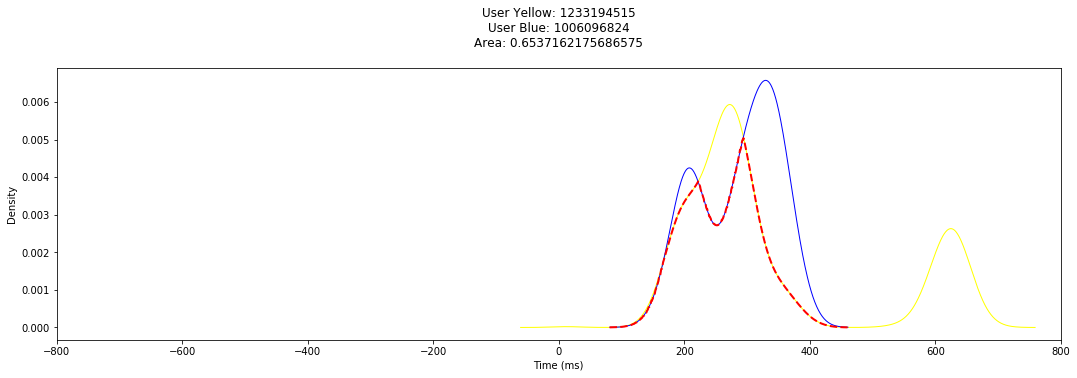

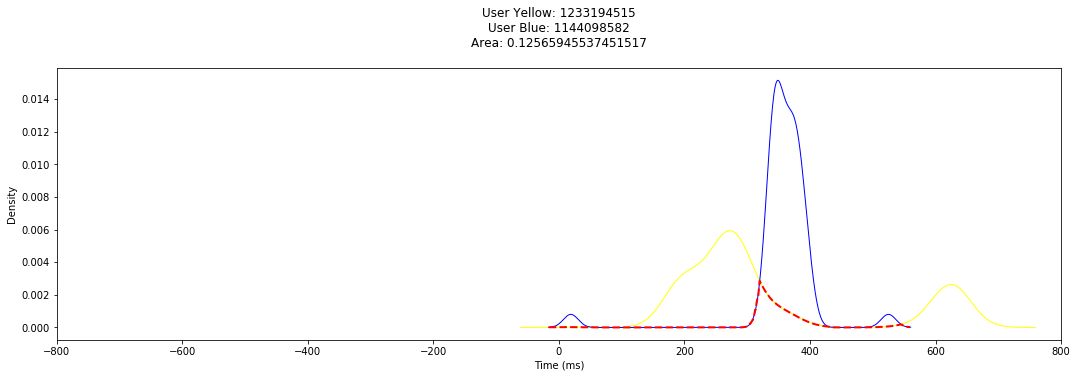

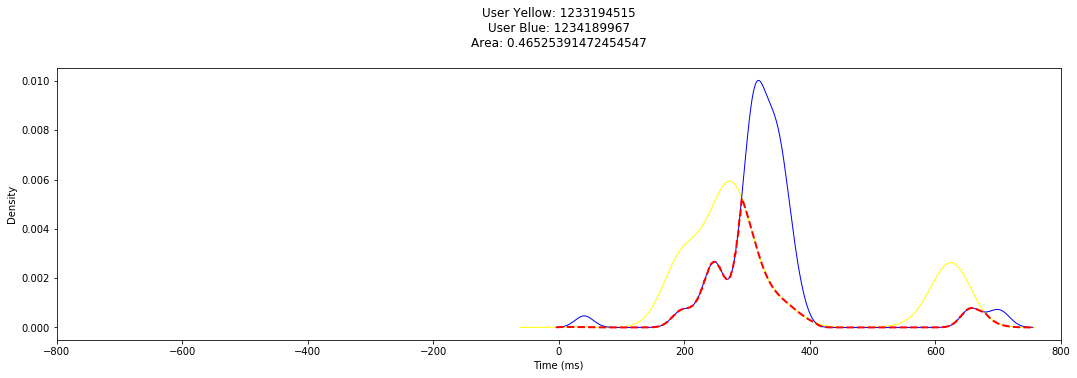

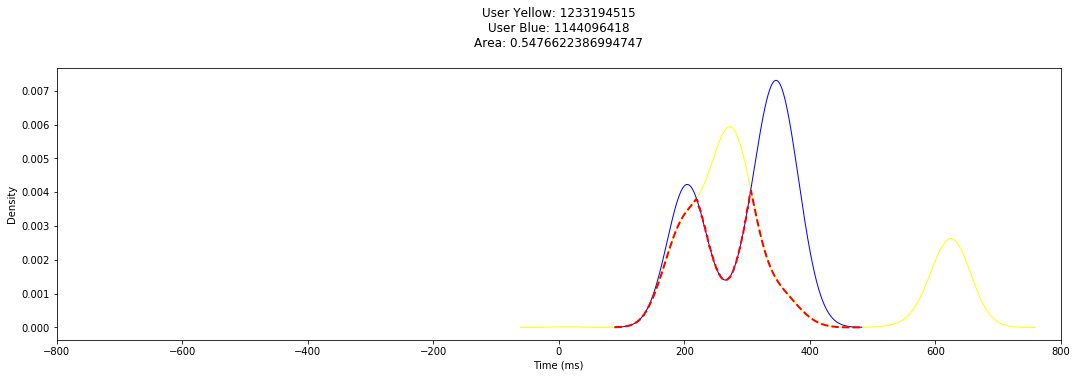

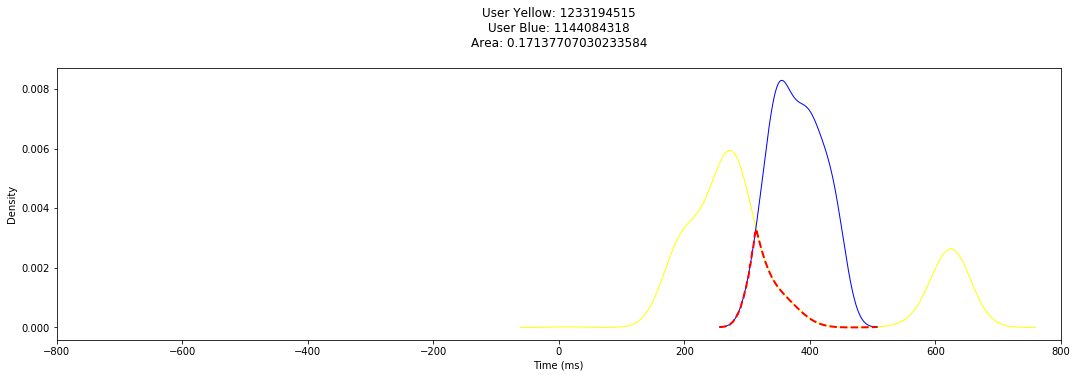

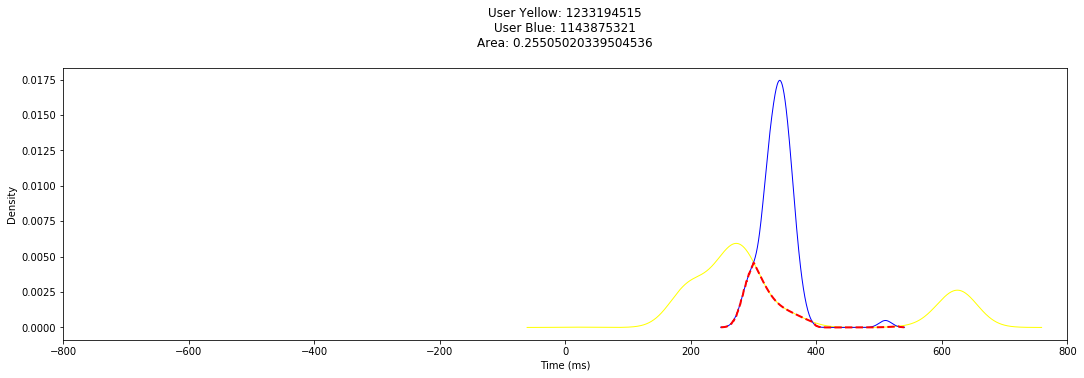

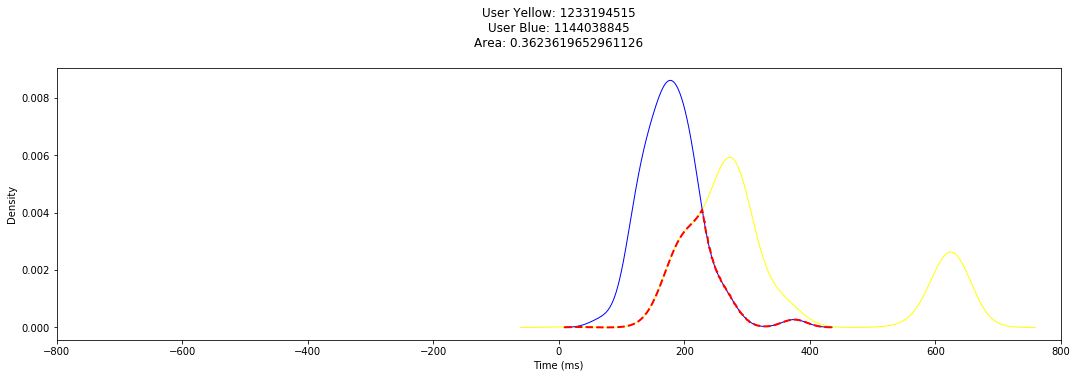

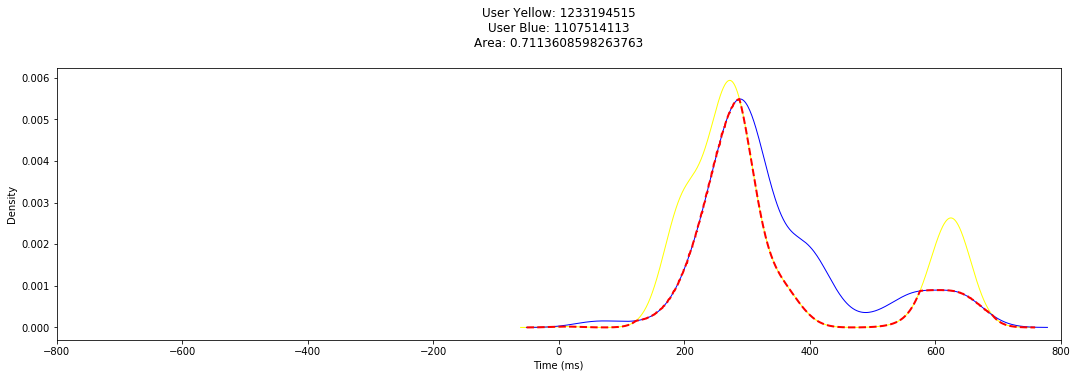

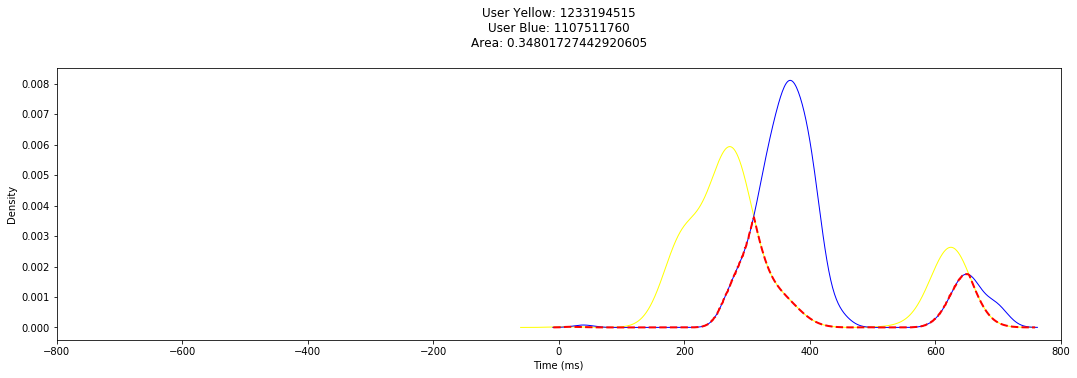

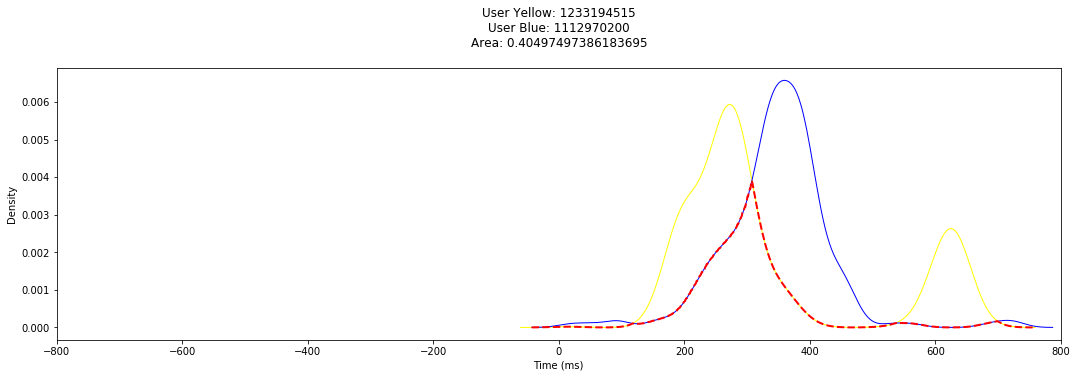

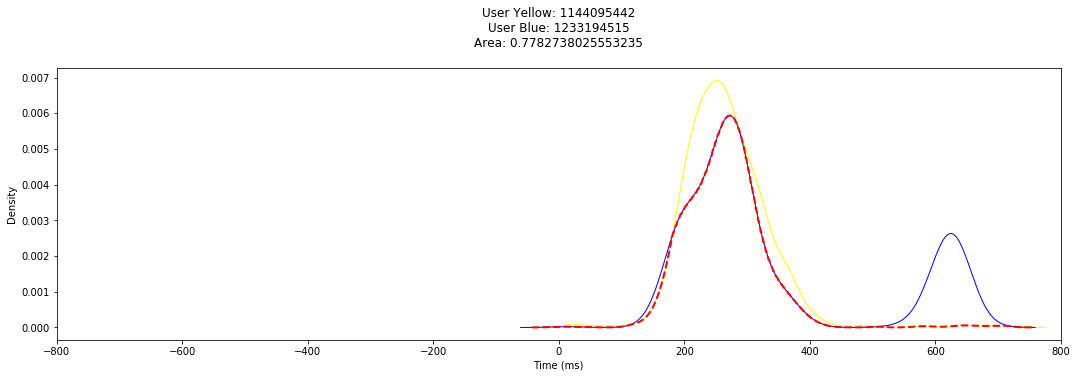

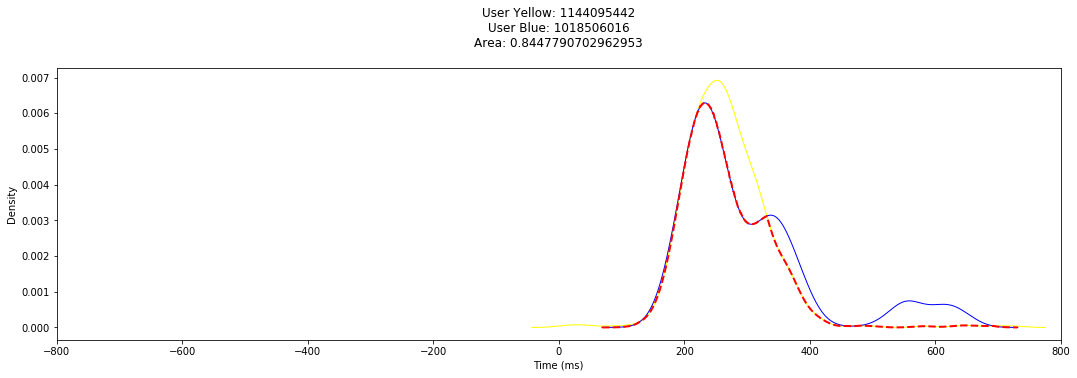

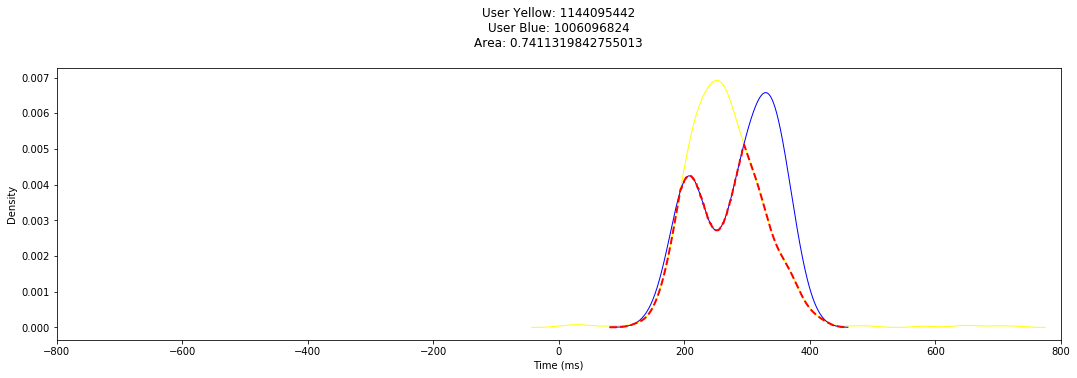

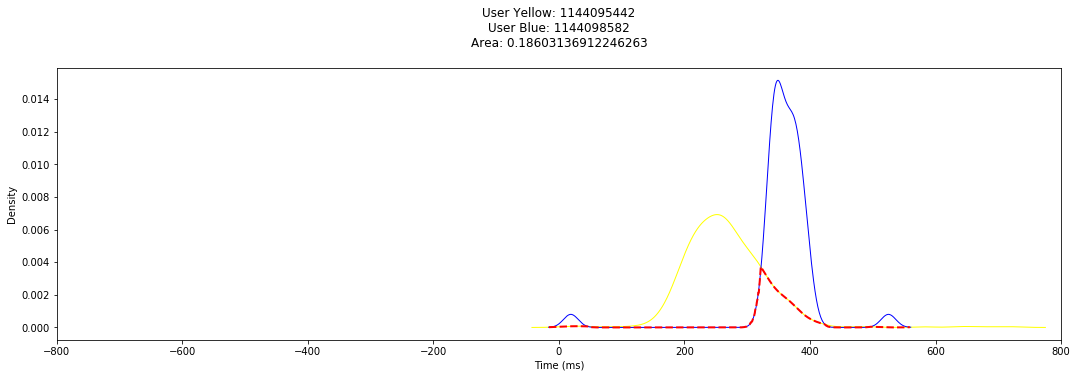

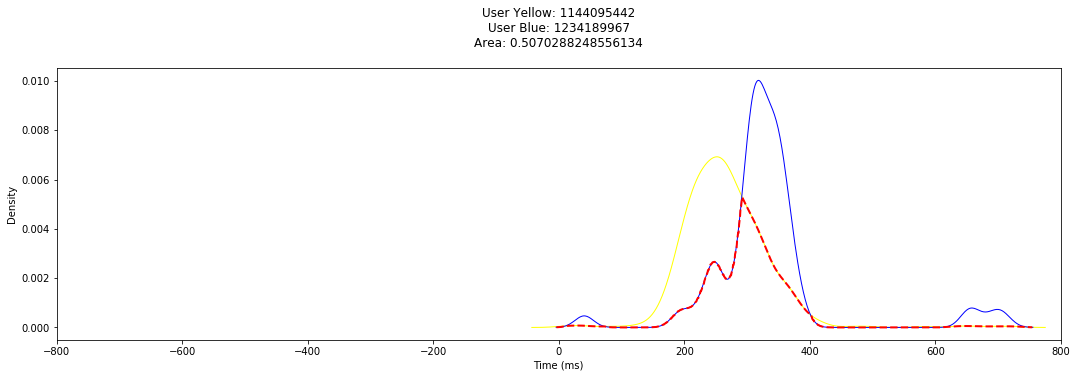

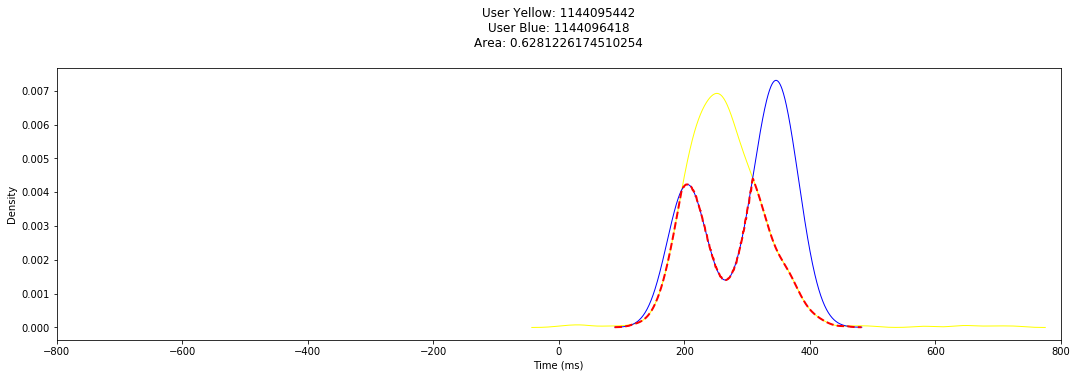

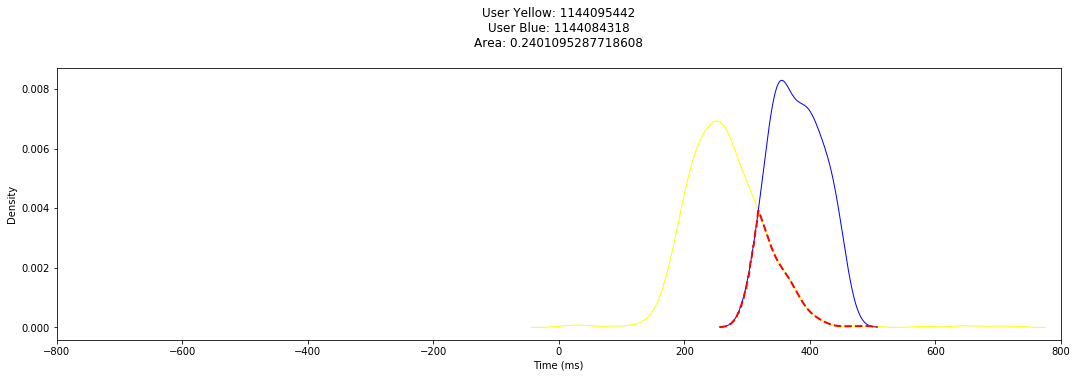

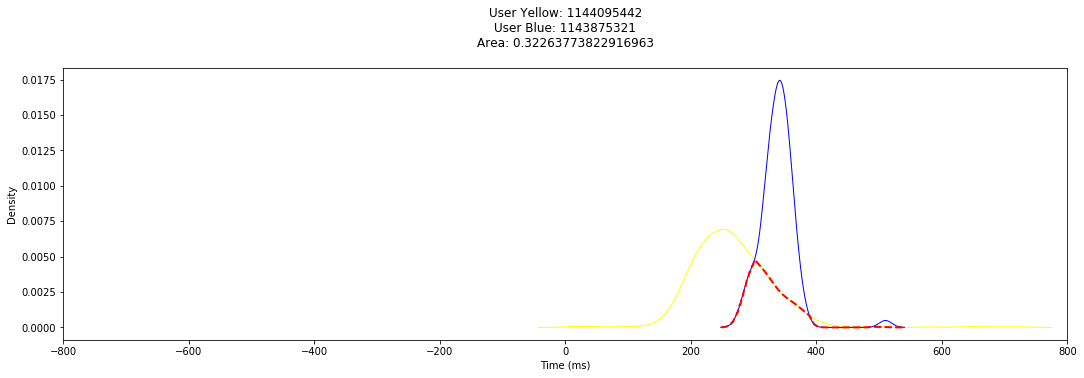

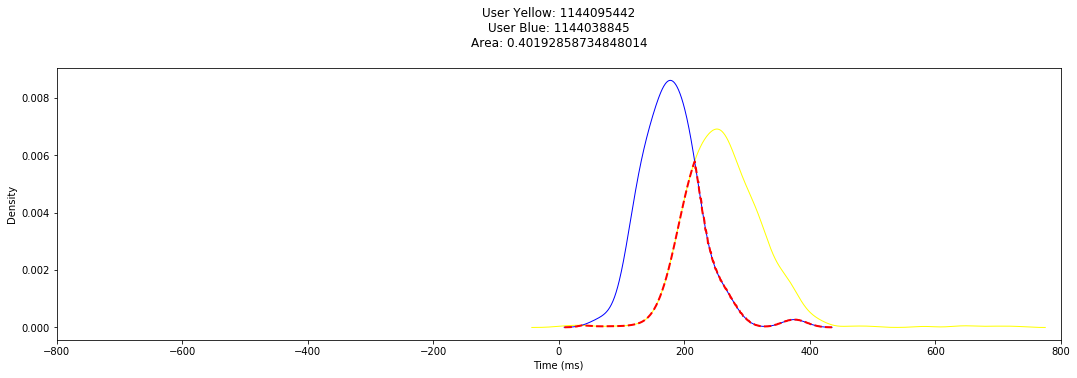

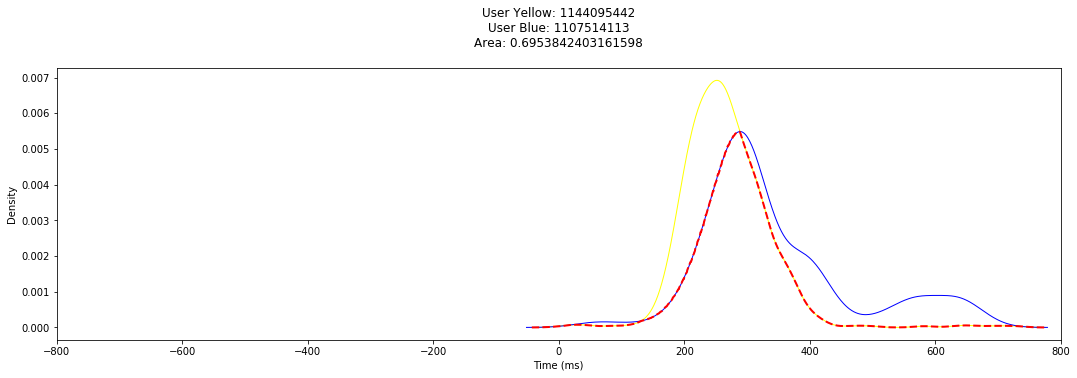

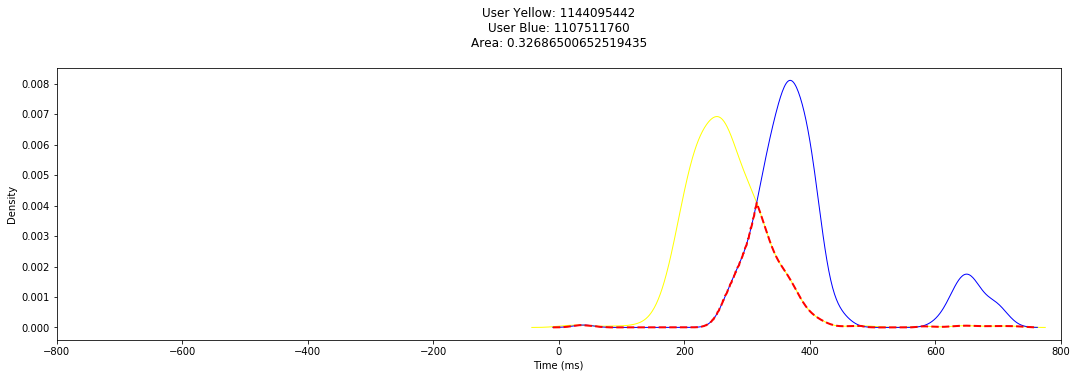

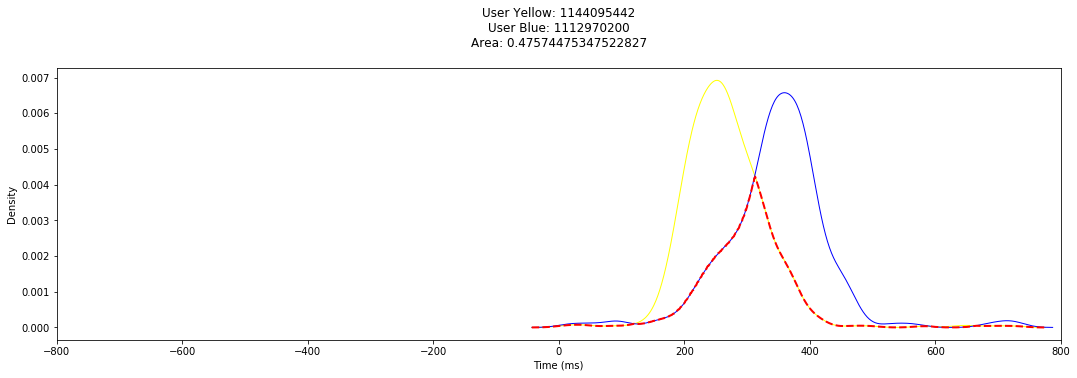

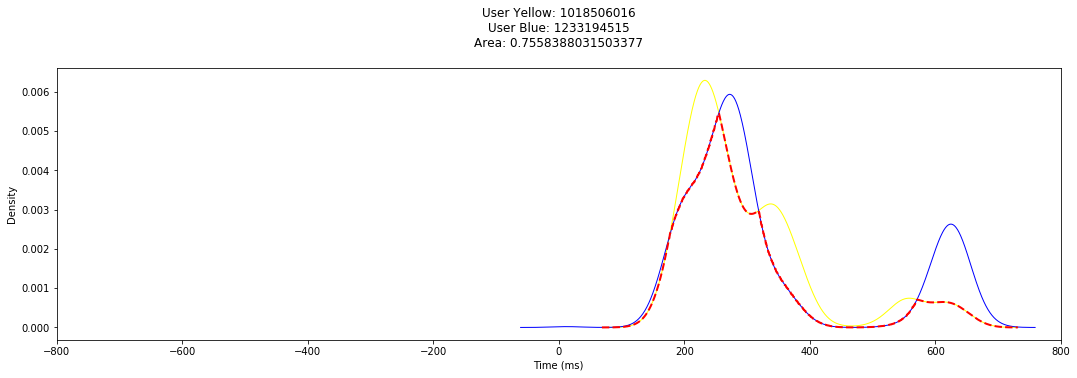

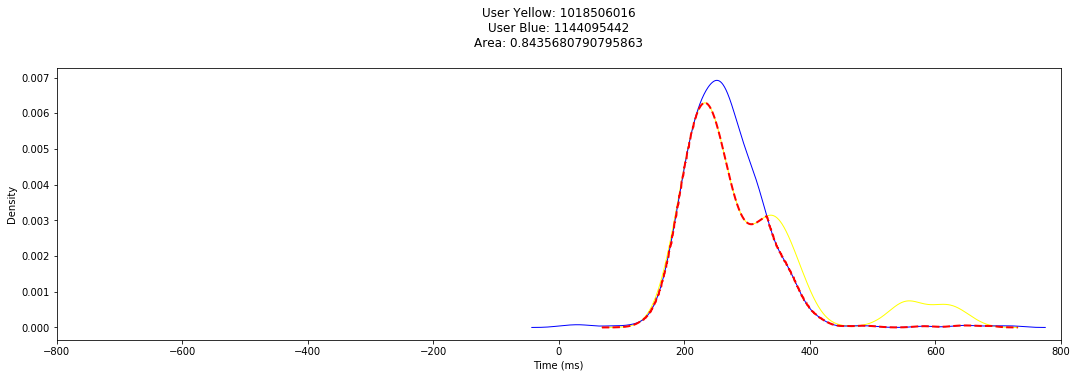

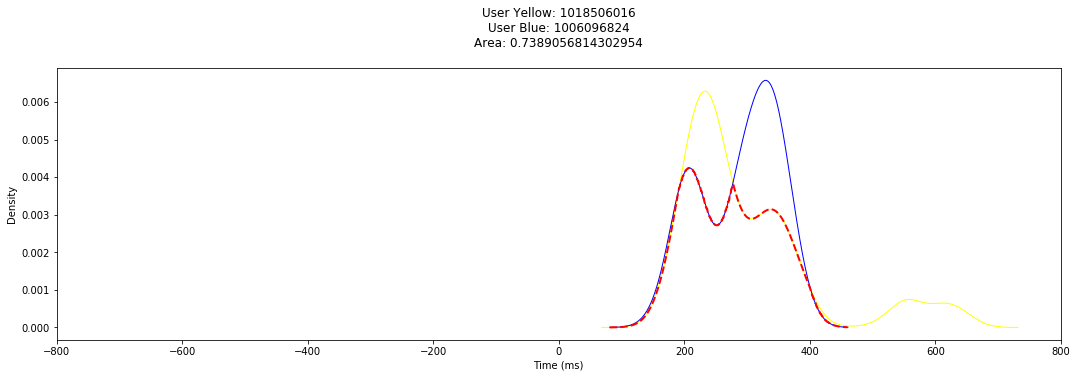

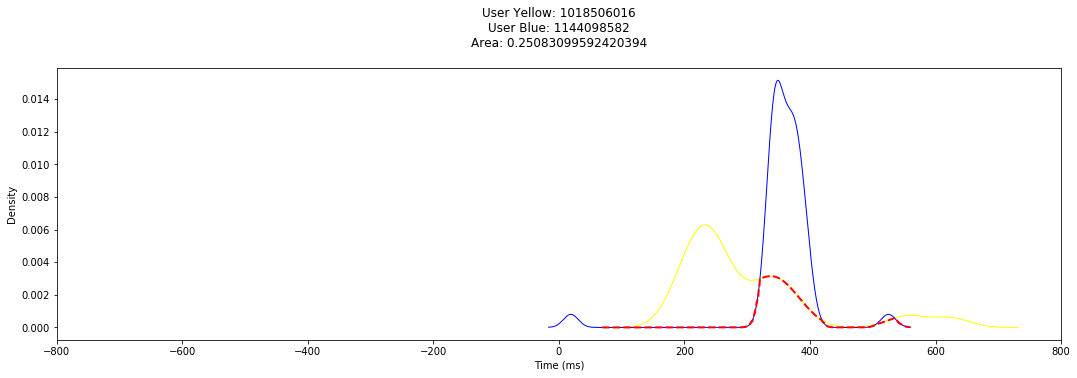

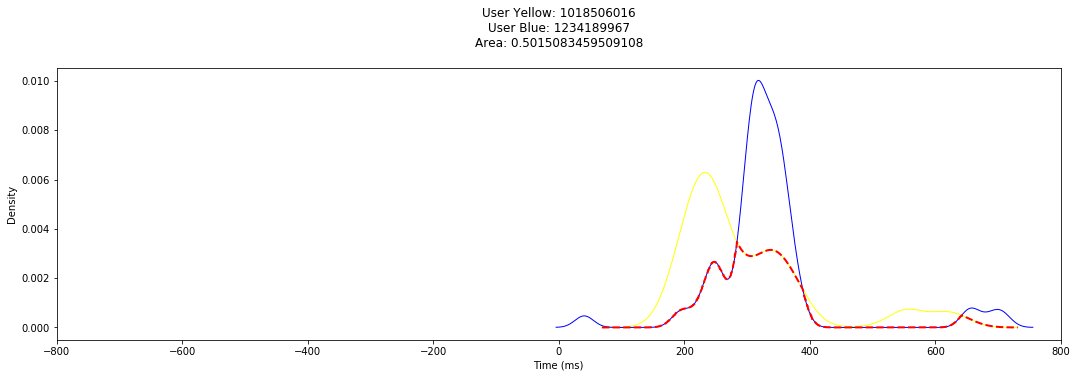

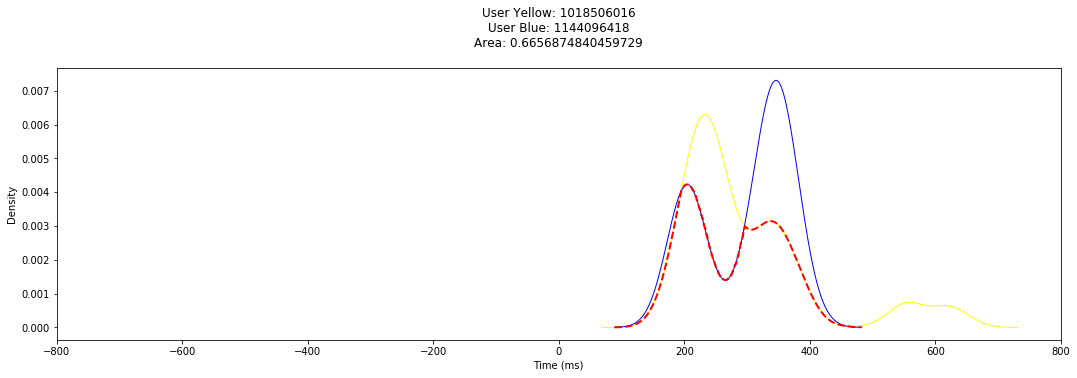

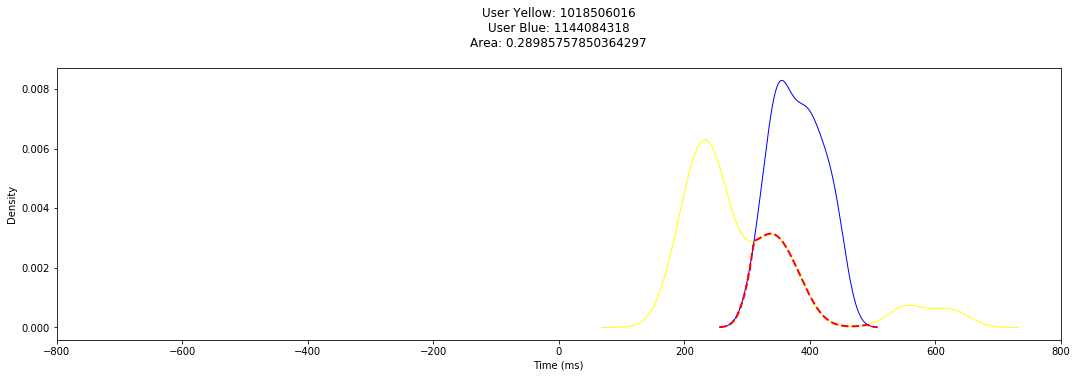

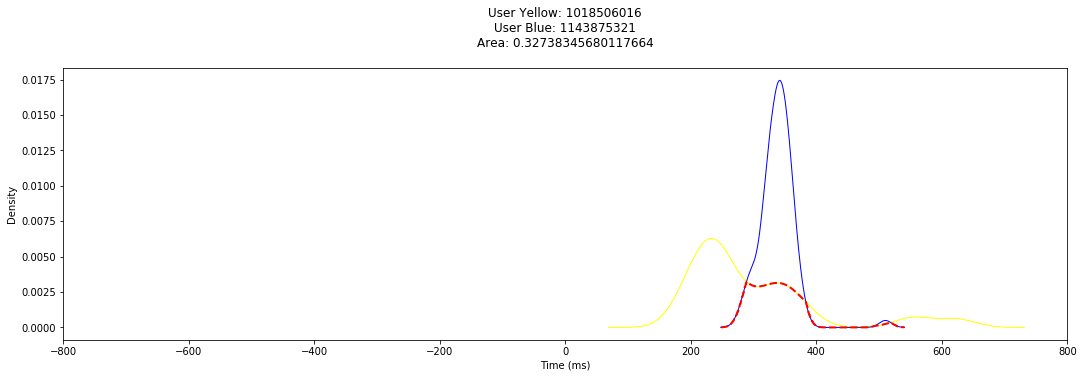

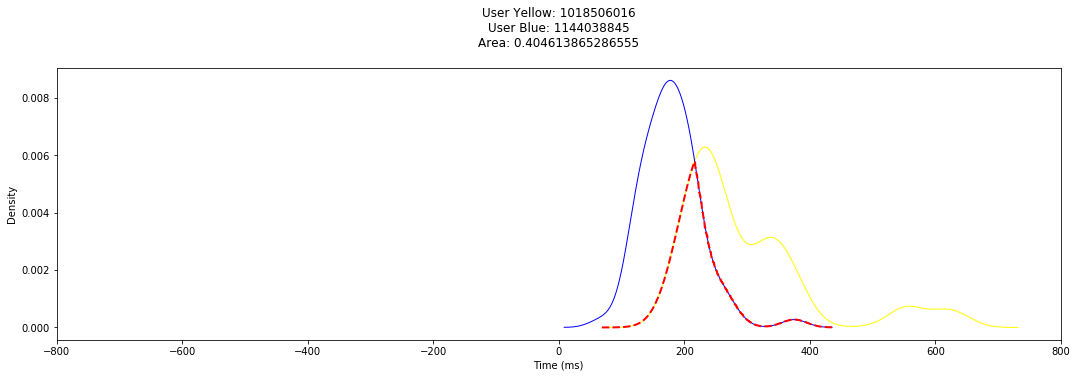

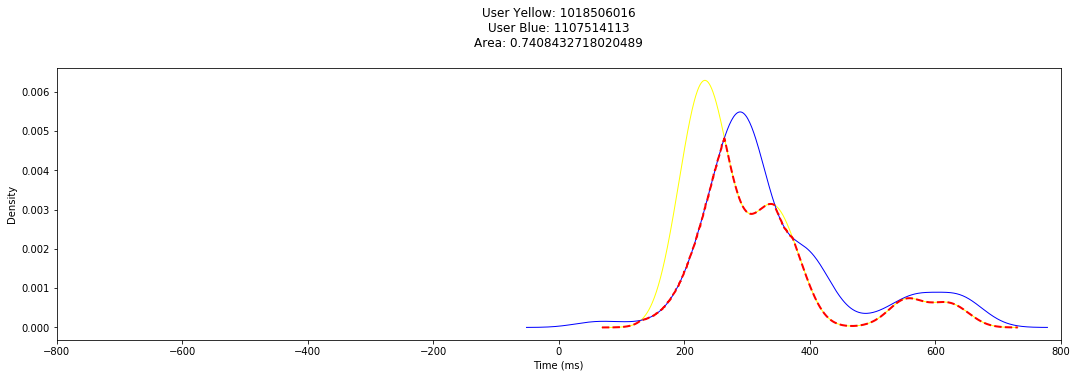

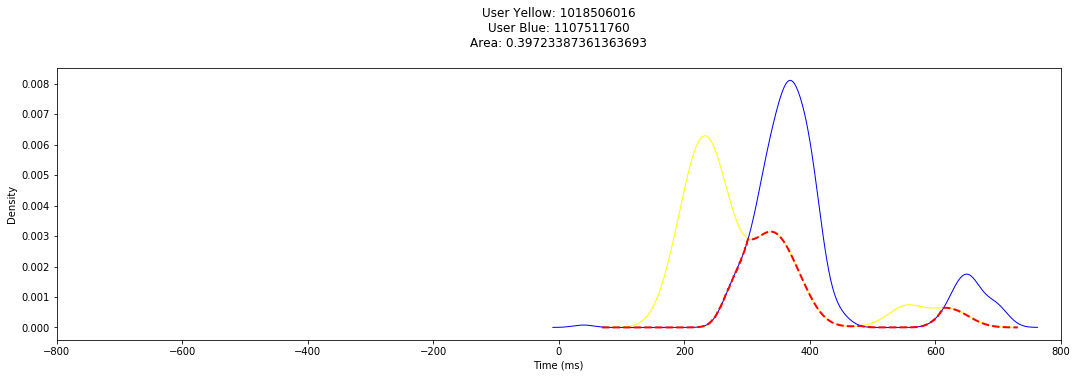

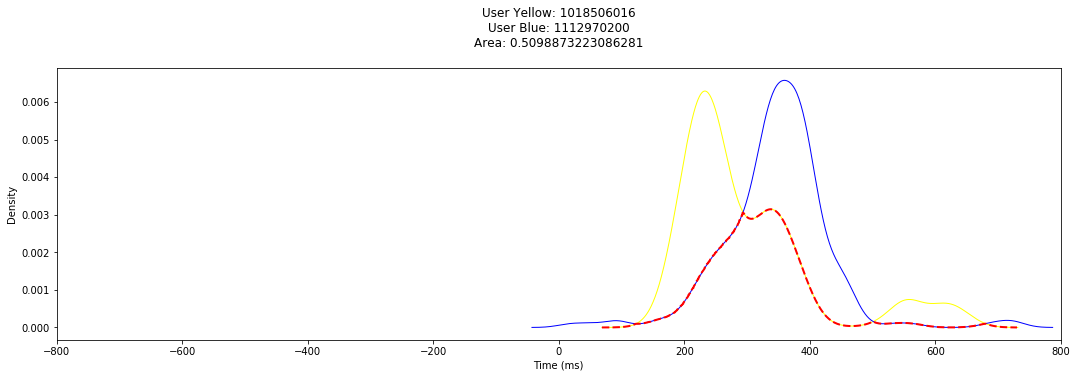

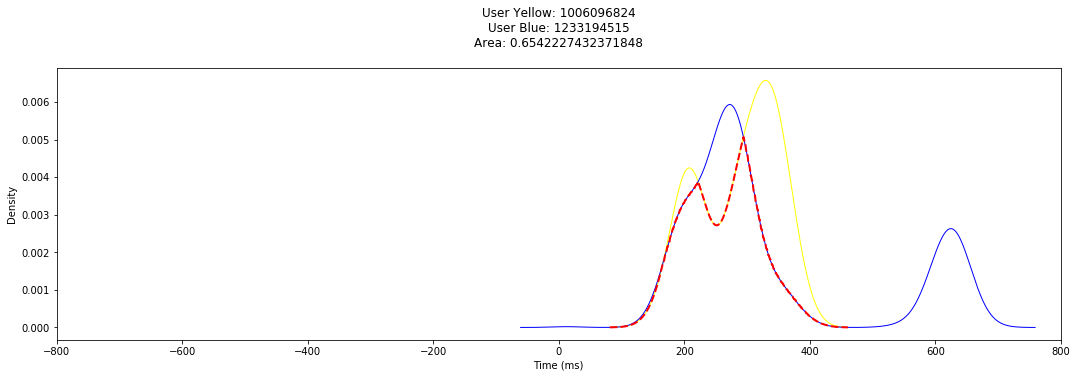

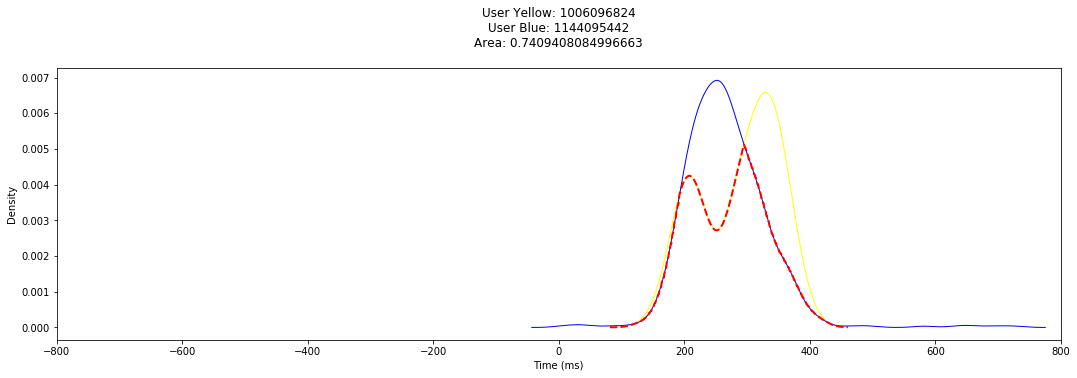

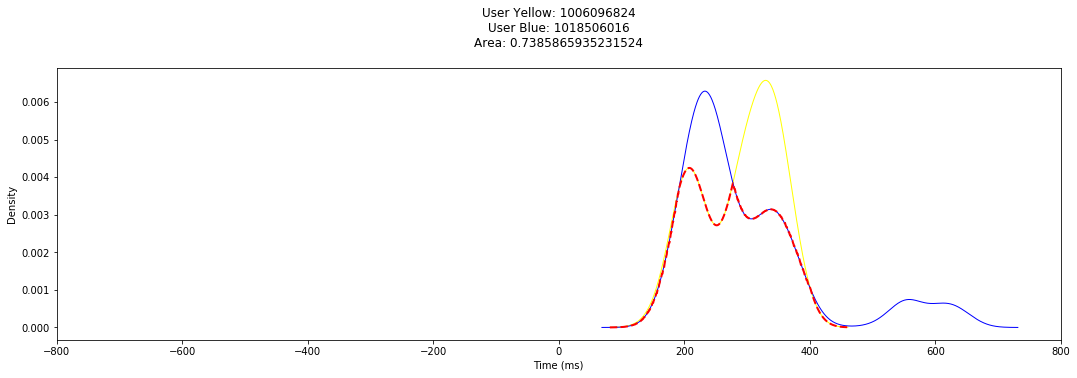

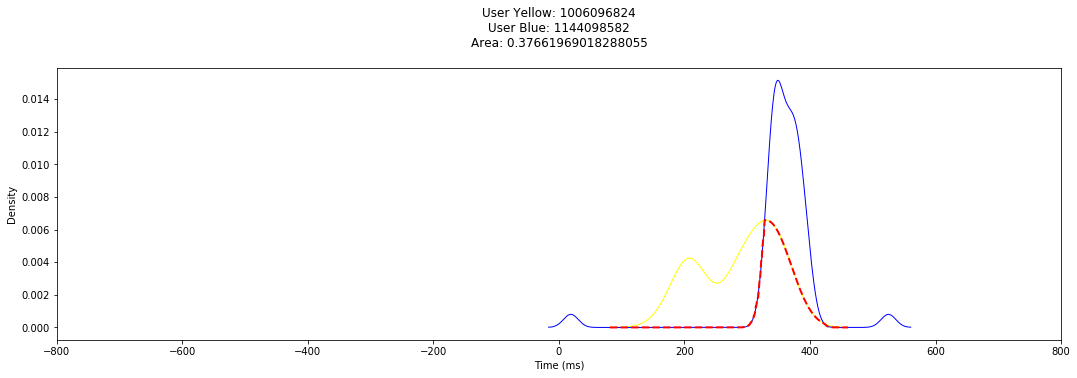

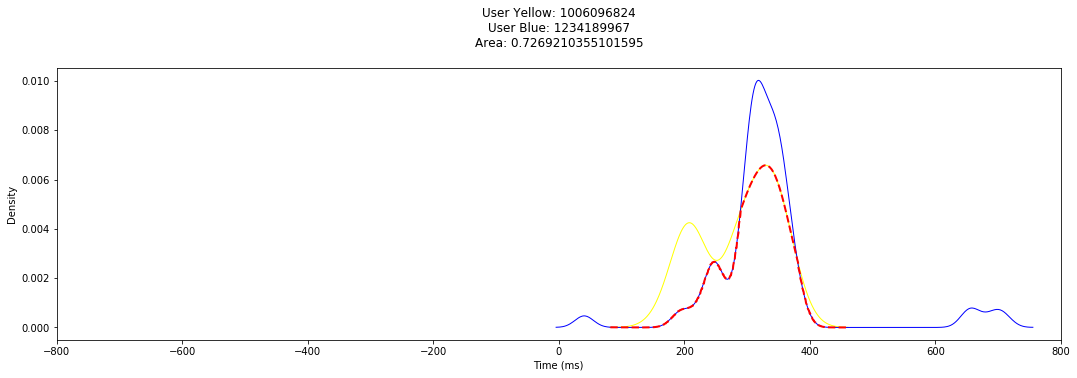

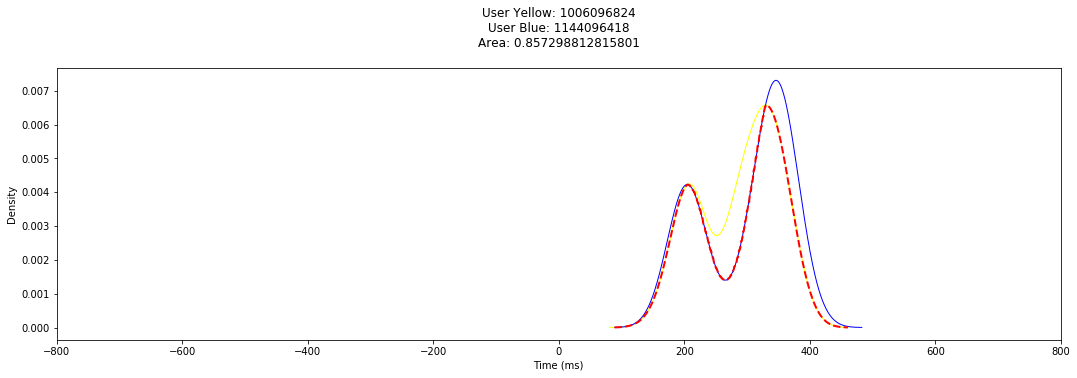

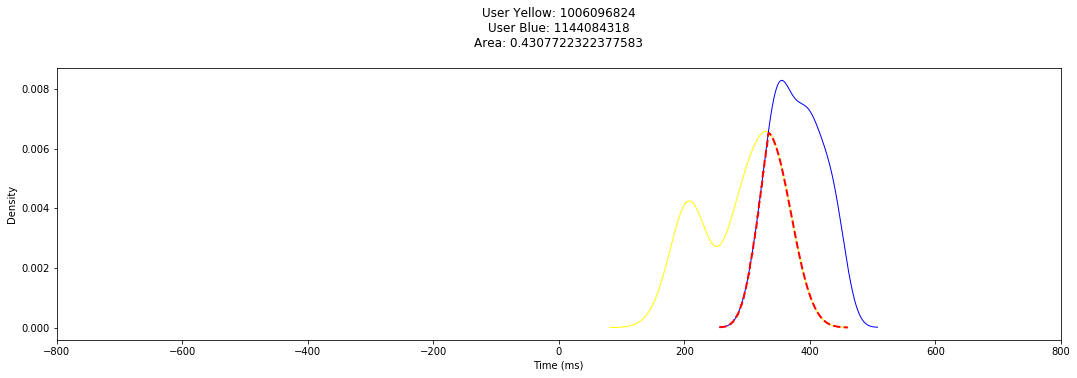

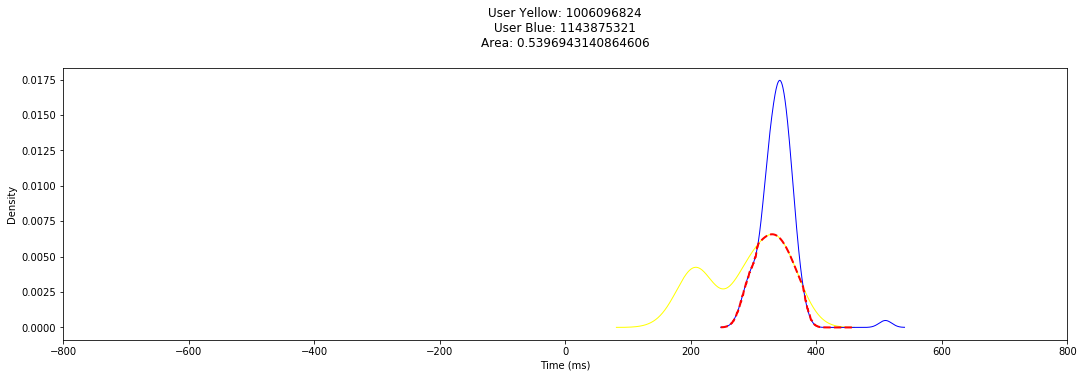

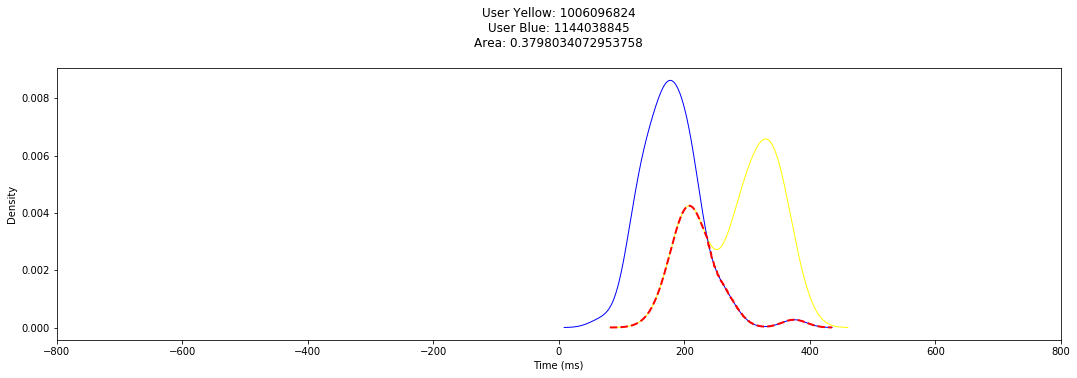

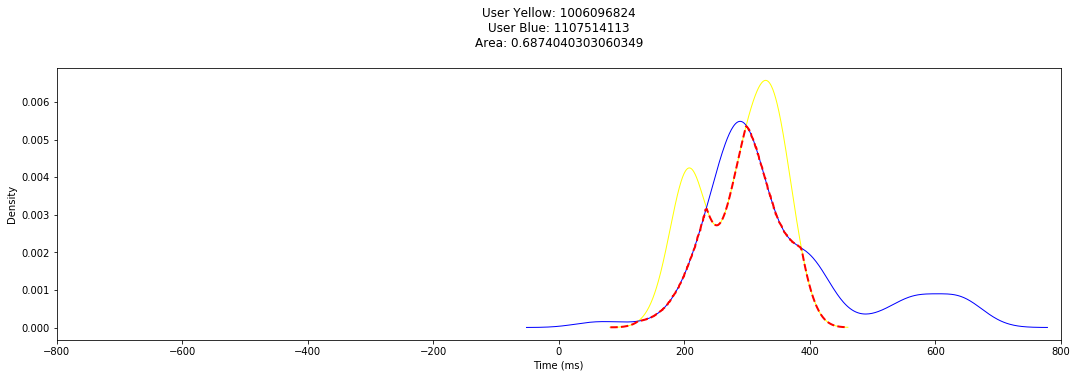

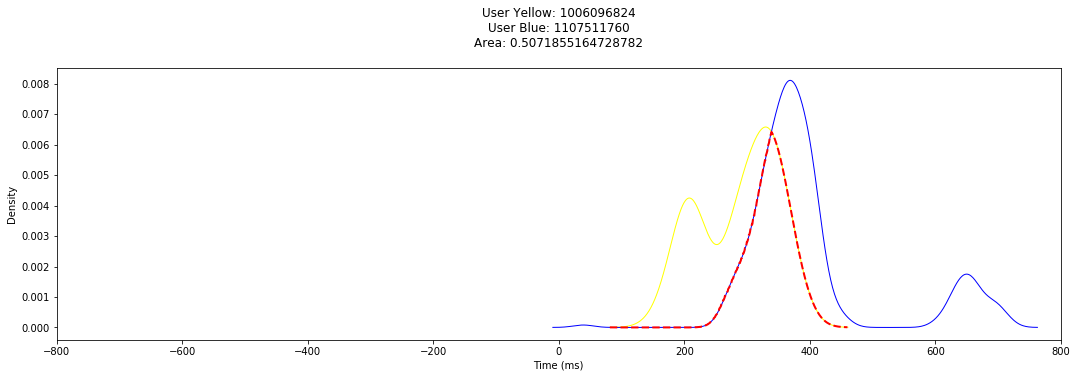

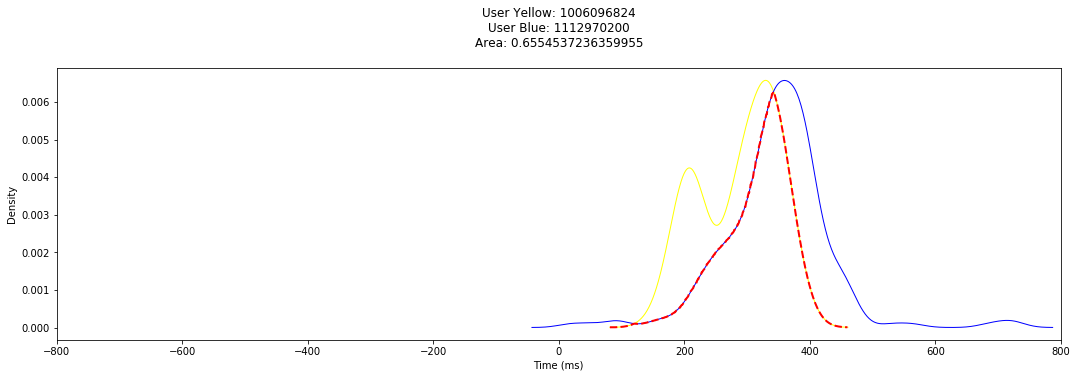

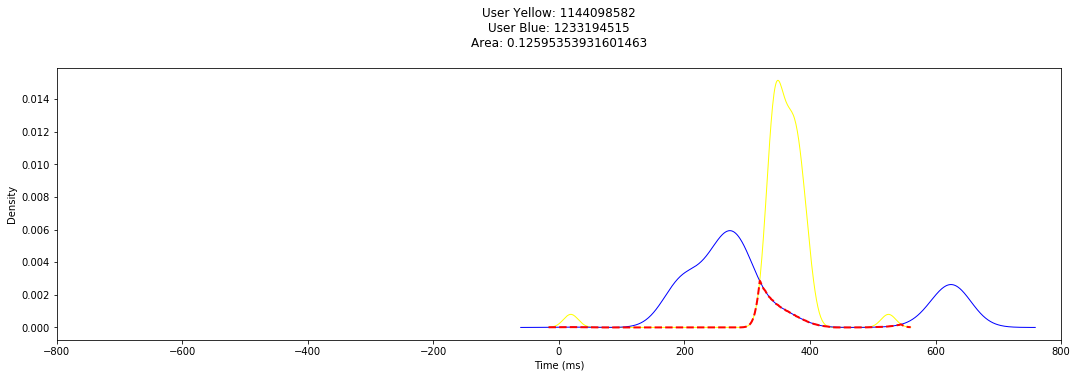

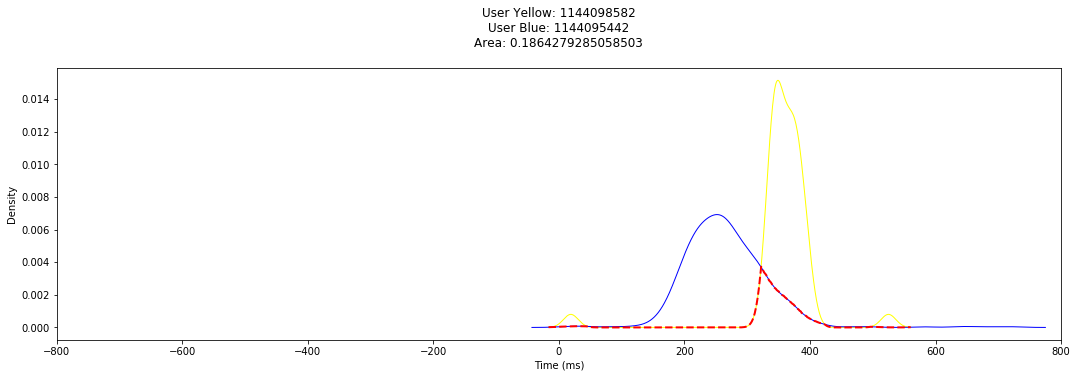

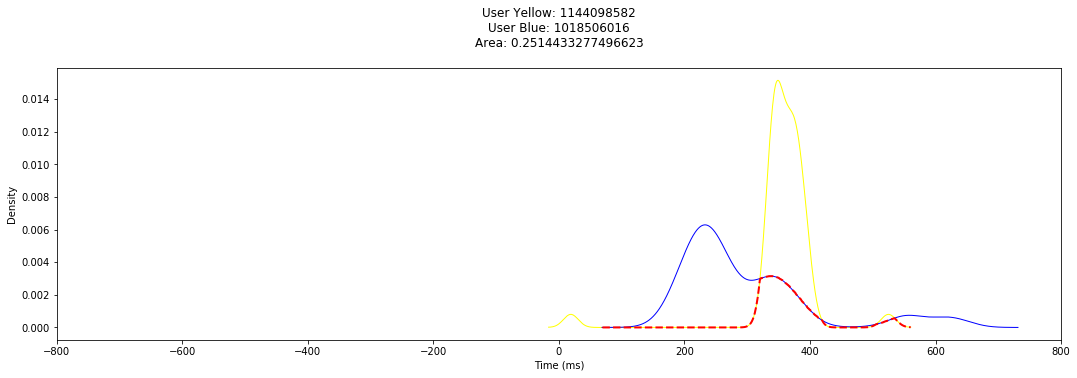

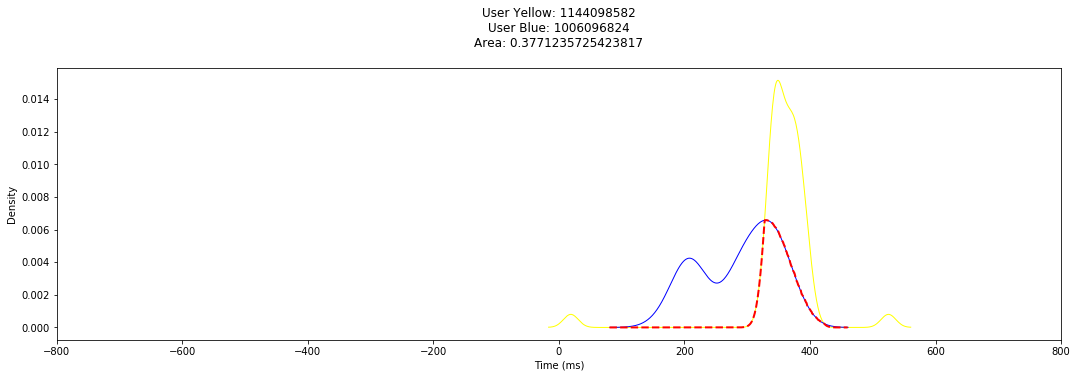

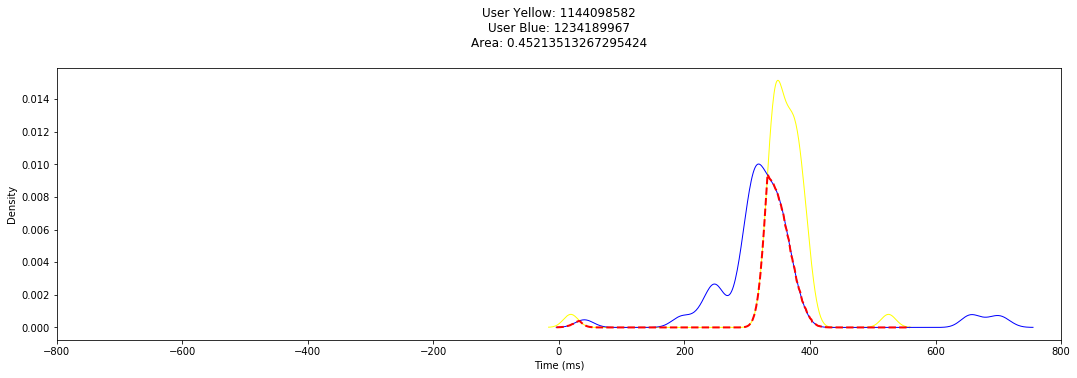

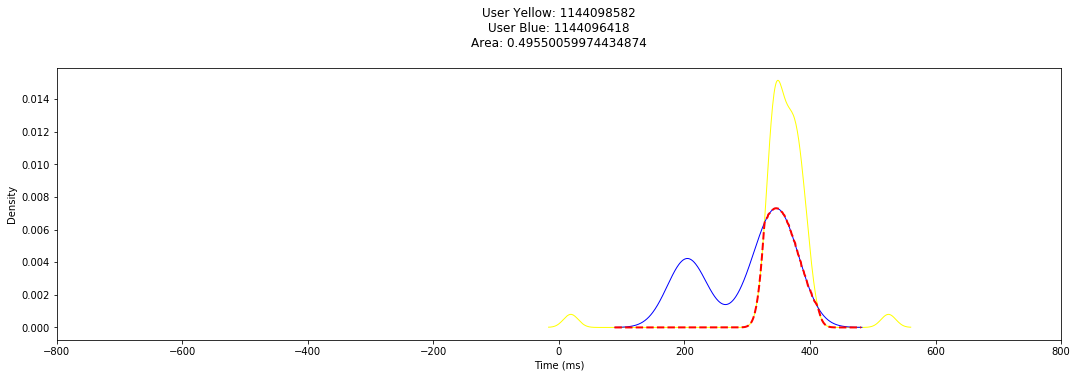

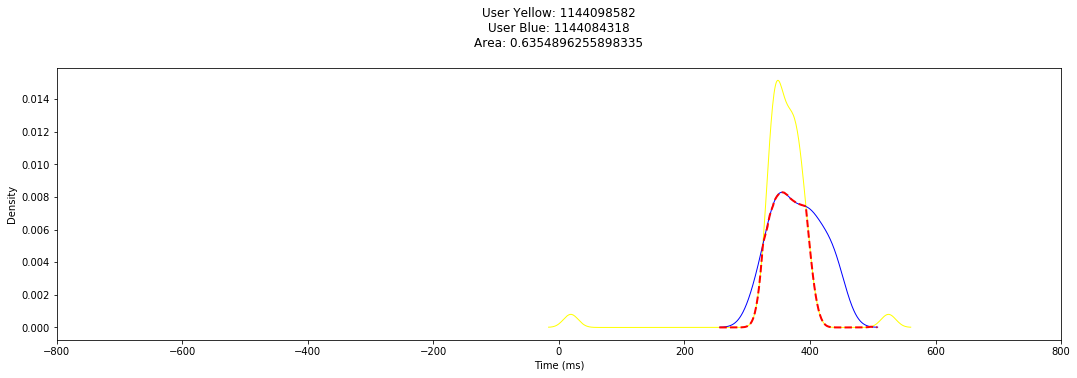

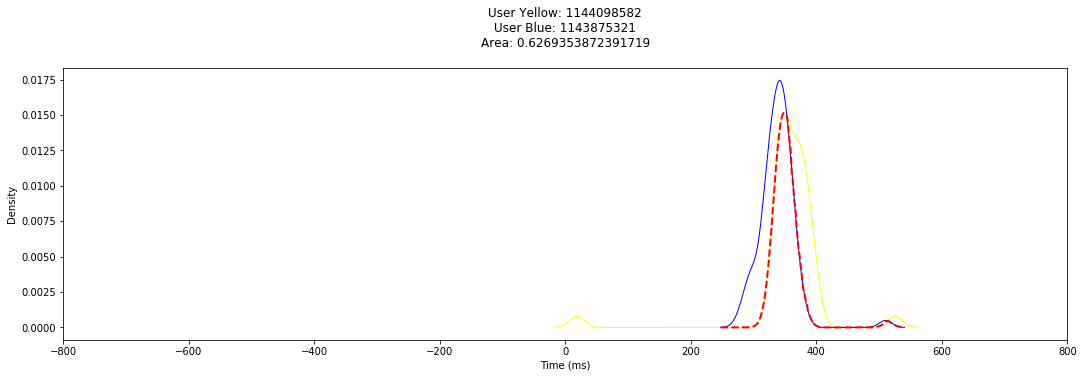

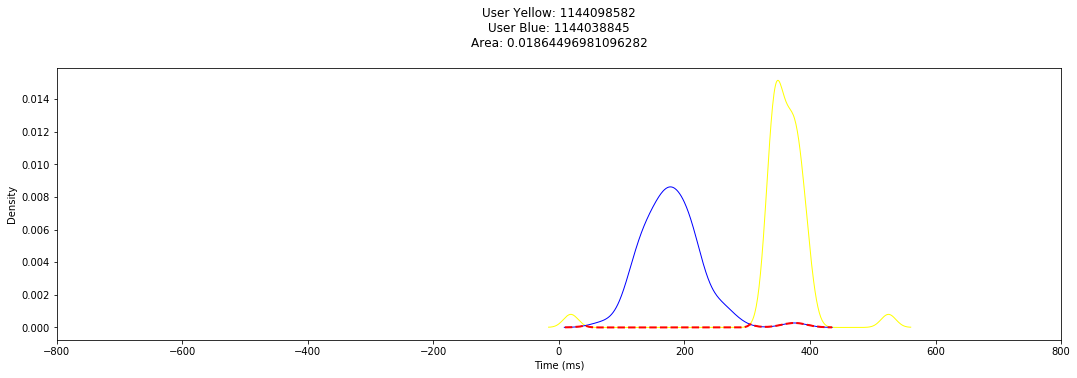

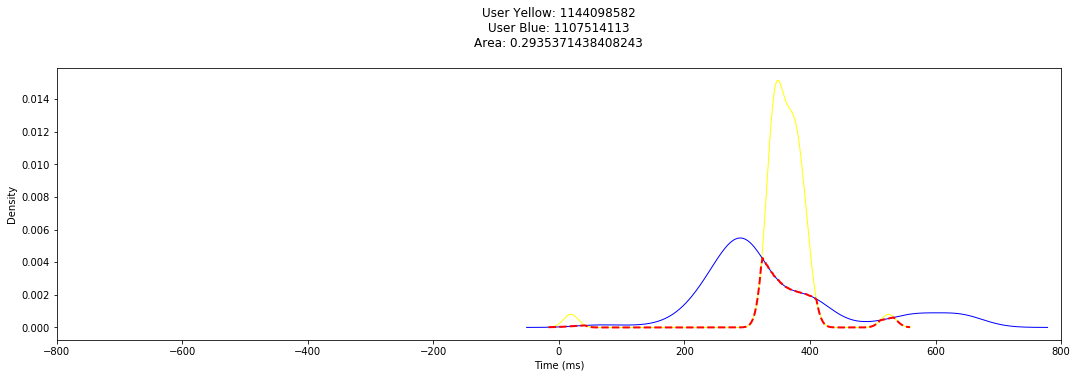

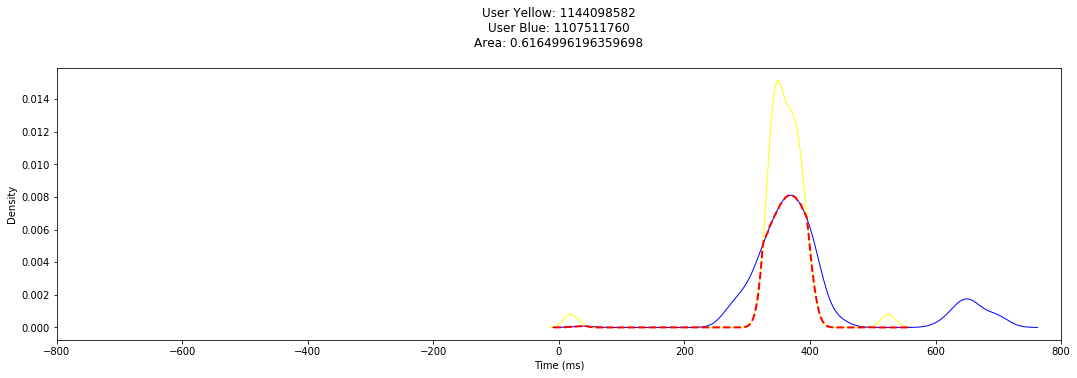

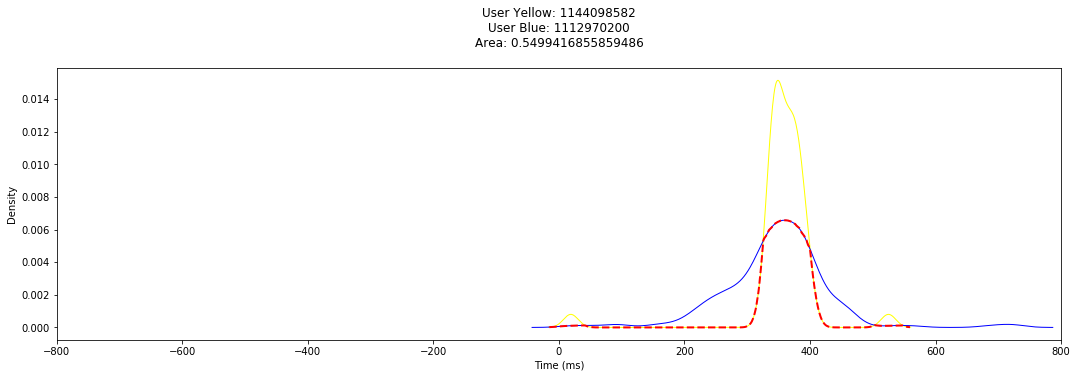

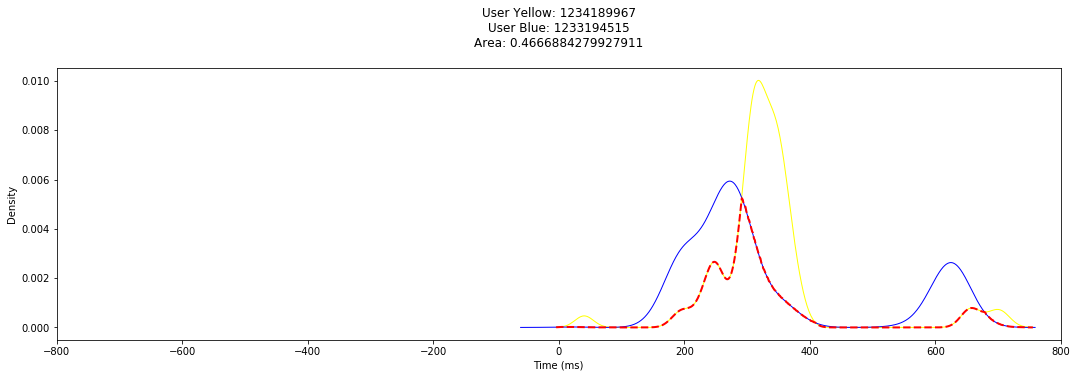

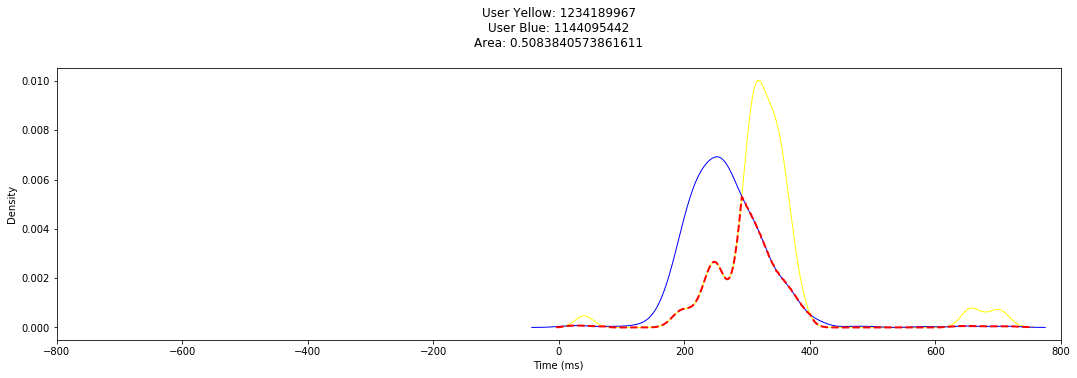

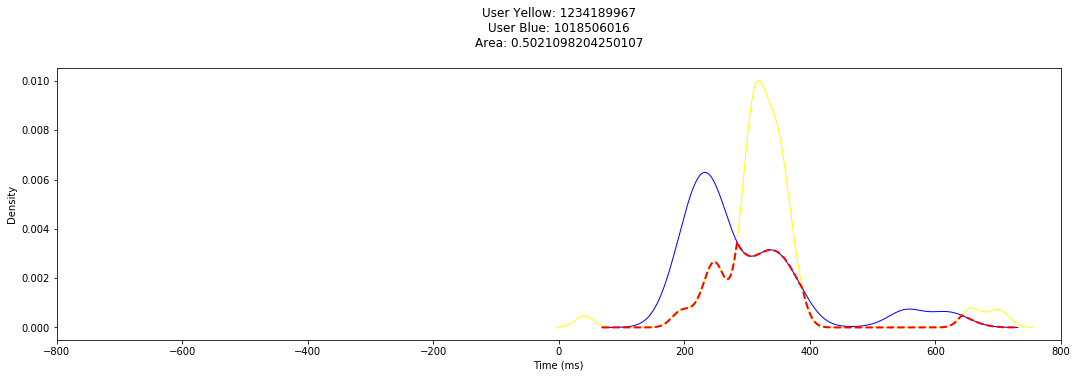

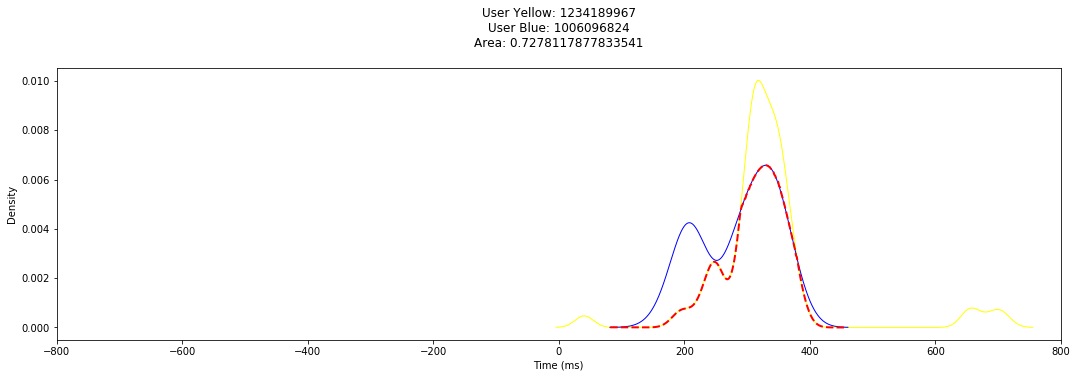

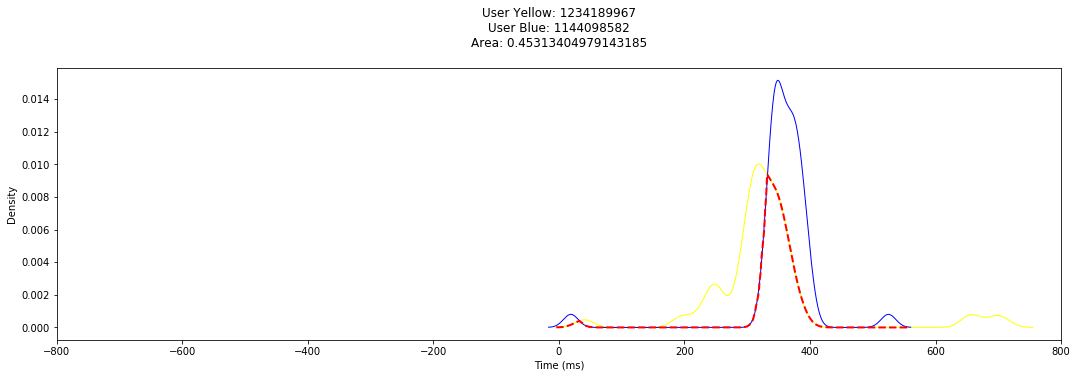

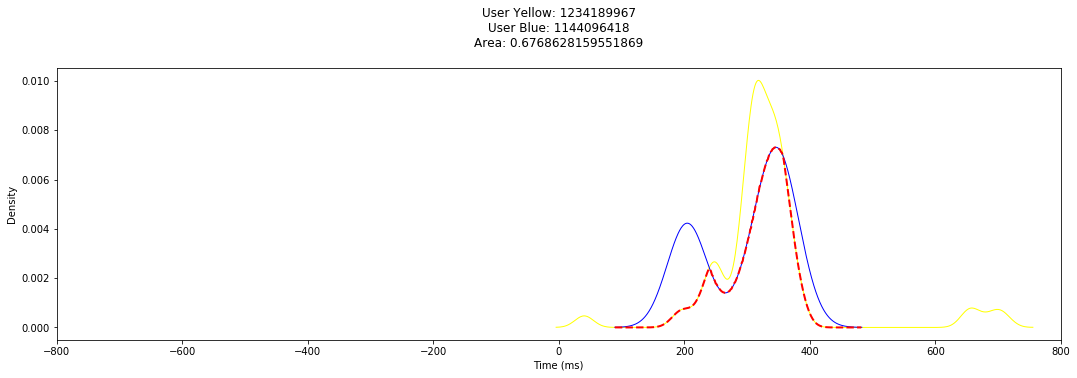

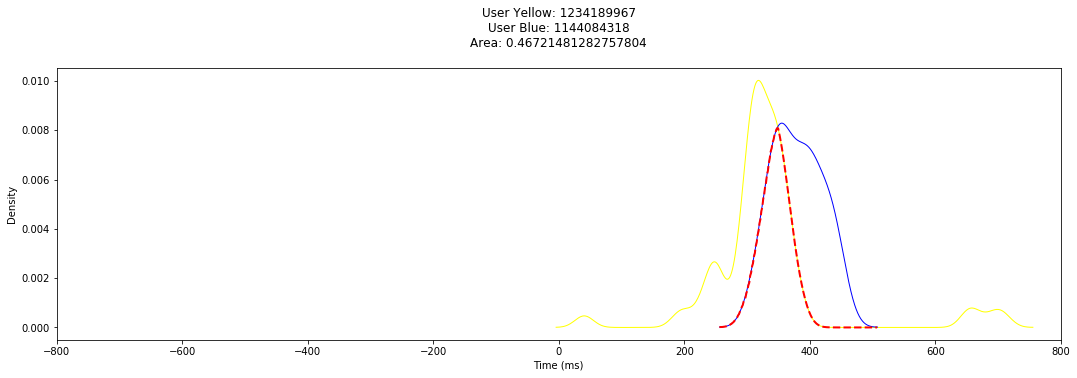

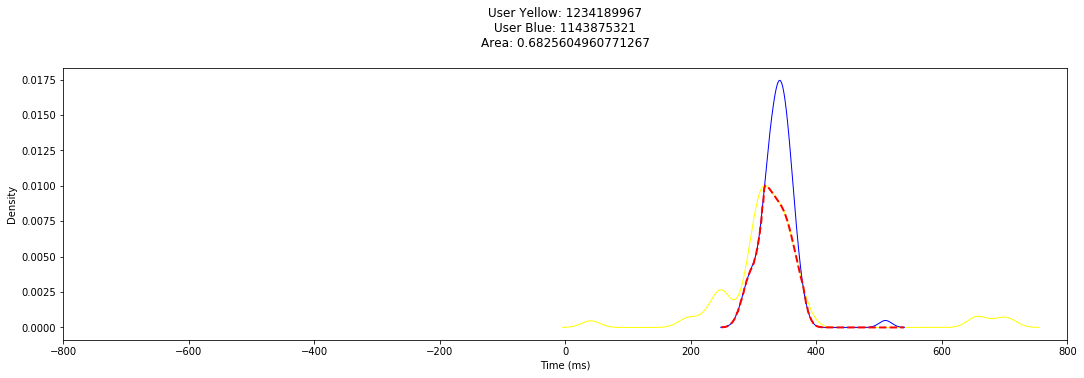

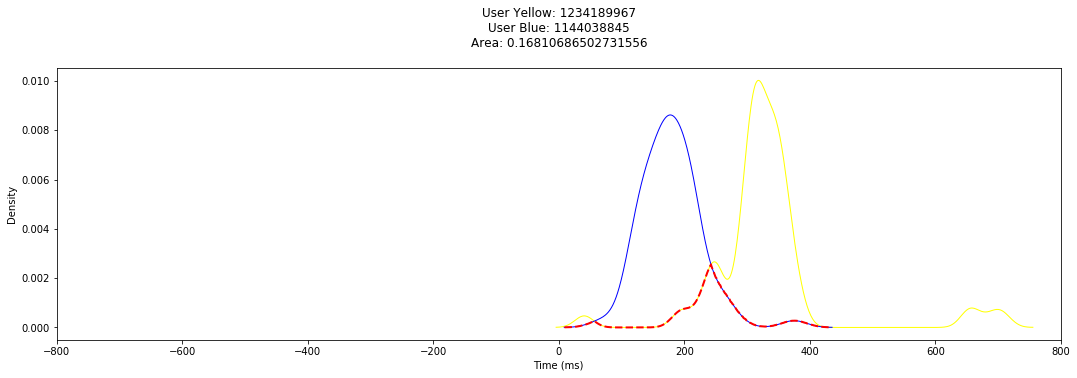

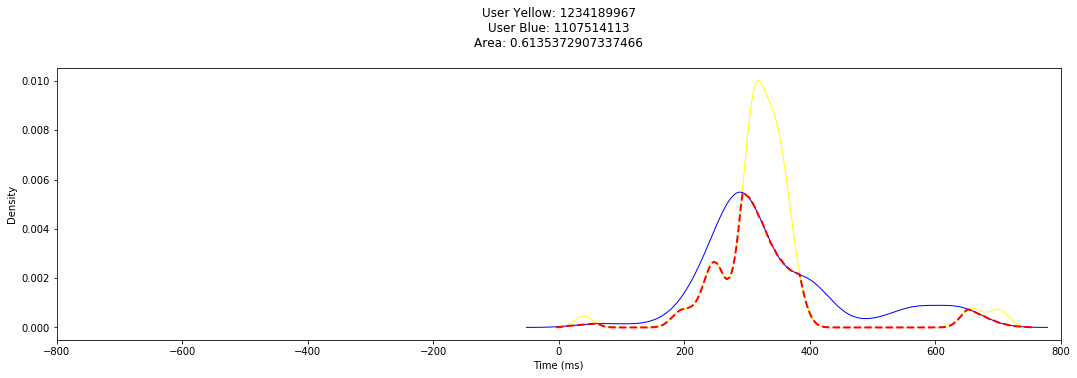

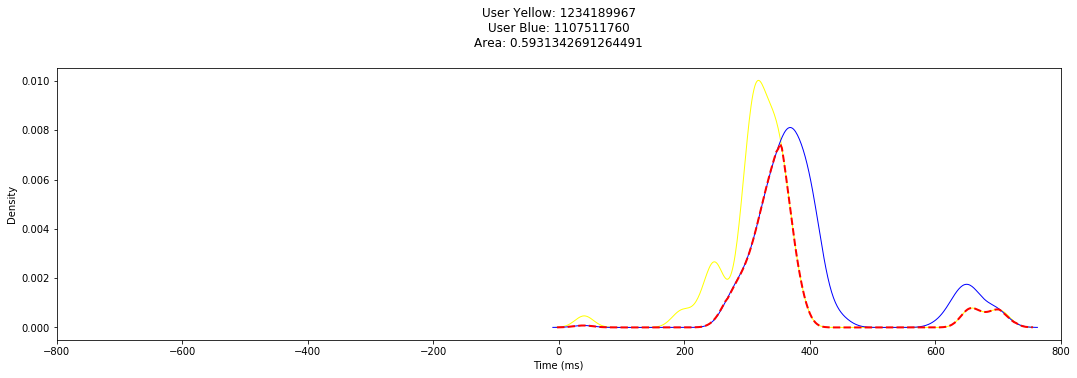

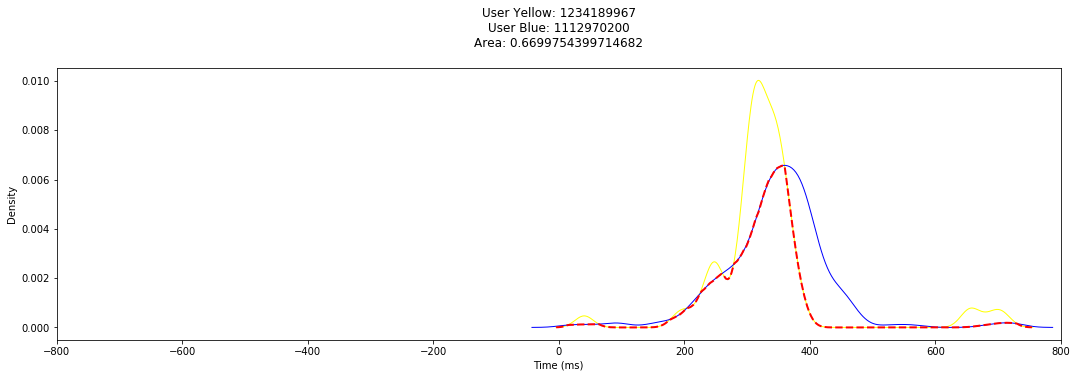

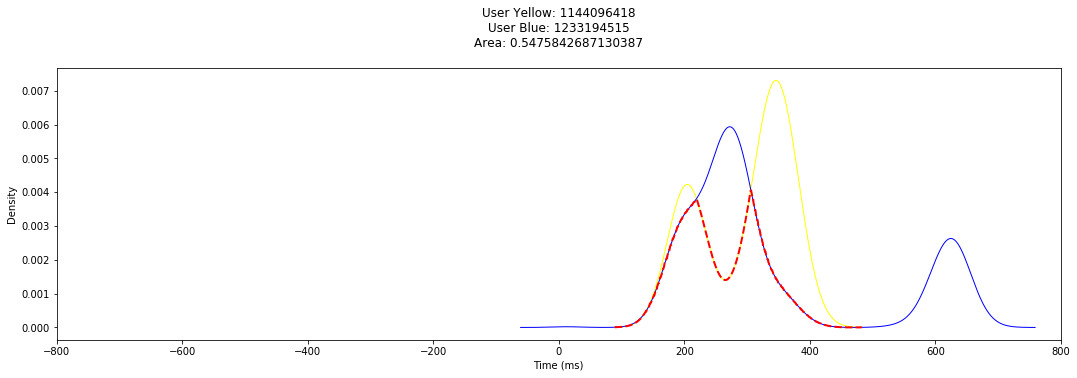

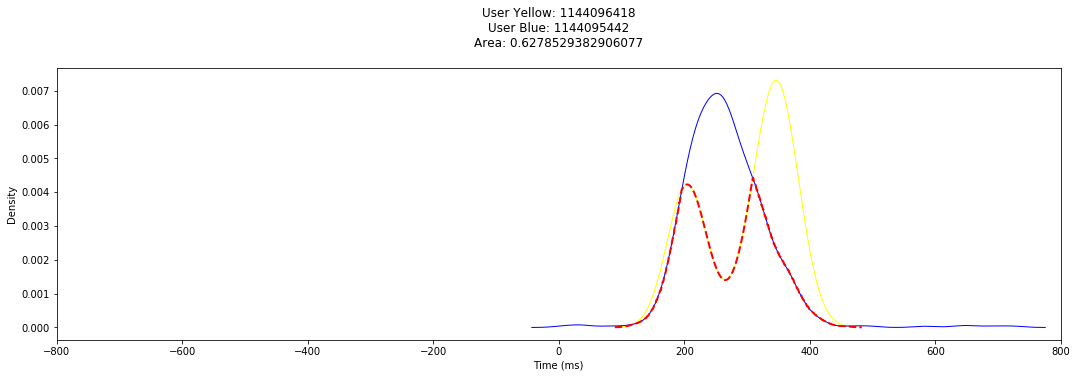

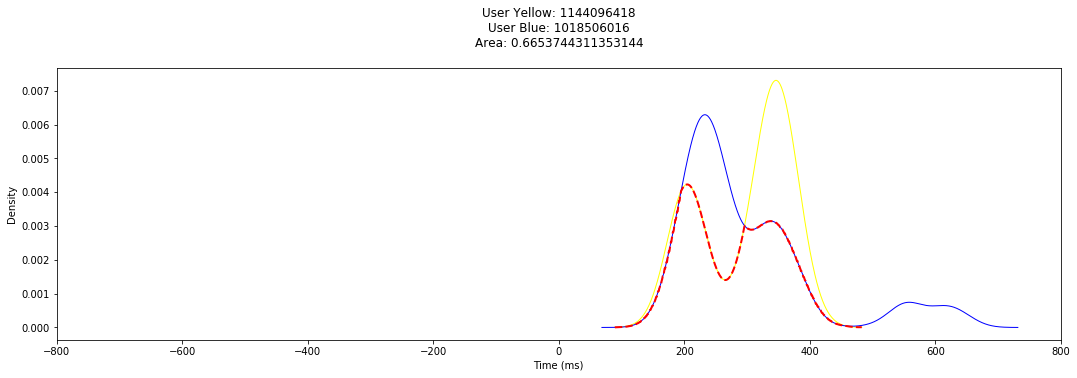

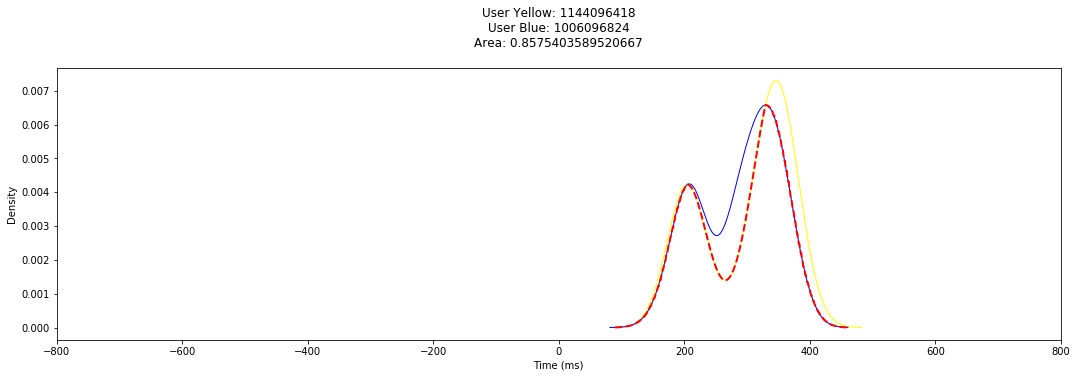

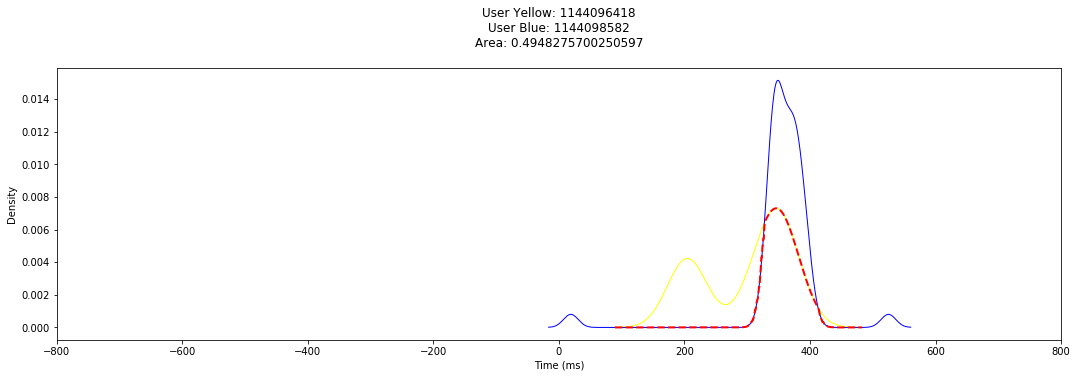

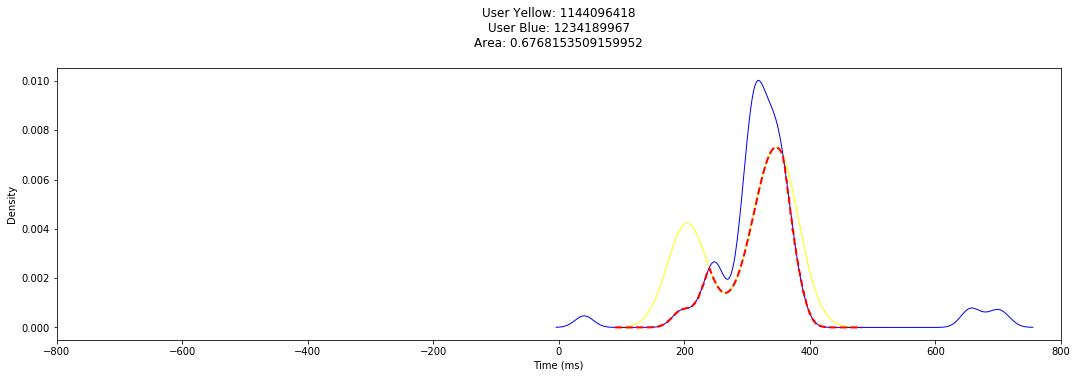

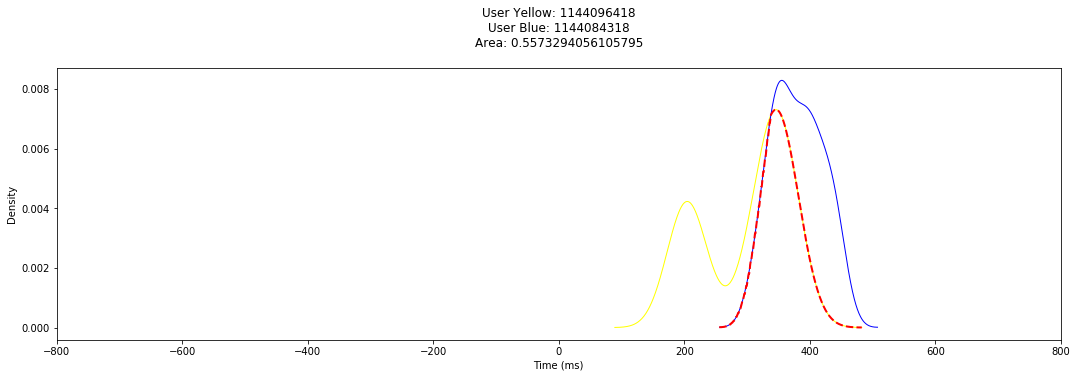

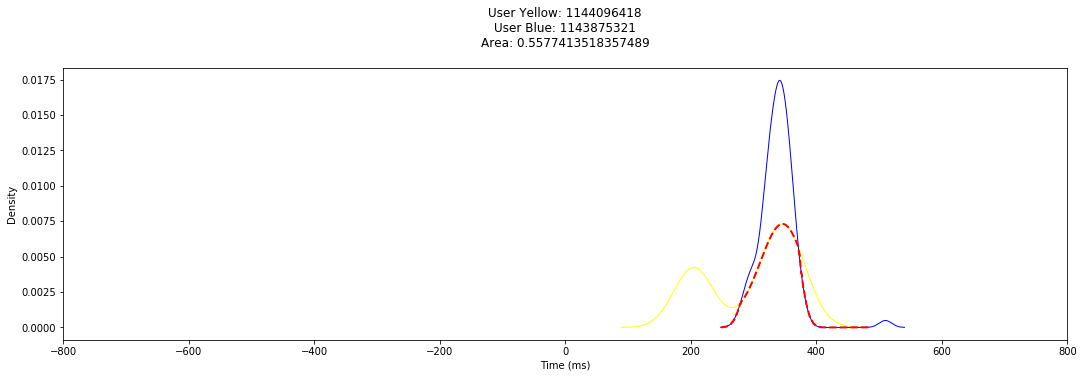

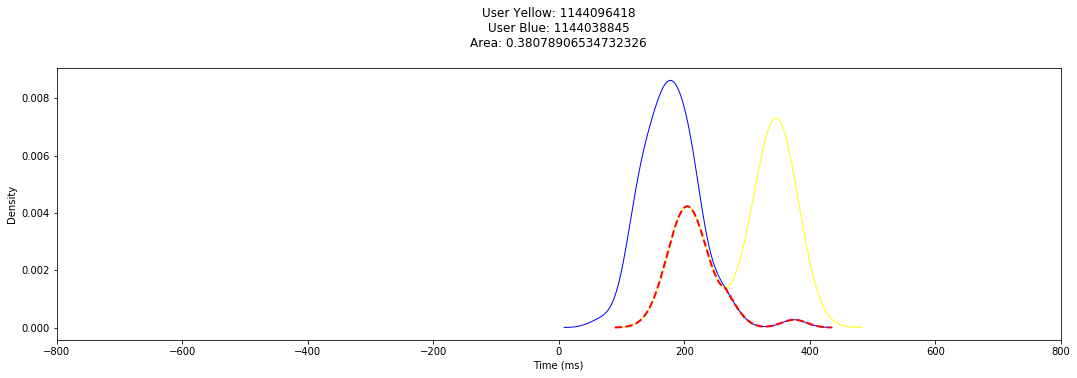

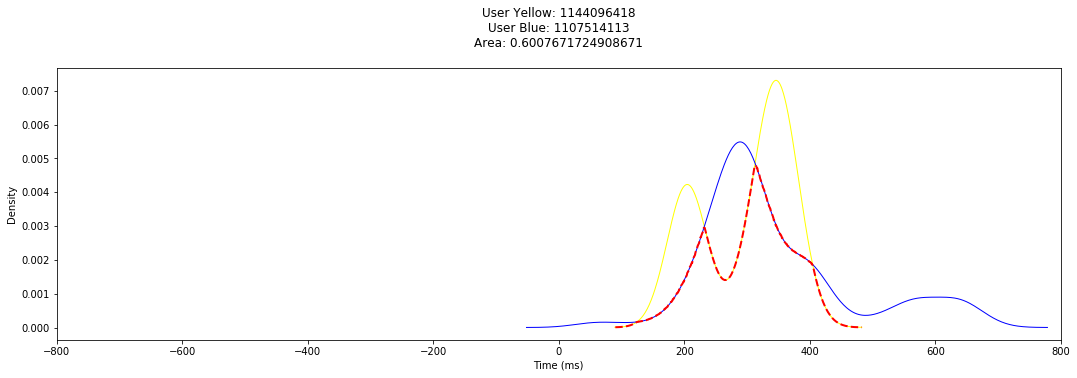

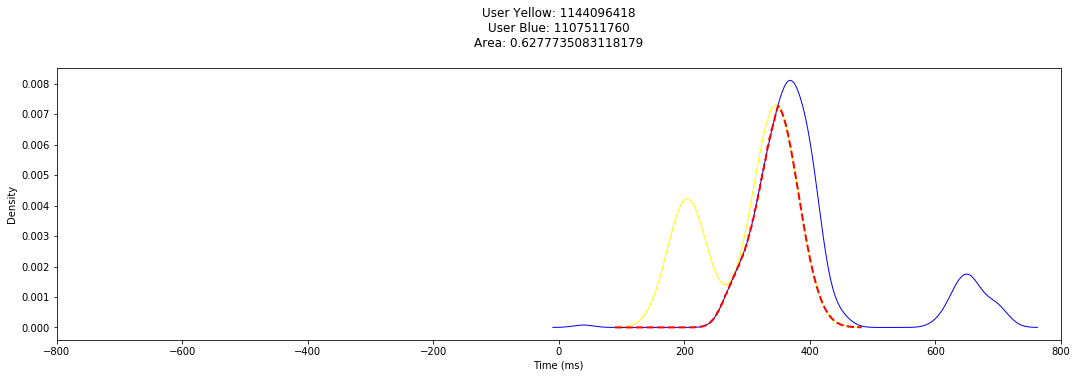

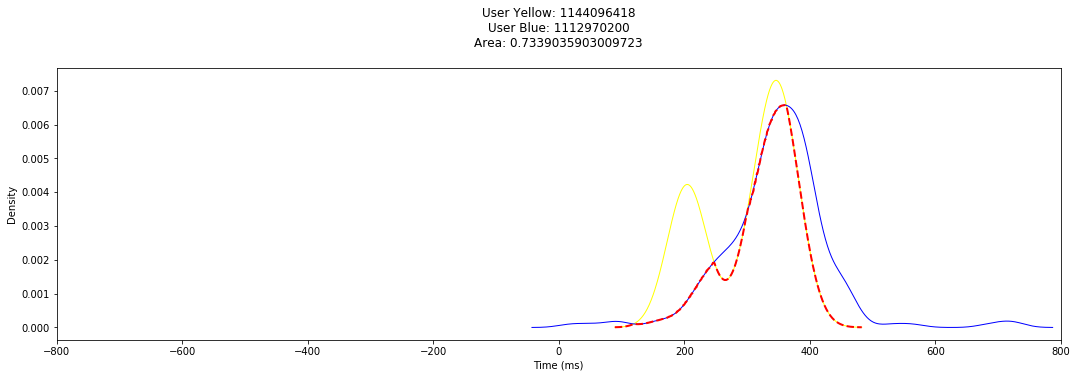

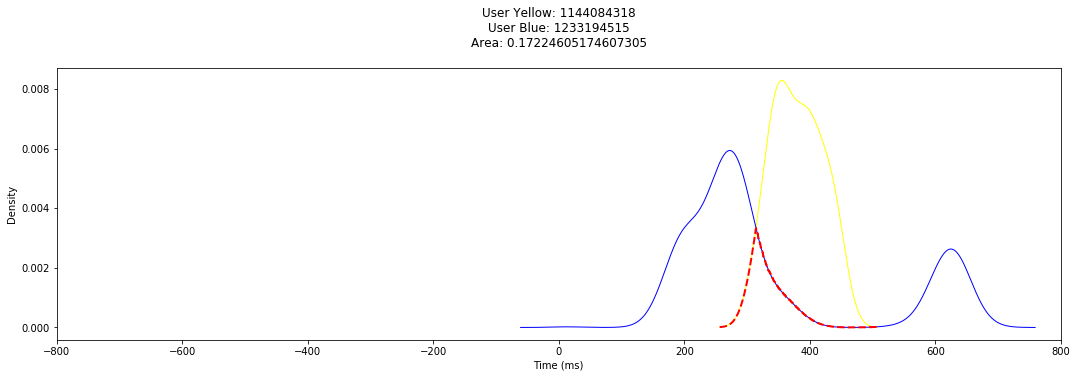

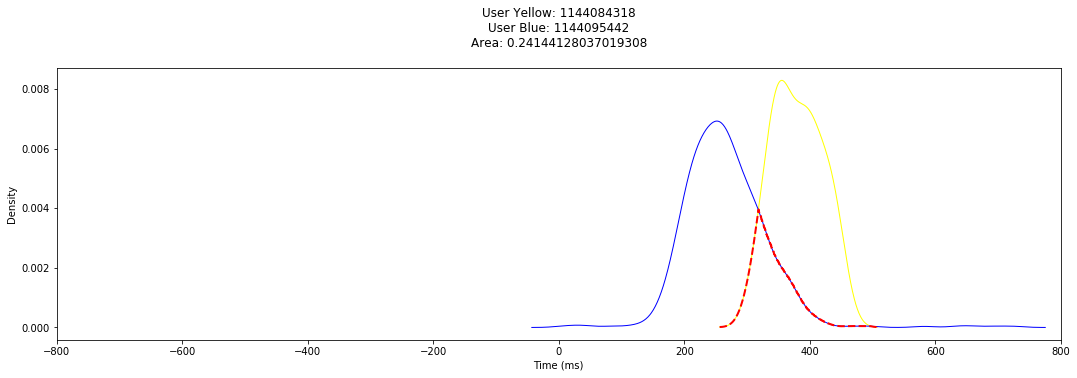

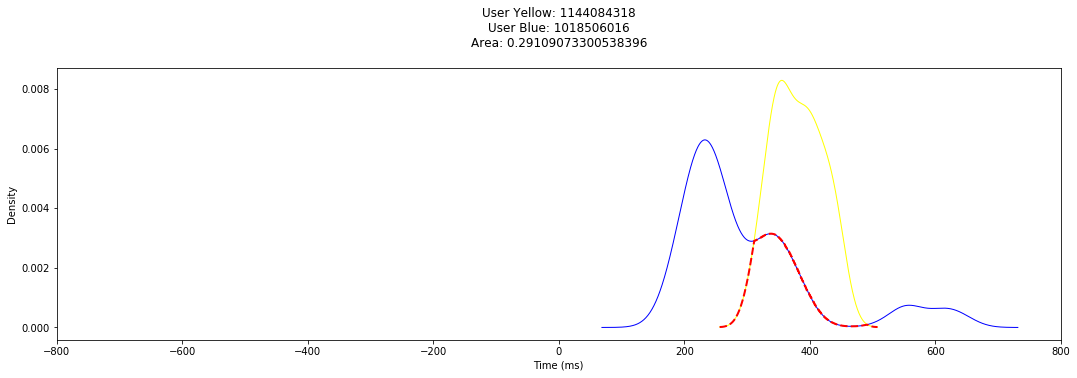

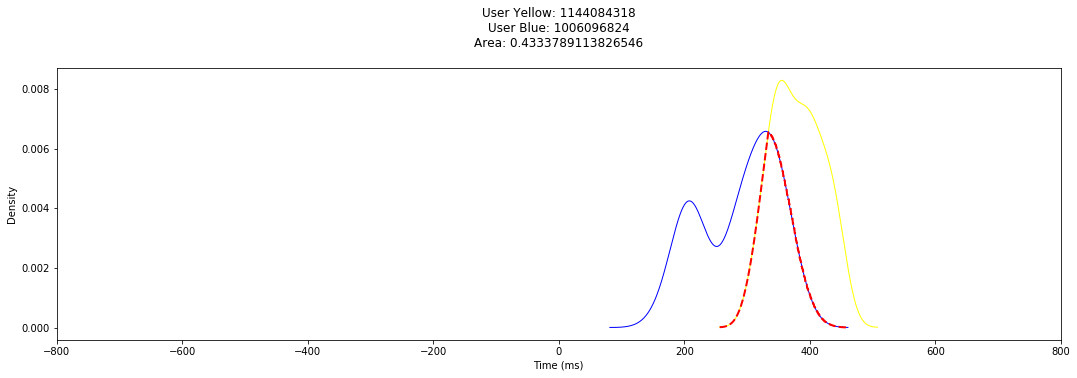

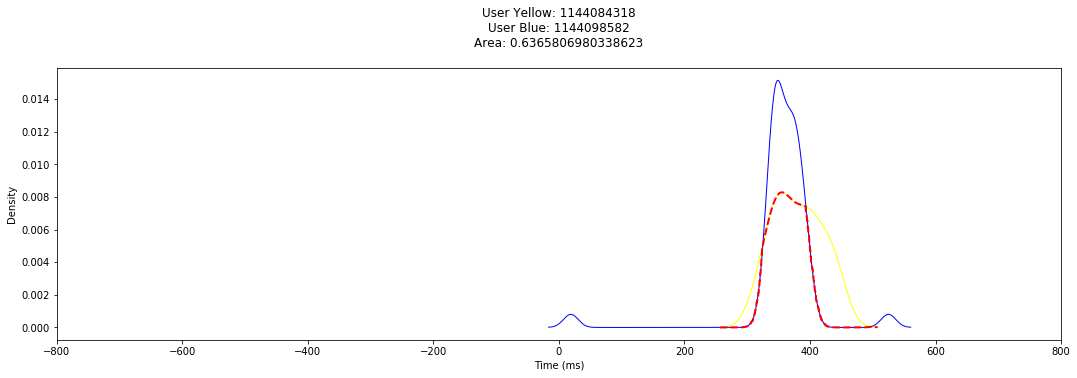

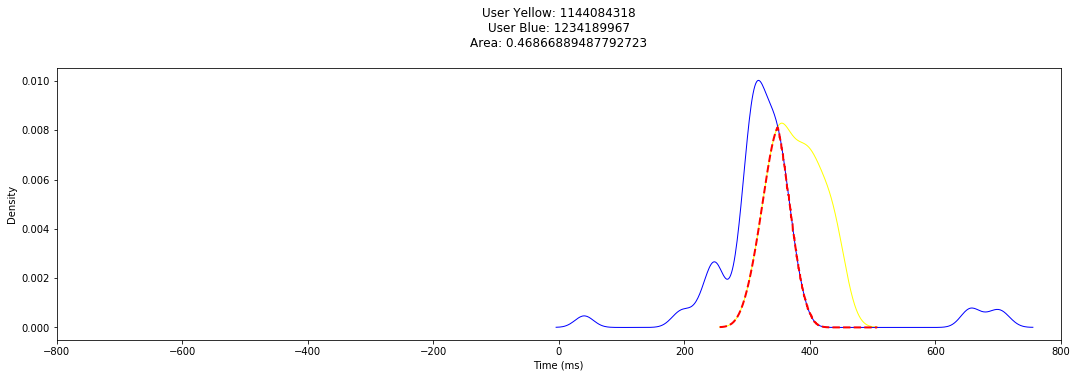

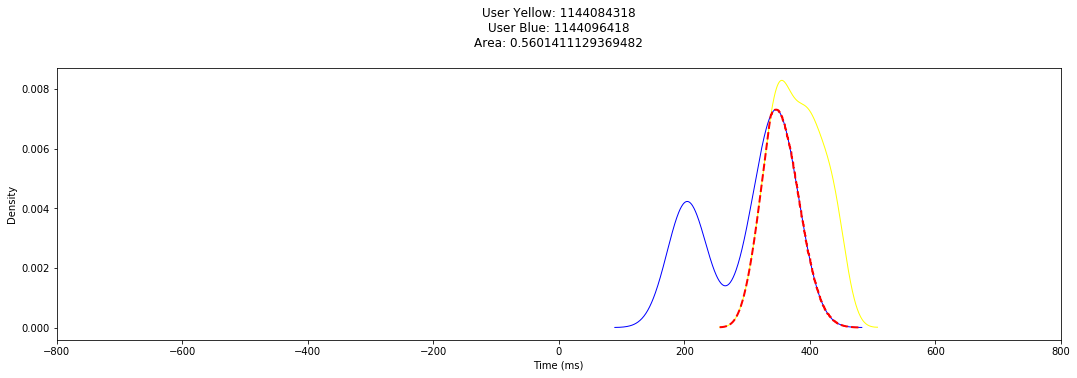

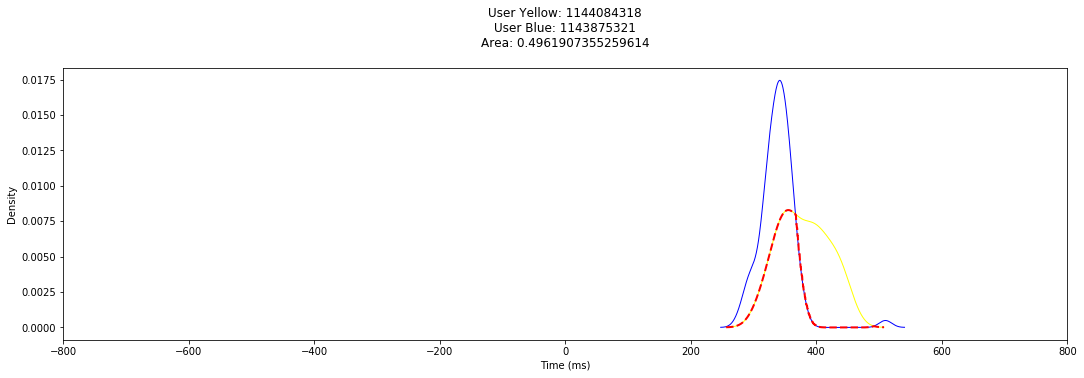

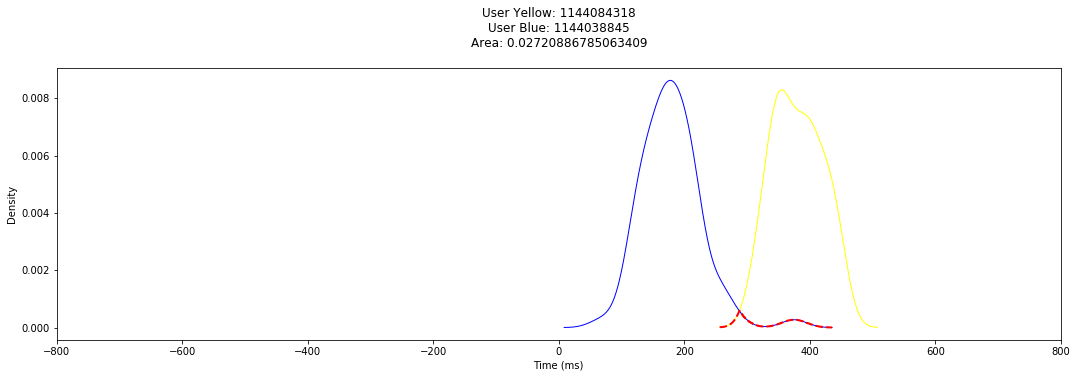

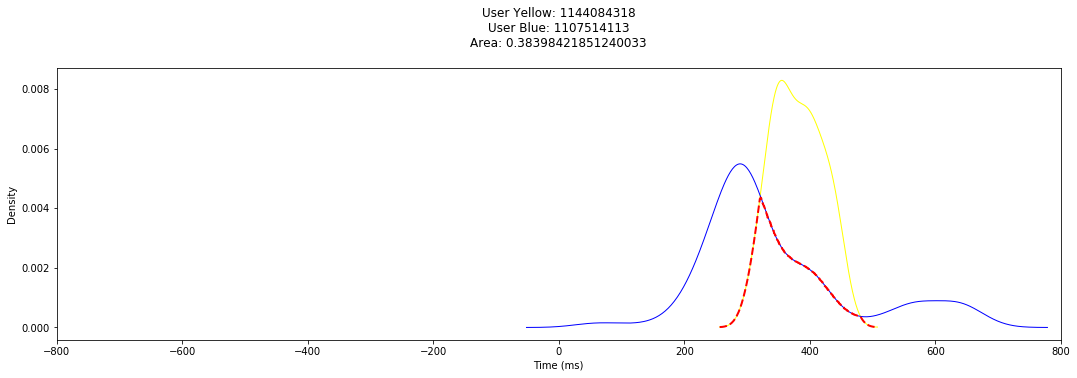

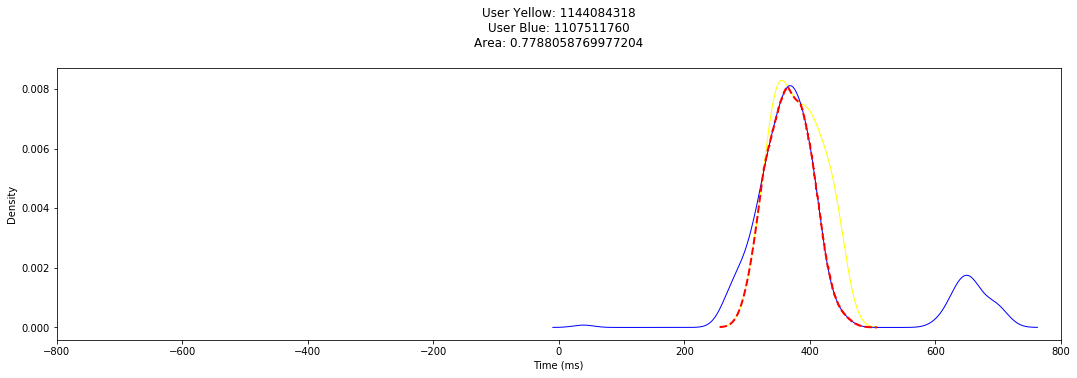

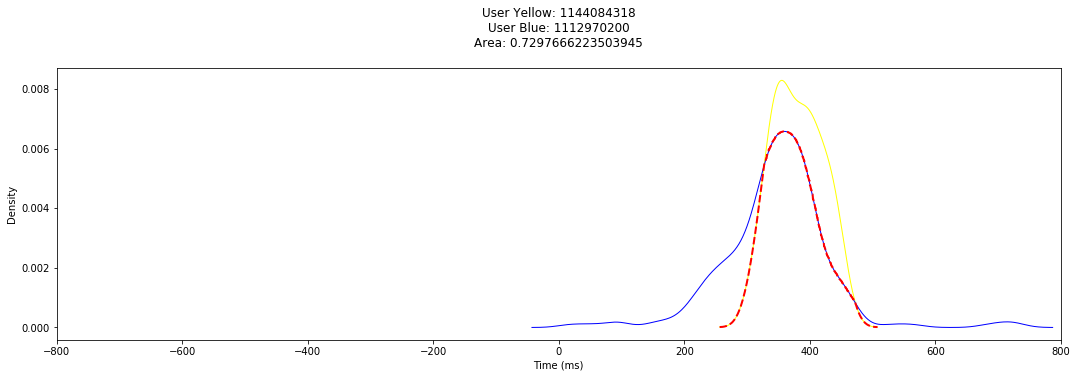

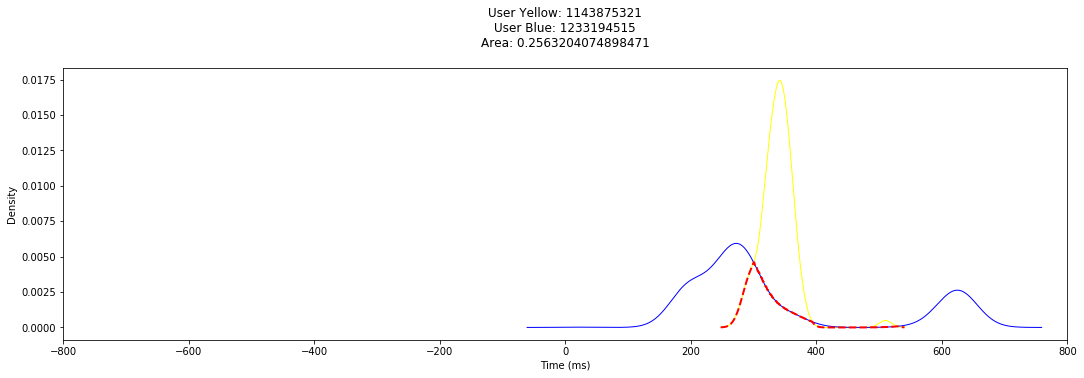

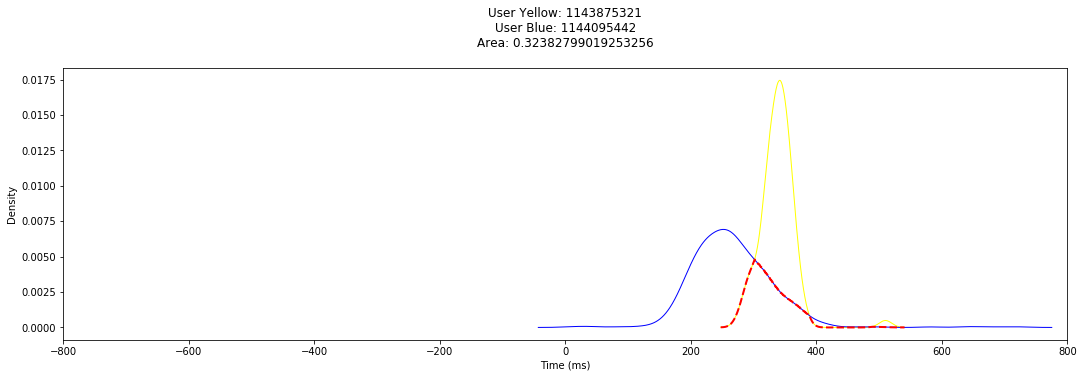

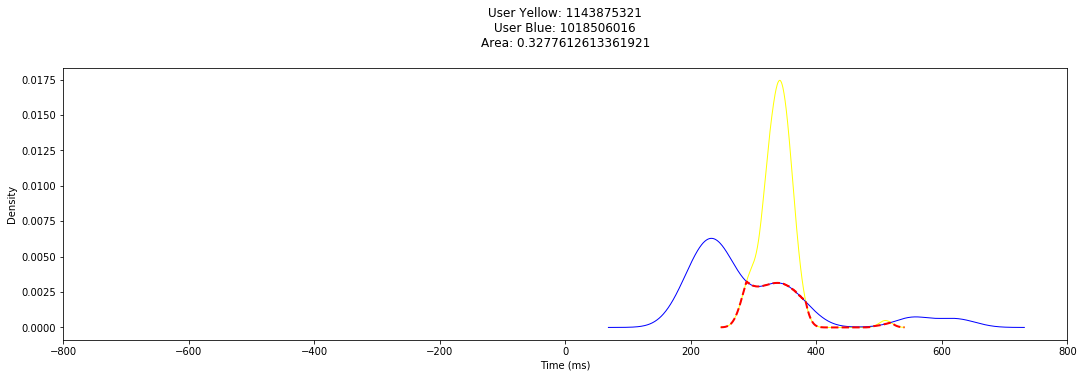

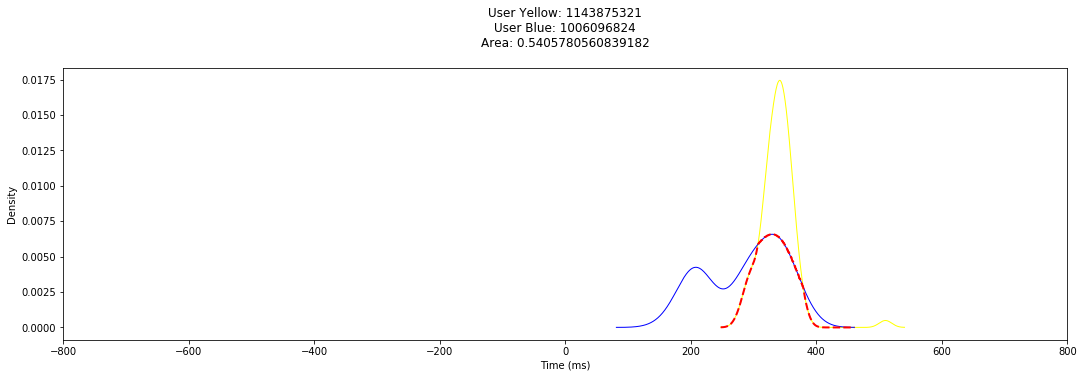

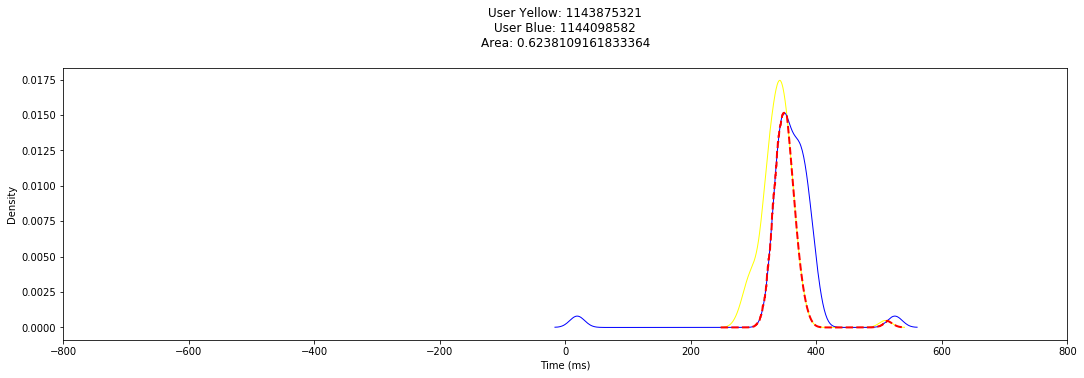

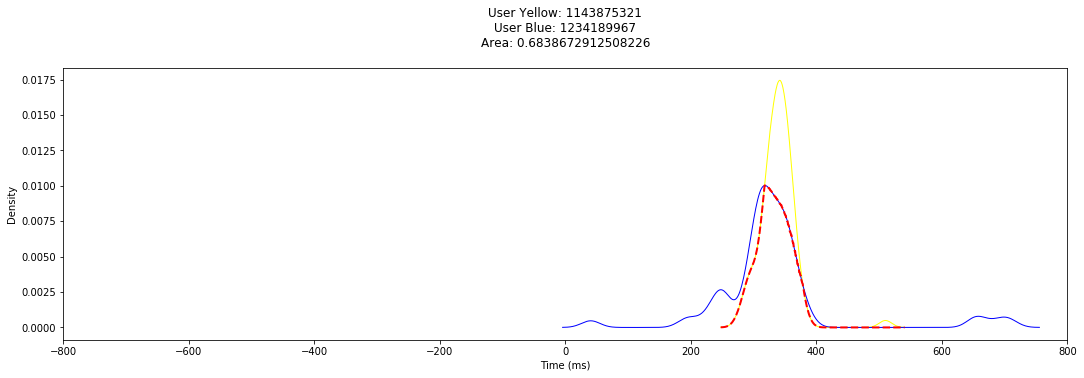

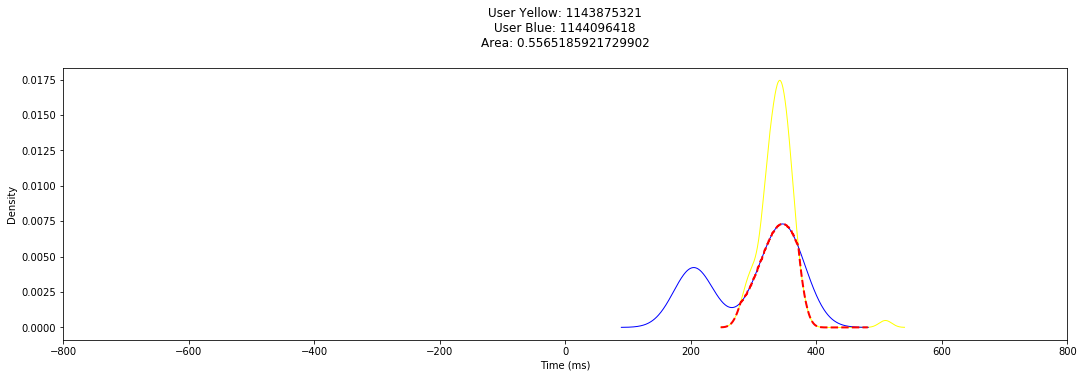

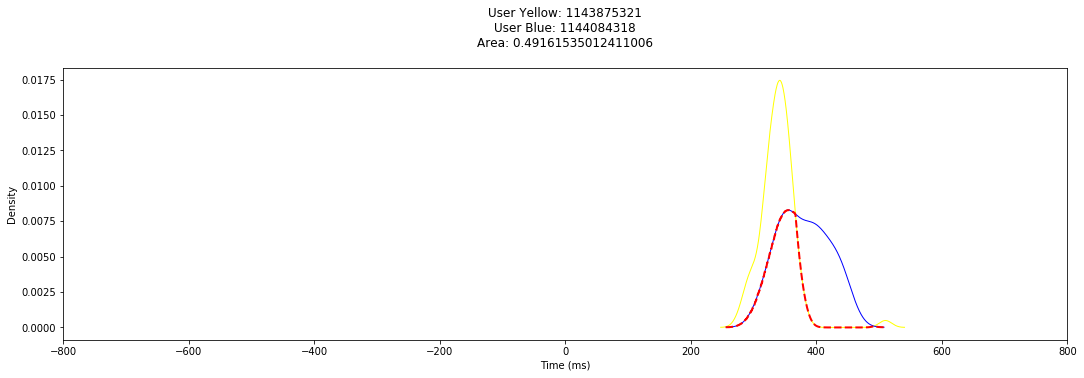

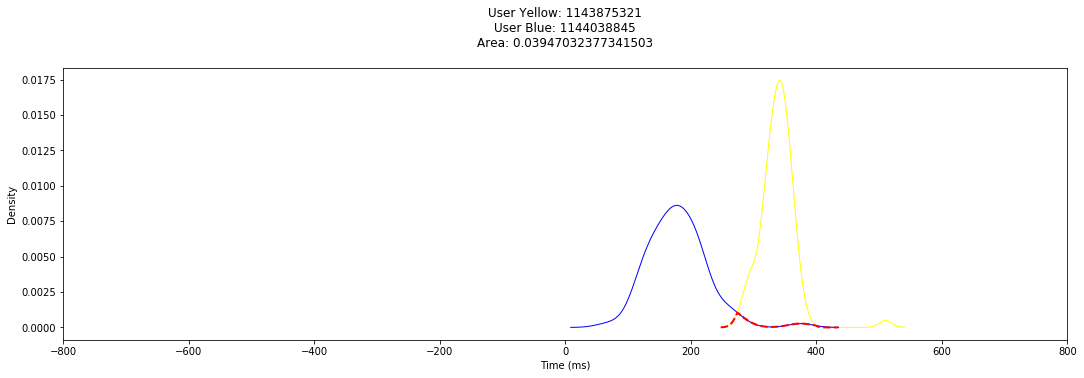

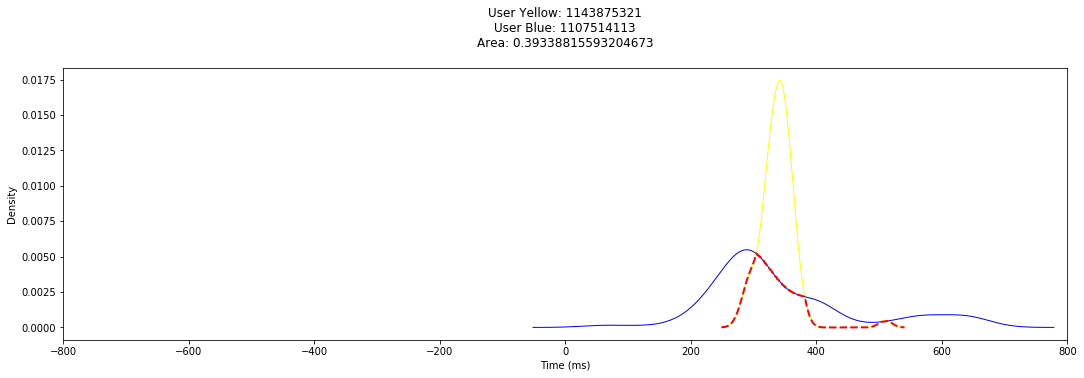

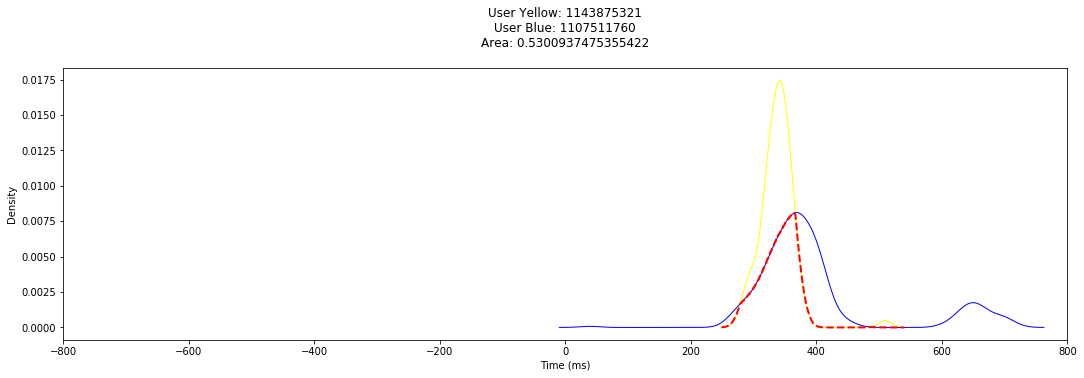

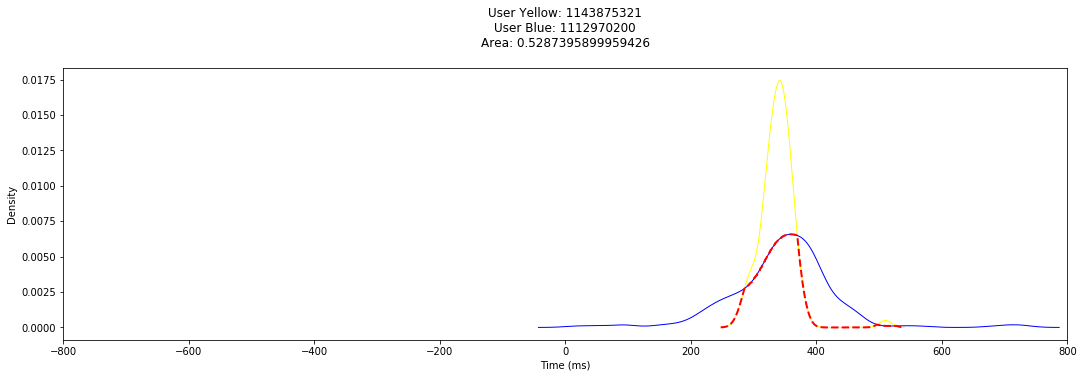

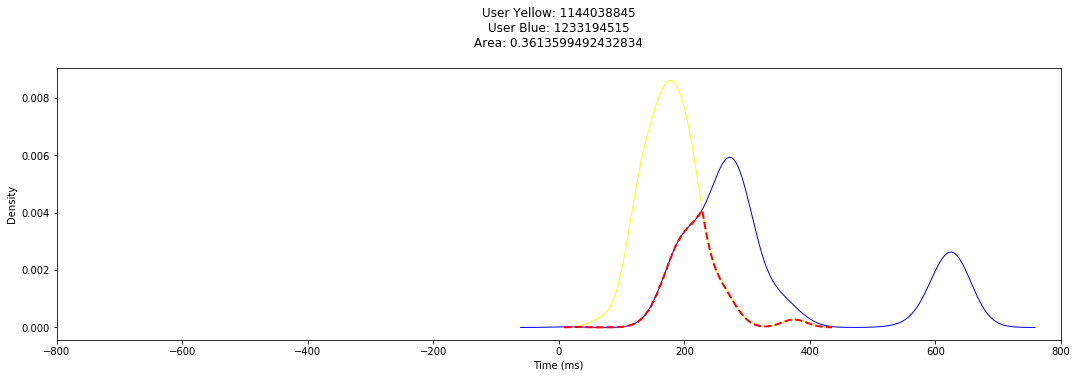

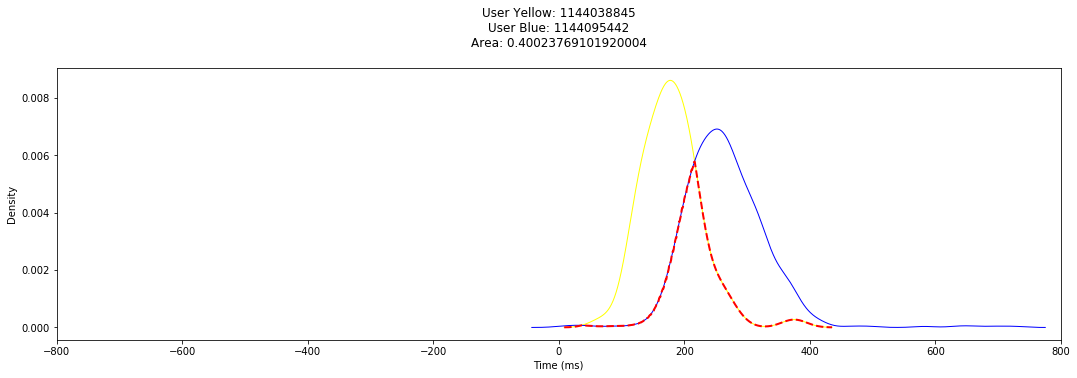

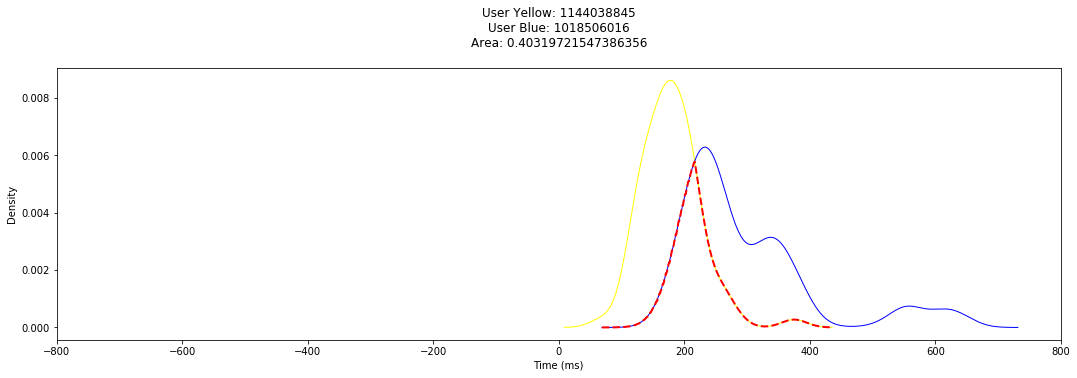

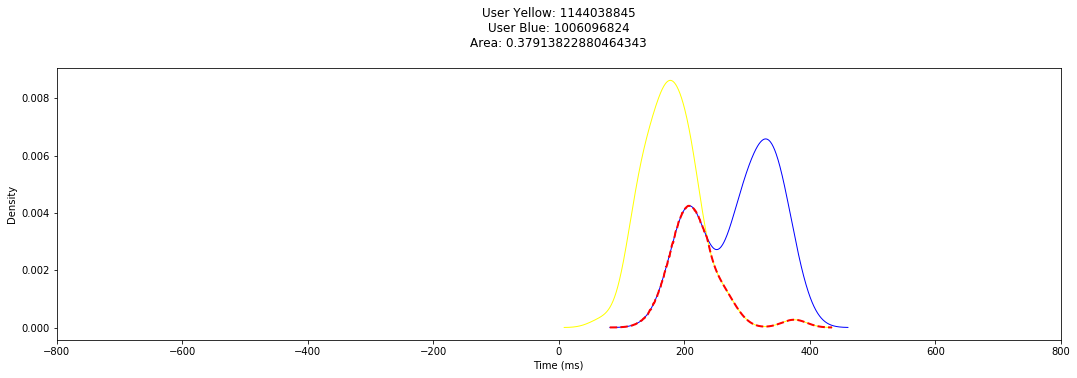

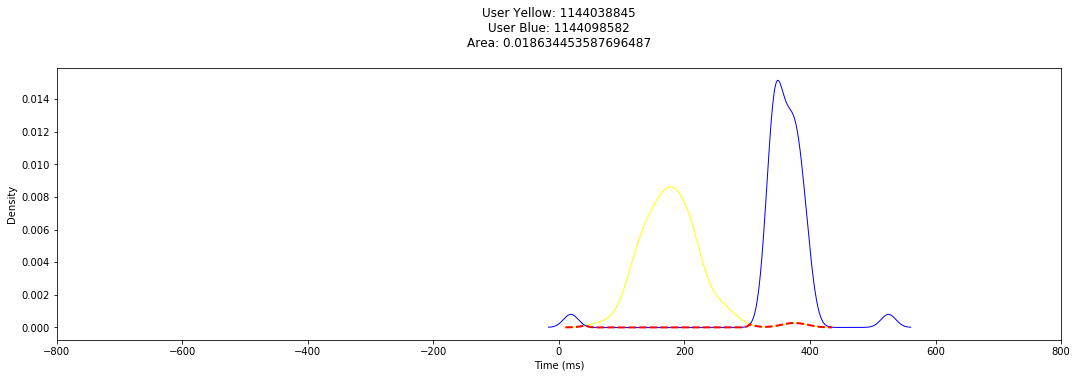

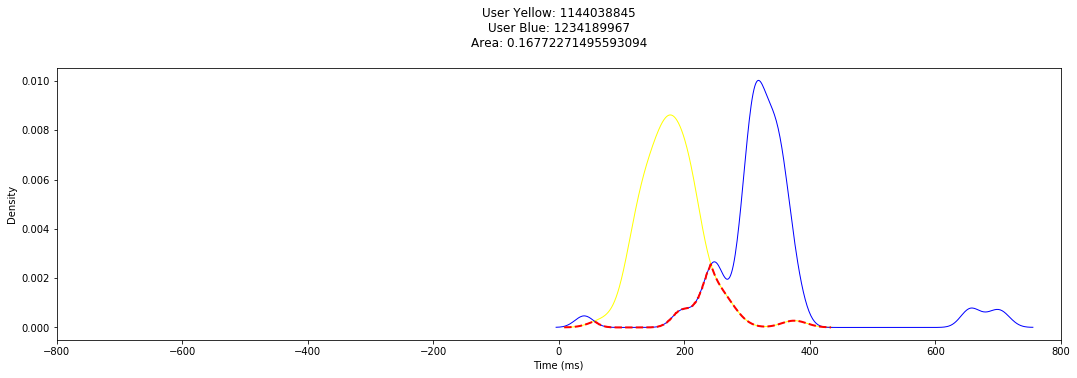

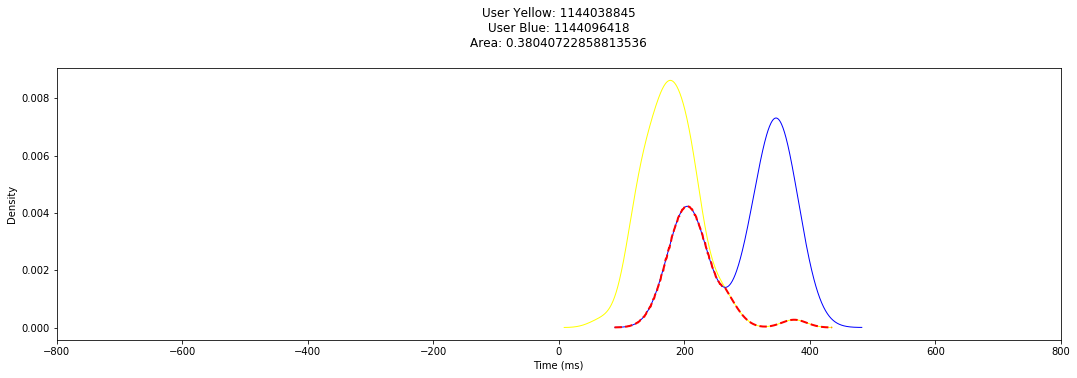

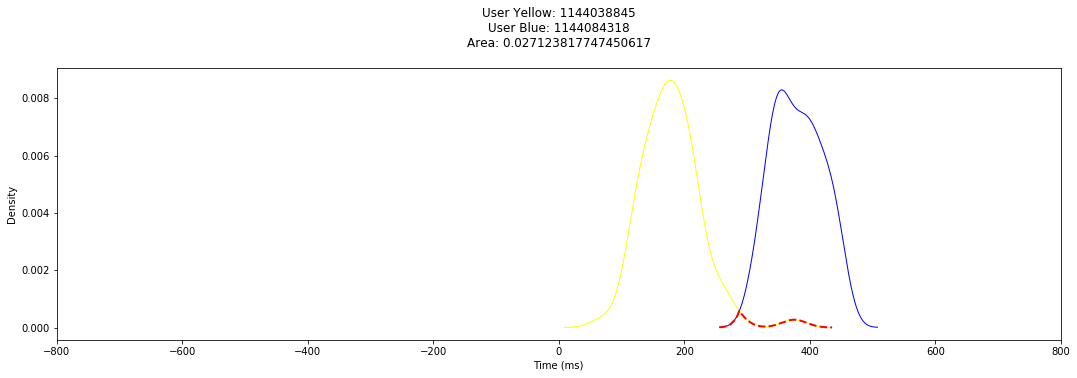

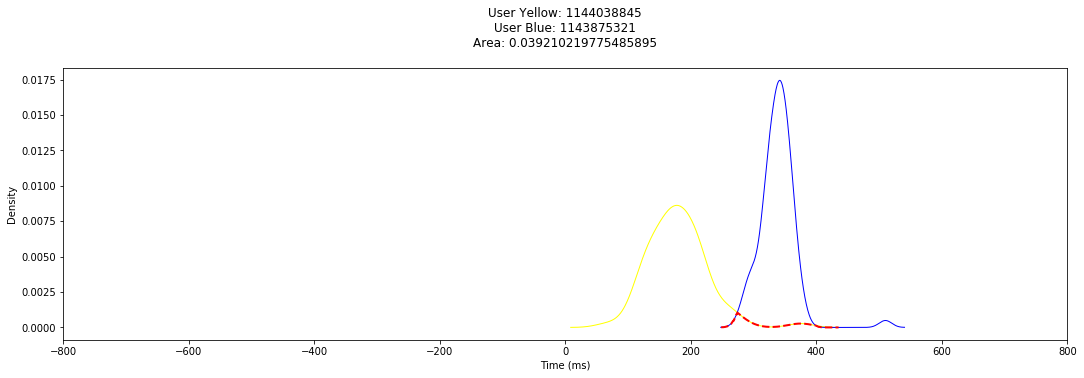

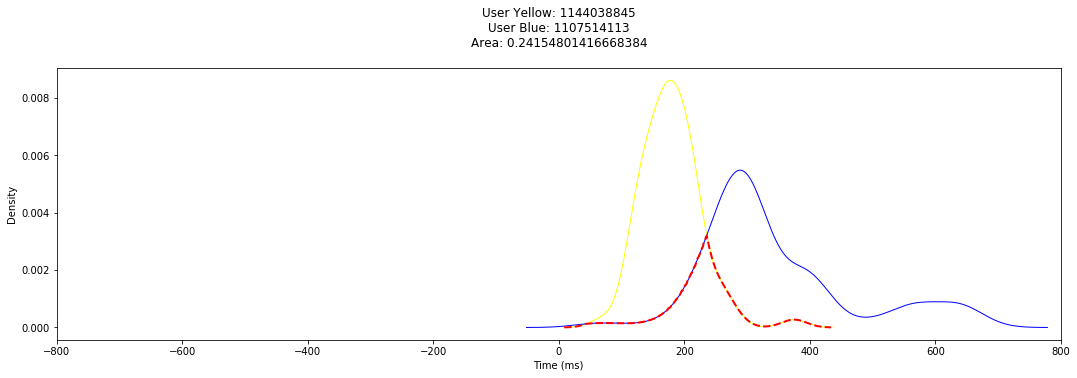

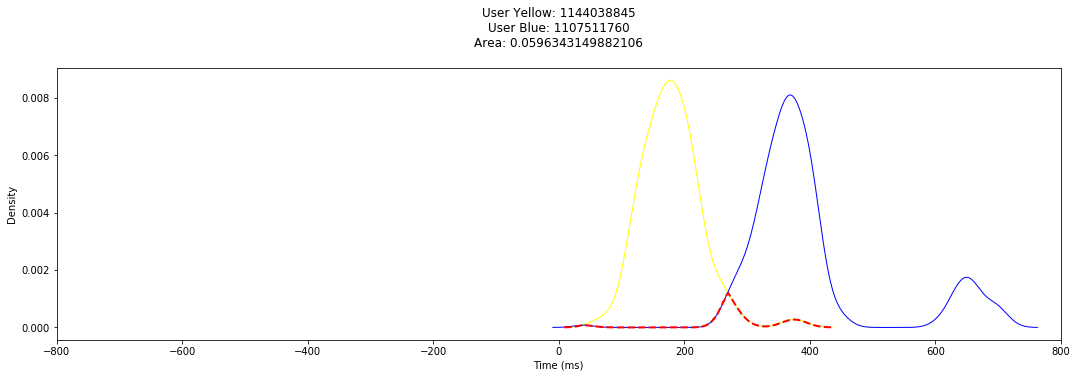

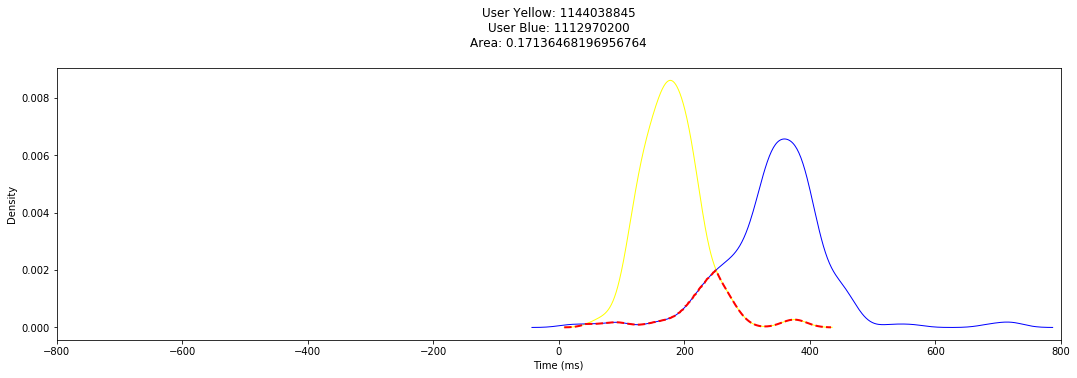

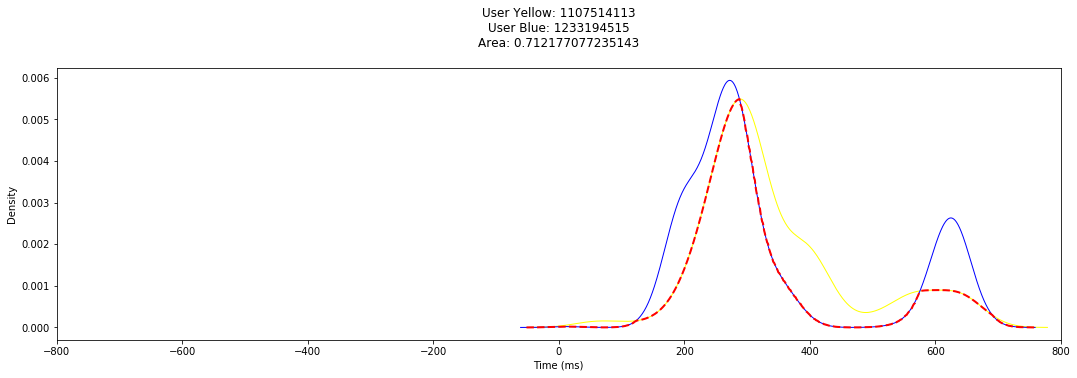

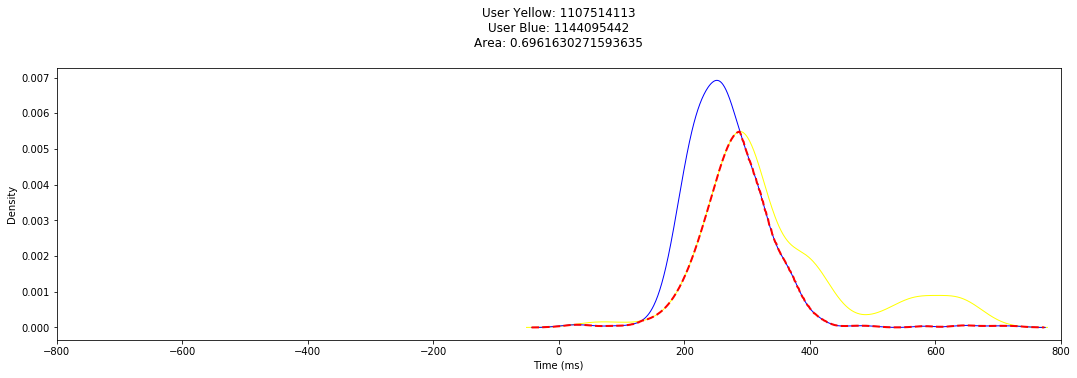

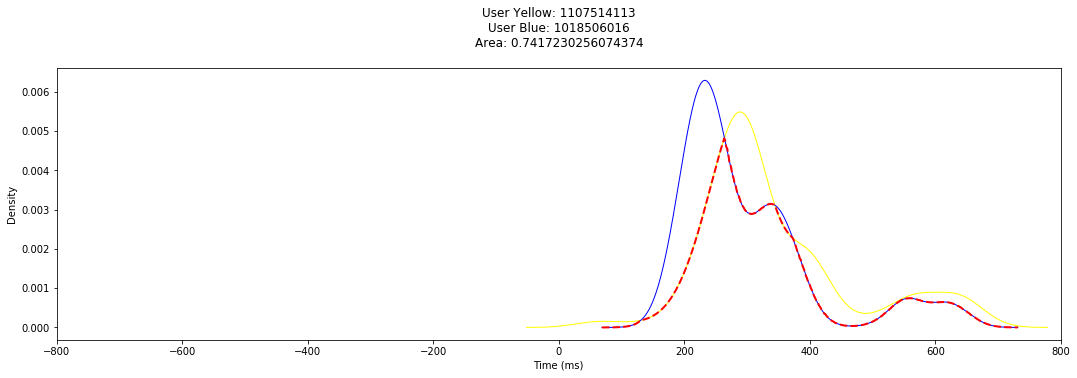

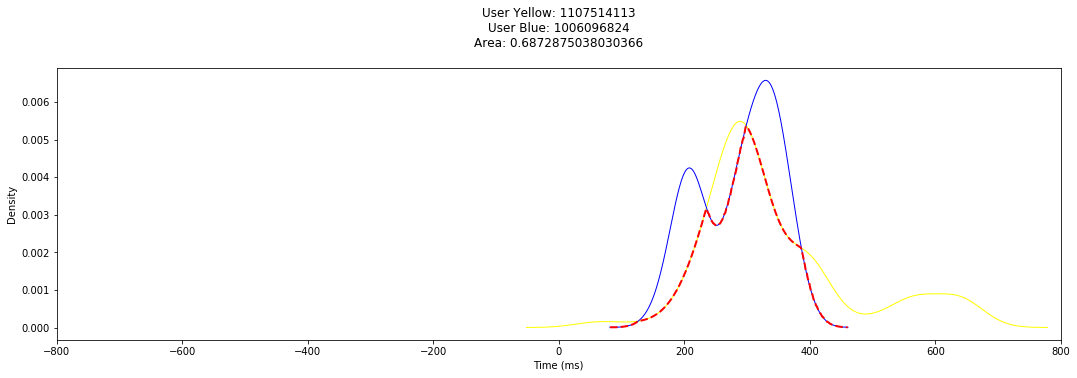

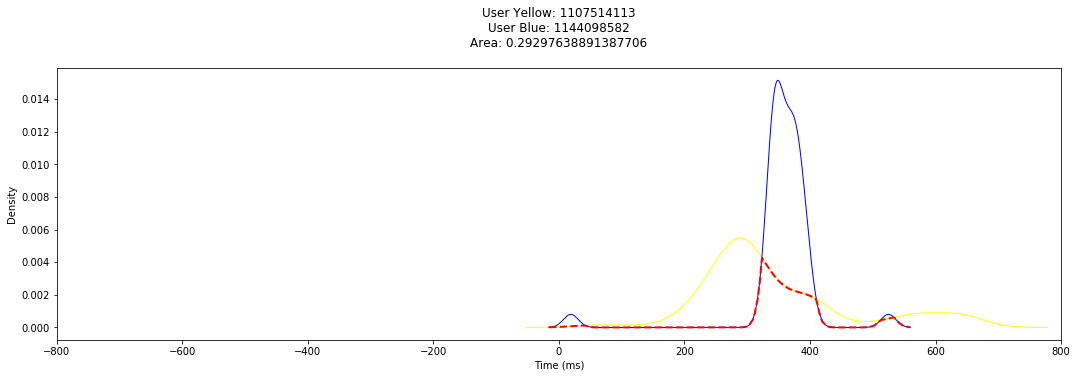

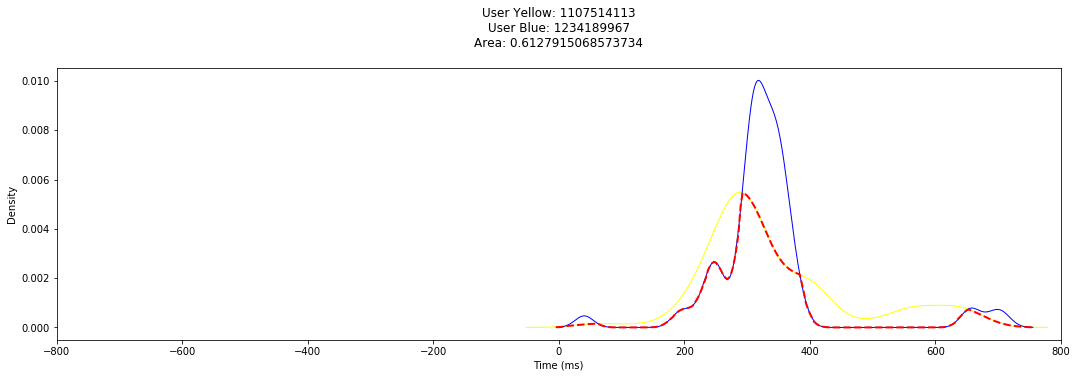

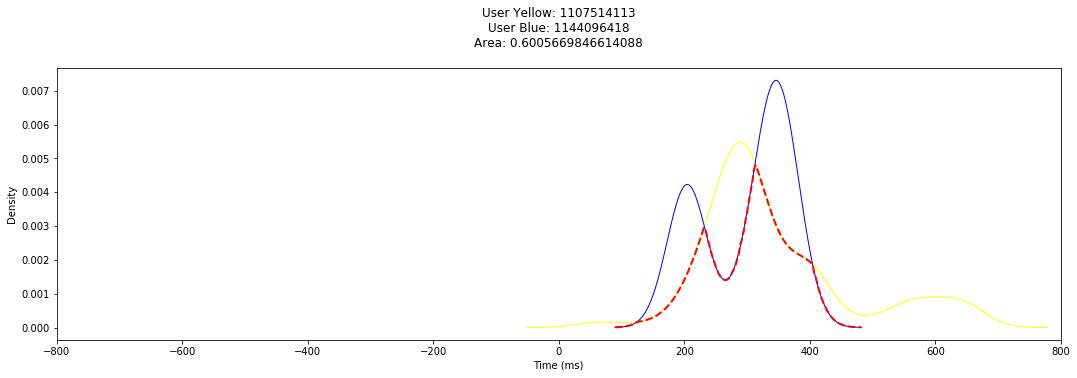

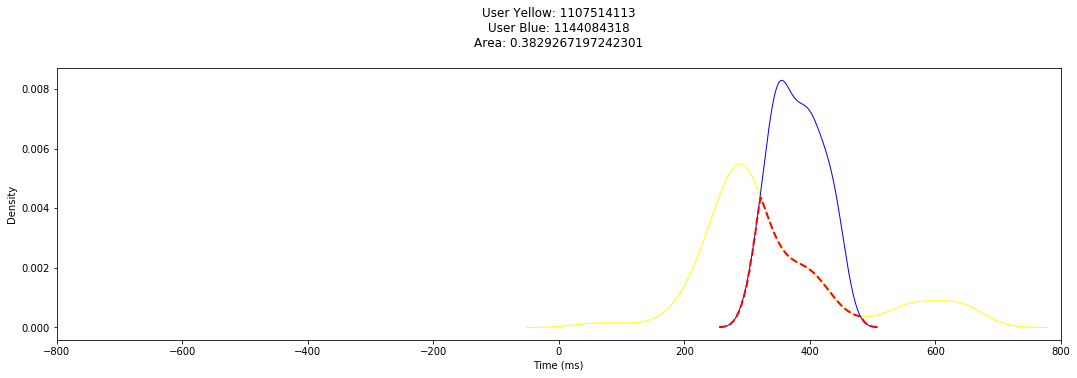

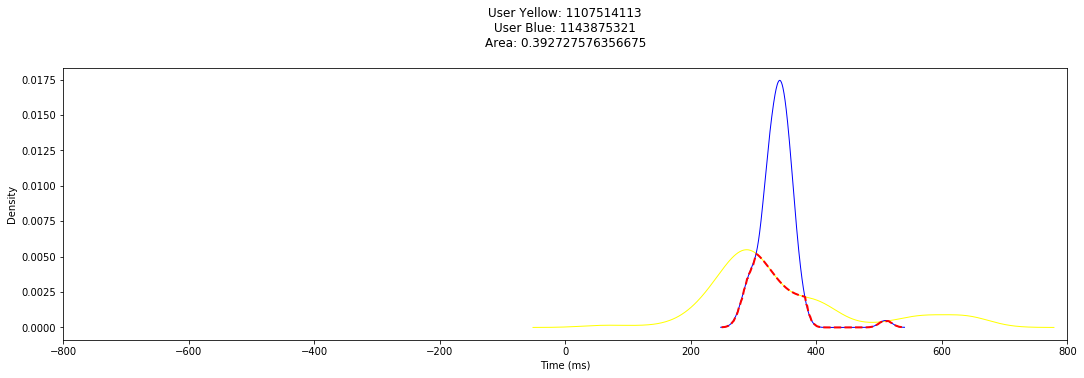

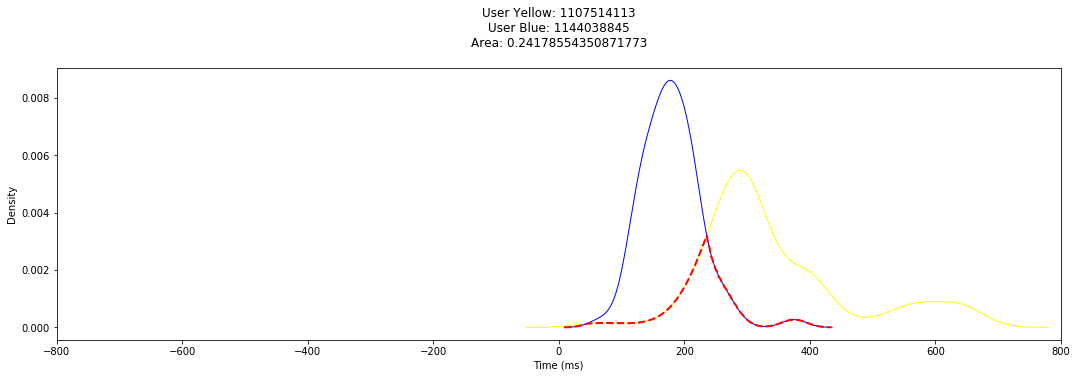

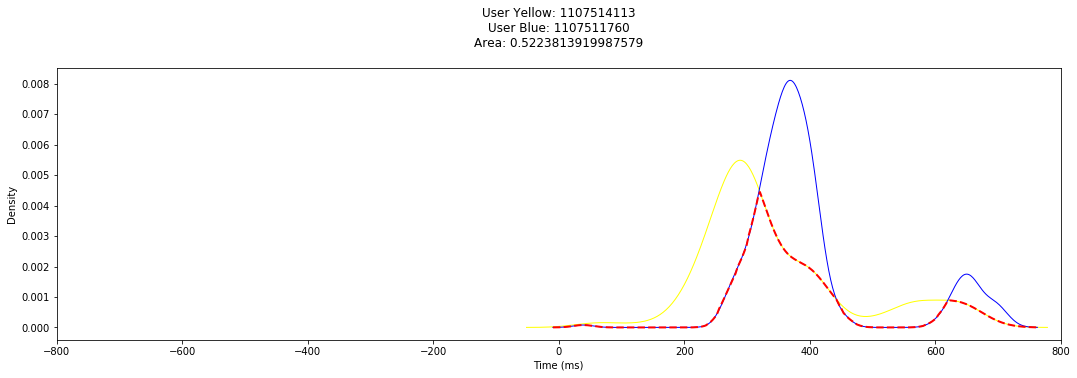

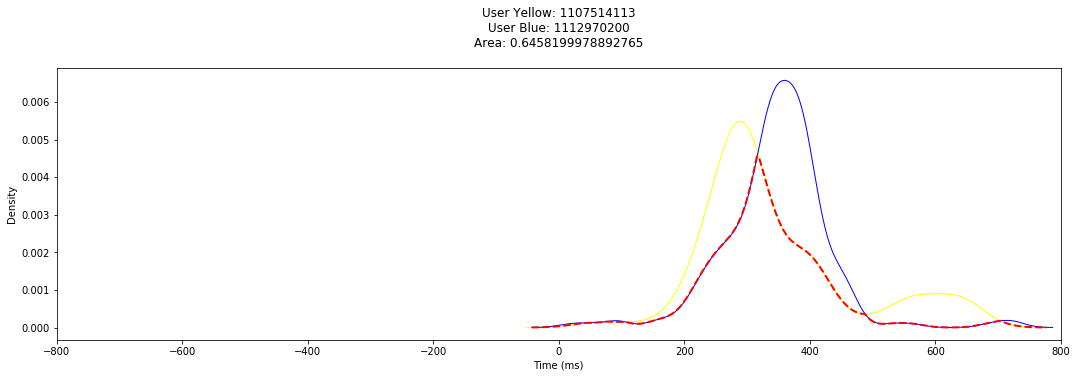

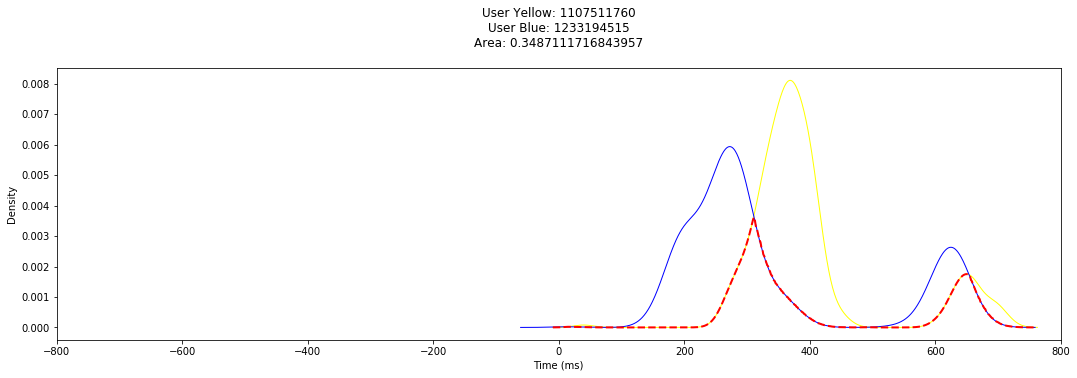

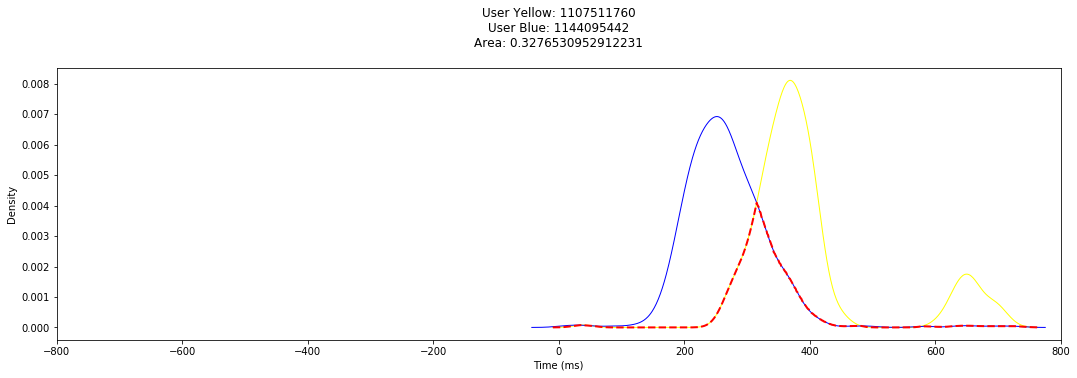

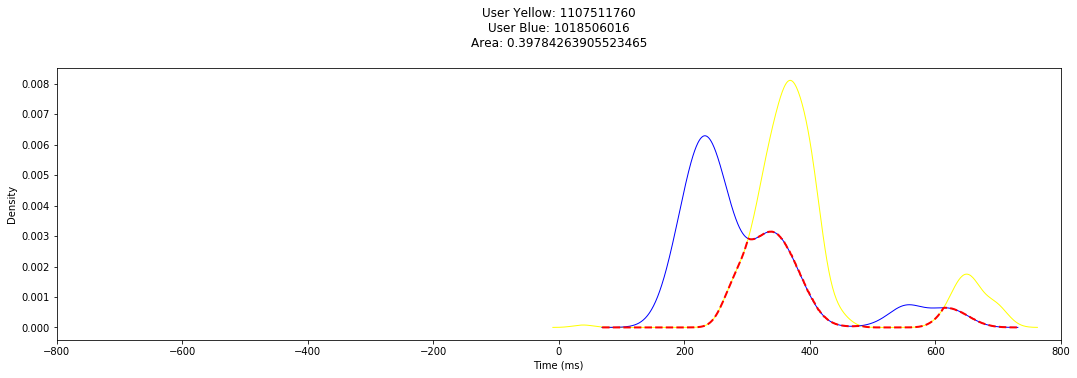

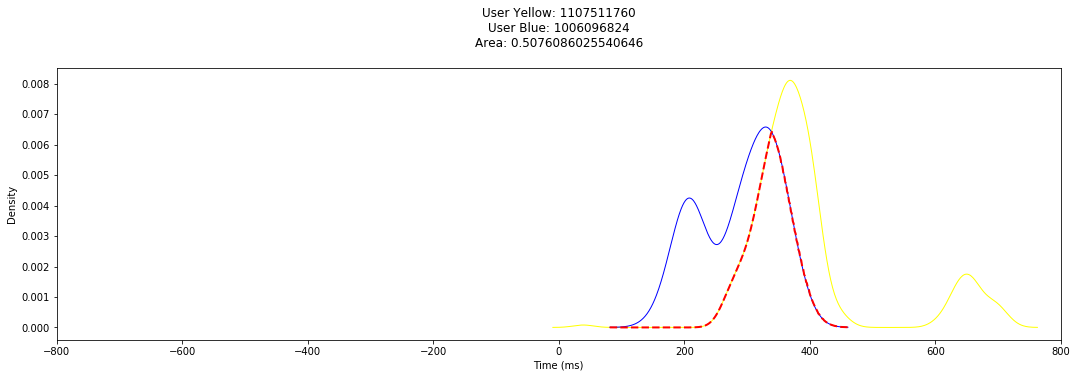

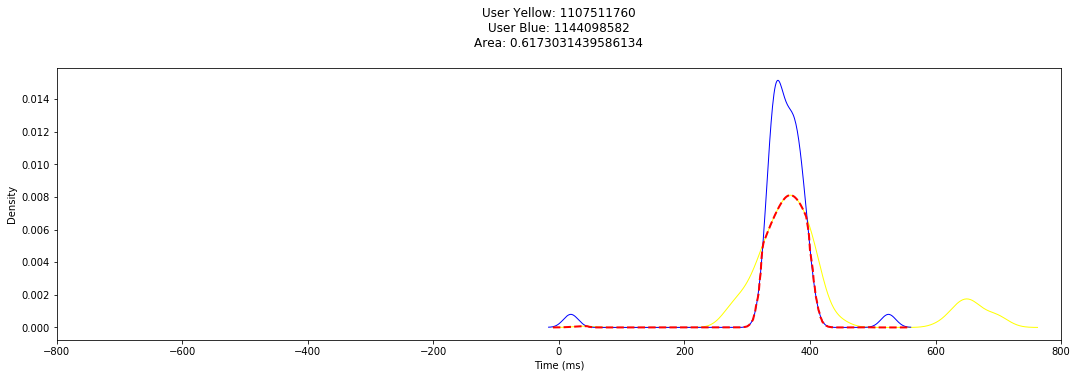

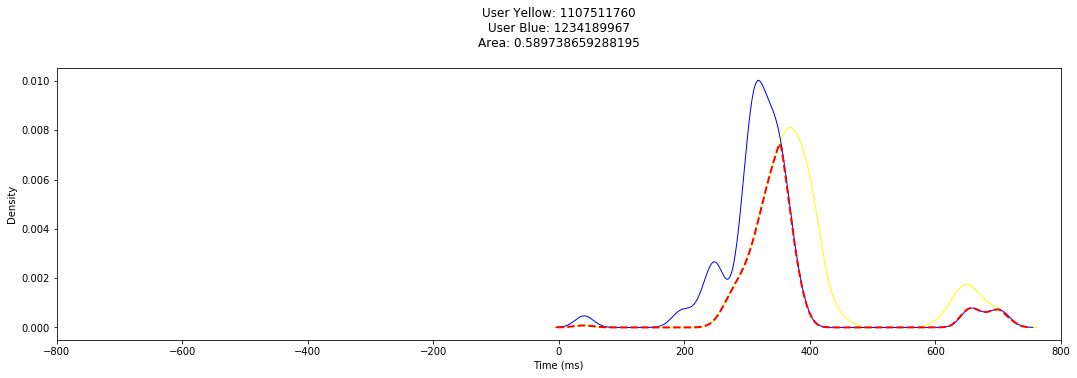

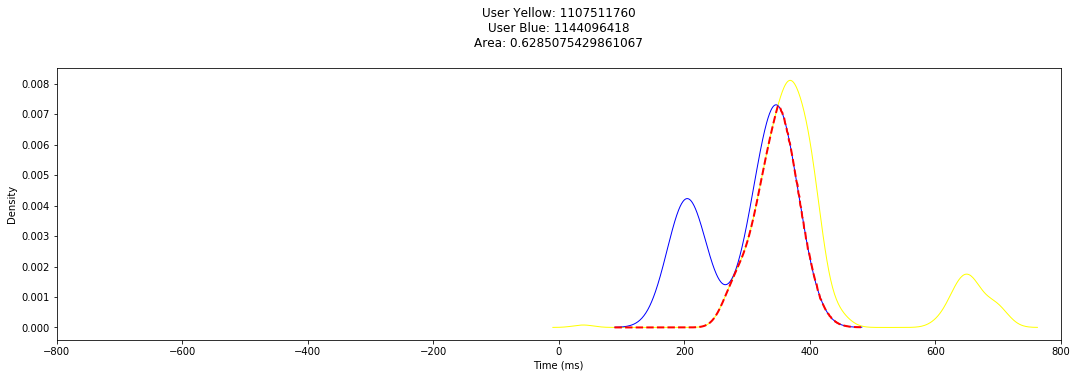

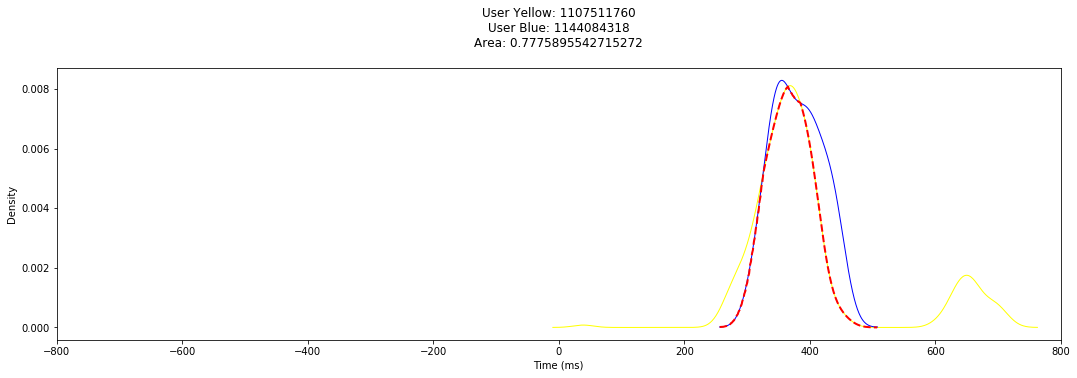

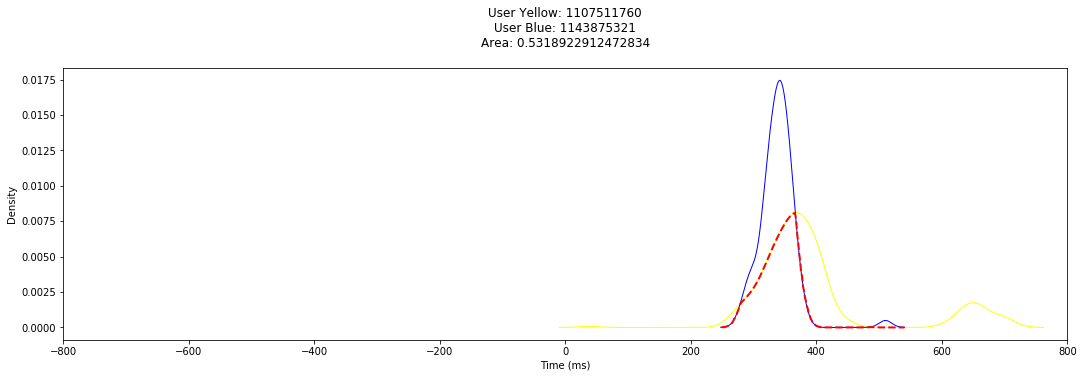

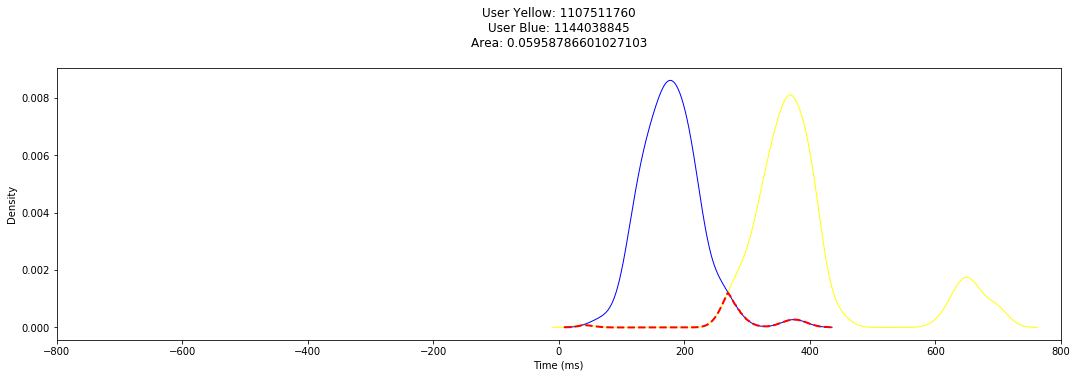

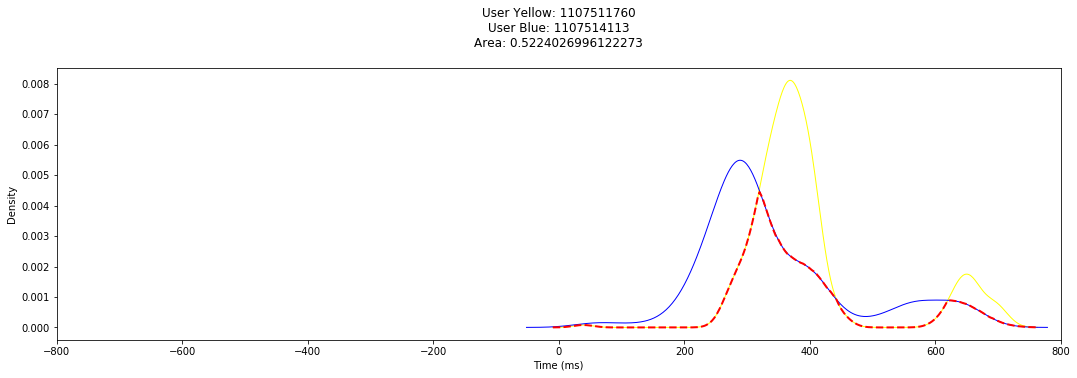

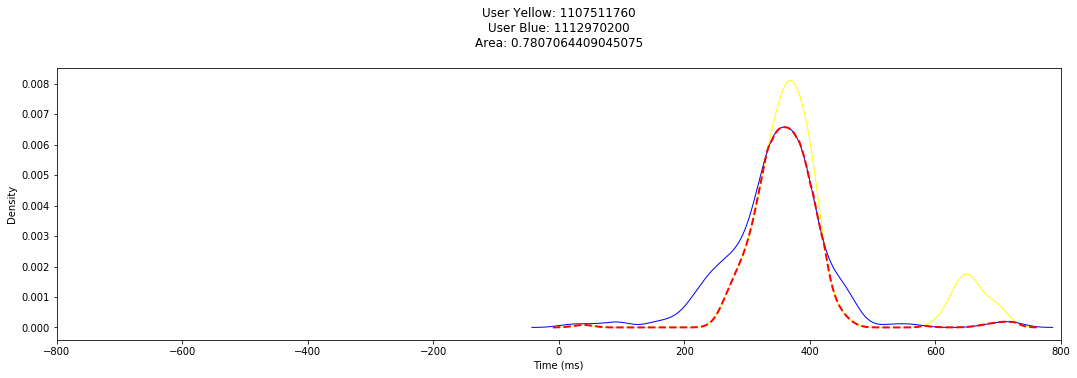

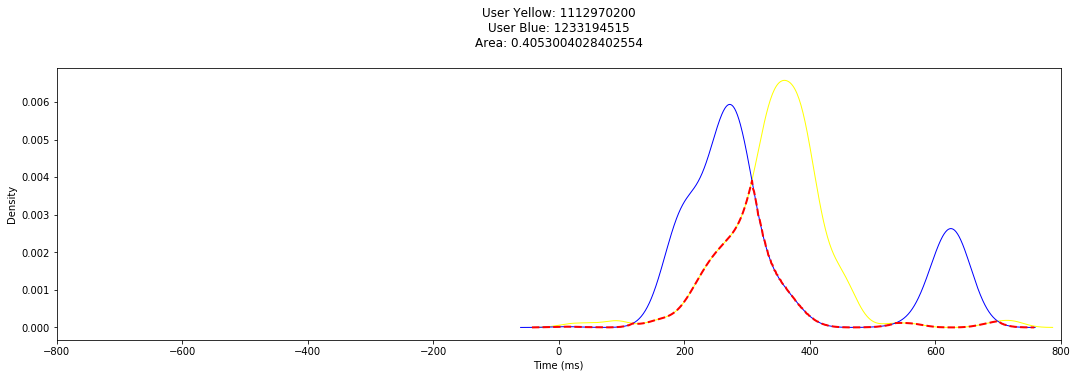

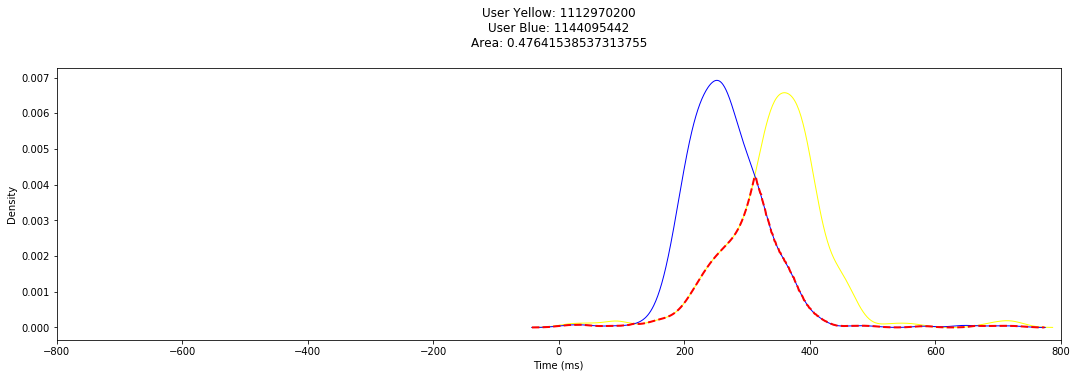

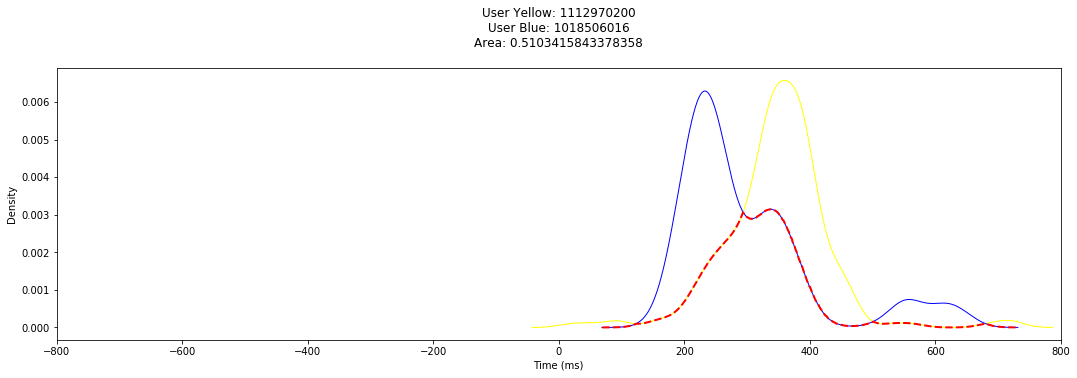

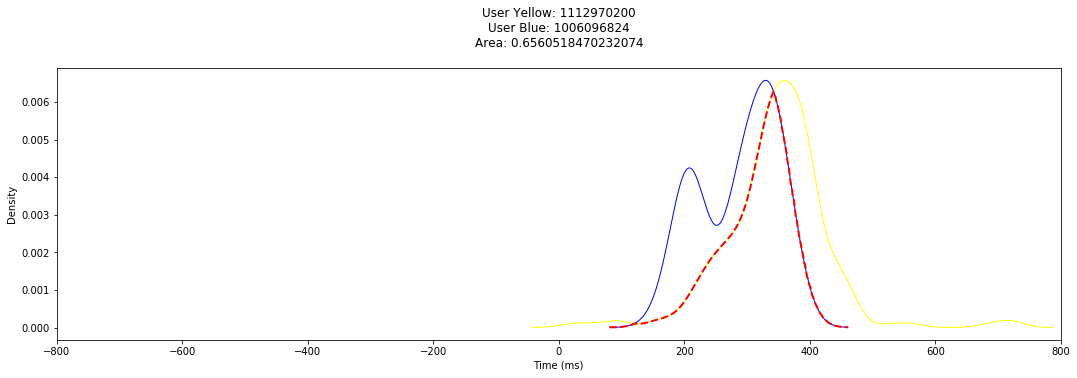

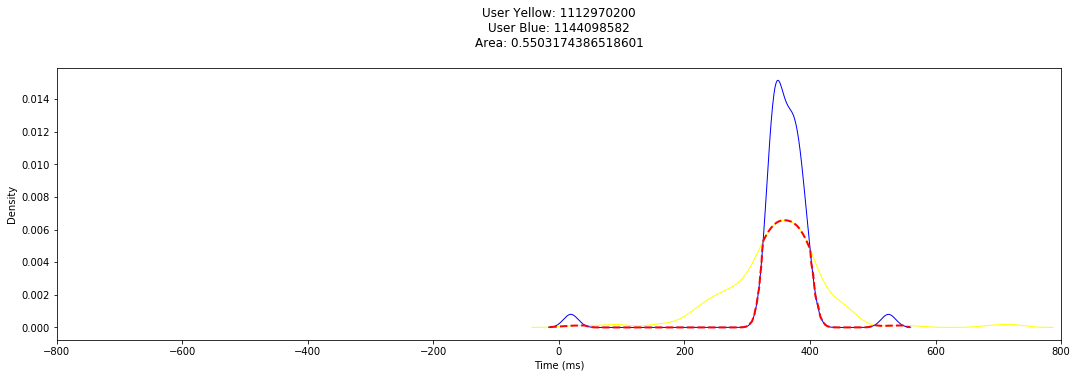

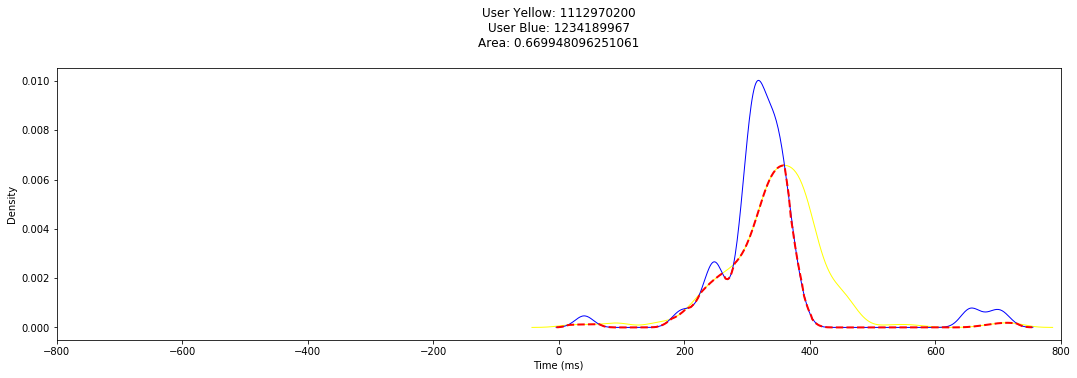

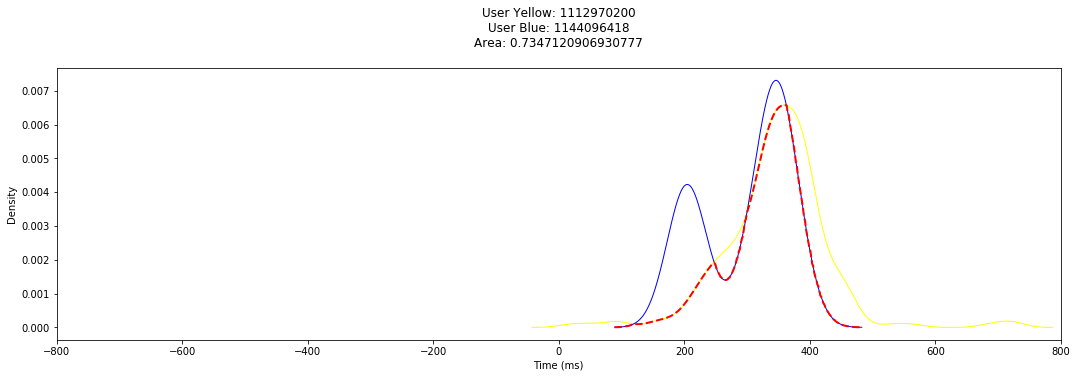

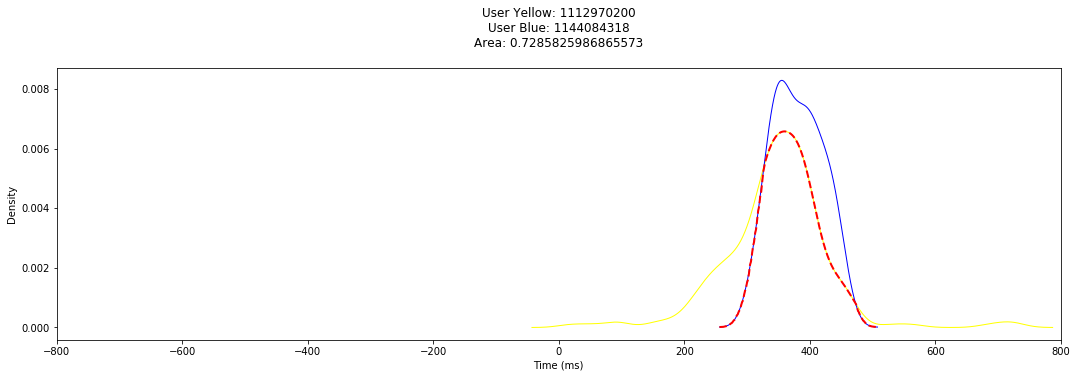

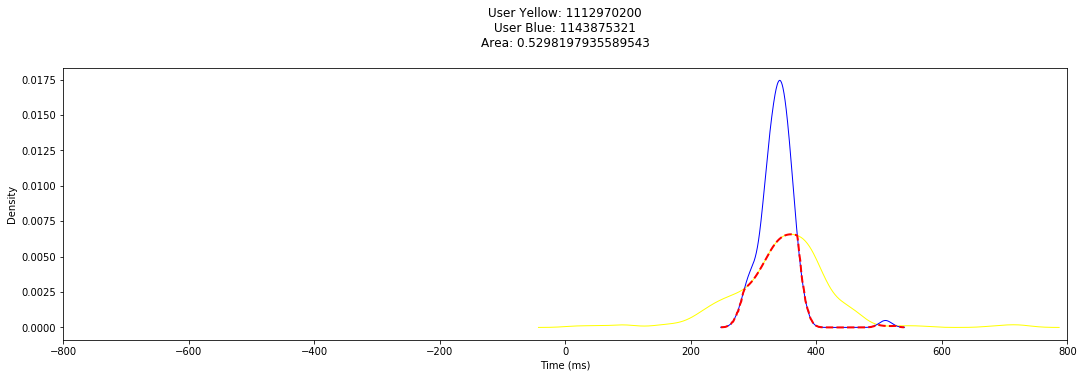

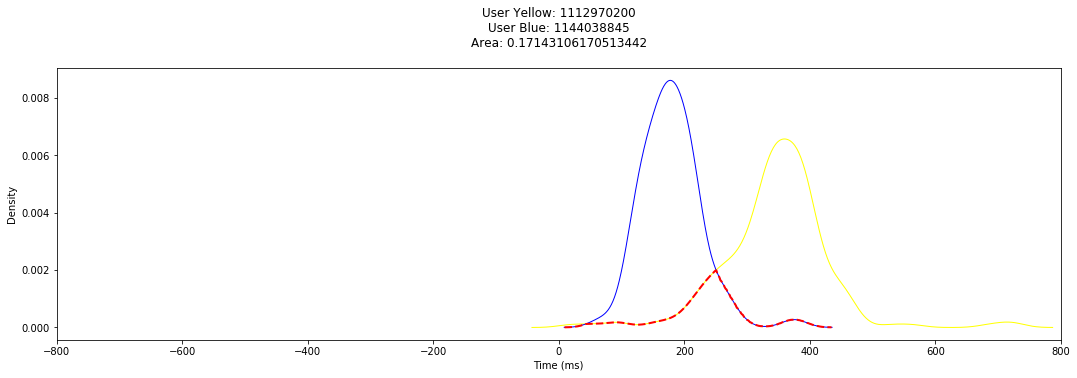

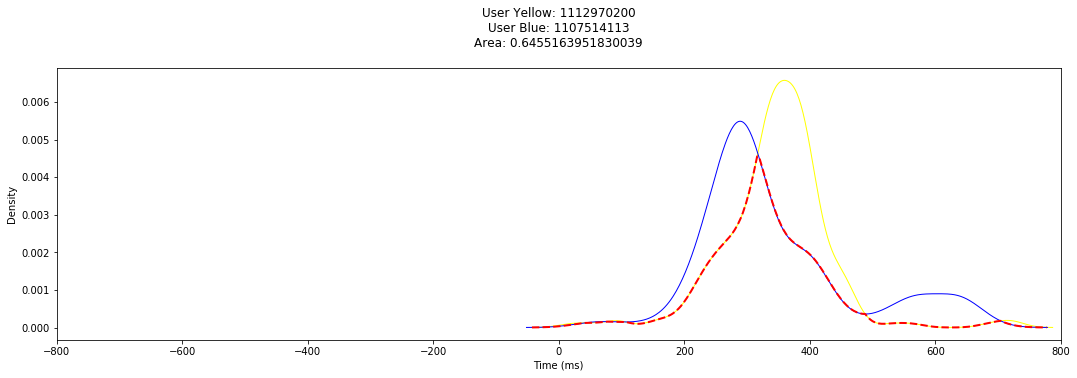

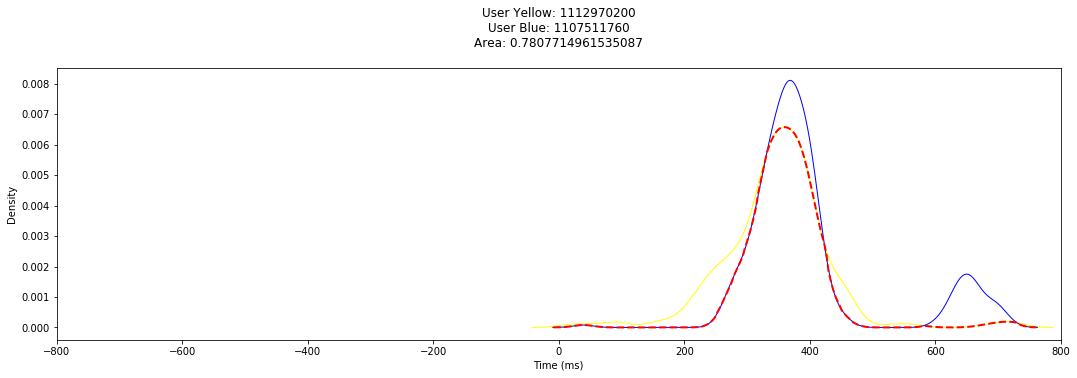

In [8]:
for user_1 in range(0, len(users_ids)):
    for user_2 in range(0, len(users_ids)):
        
        if user_1 == user_2:
            users_matrix[user_1][user_2] = 1
        else:
            us_1_name = user_name[user_1]
            us_2_name = user_name[user_2]
            
            usr1 = global_dict_gaps[us_1_name]
            usr2 = global_dict_gaps[us_2_name]

            kde_usr1 = sm.nonparametric.KDEUnivariate(usr1)
            kde_usr1.fit()

            kde_usr2 = sm.nonparametric.KDEUnivariate(usr2)
            kde_usr2.fit()

            fig, ax = plt.subplots(1, 1, figsize = (18,5))

            x, y = find_line(kde_usr1.support, kde_usr1.density, kde_usr2.support, kde_usr2.density)

            line = Line2D(x, y, color="red", linestyle = '--', linewidth = 2)

            ax.plot(kde_usr1.support, kde_usr1.density, color="yellow", lw=1)
            ax.plot(kde_usr2.support, kde_usr2.density, color="blue", lw=1)
            ax.add_line(line)
            ax.set_xlim(-800, 800)
            #ax.fill_between(x, y, 0 , facecolor='red')
            area_rd = trapz(x=x, y=y)
            
            users_matrix[user_1][user_2] = area_rd
            
            ax.set_xlabel('Time (ms)')
            ax.set_ylabel('Density')
            plt.title("User Yellow: "+us_1_name+"\n"+"User Blue: "+ us_2_name +"\n"+"Area: "+str(area_rd)+"\n")
            
            plt.show()

# MDS

In [9]:
row = 0
for x in range(len(users_matrix)):
    act = row
    while(act < len(users_matrix)):
        
        aux = users_matrix[x][act]
        users_matrix[act][x] = aux
        aux2=users_matrix[act][x]
        #print(str(x)+" "+str(act)+" = "+str(aux)+" | "+str(act)+" "+str(x)+" = "+str(aux2))
        act += 1
        
    row += 1

KeyError: 0

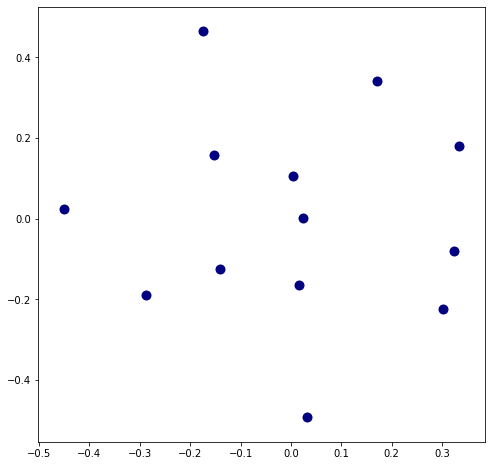

In [10]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=6)
pos = mds.fit(users_matrix)

coords = pos.embedding_

fig, ax1 = plt.subplots(1,1, figsize = (8,8))

#plt.subplots_adjust(bottom = 0.1)
s=100
plt.scatter(coords[:, 0], coords[:, 1], marker = 'o', color='navy', s=s, lw=0, label='MDS')

plt.table(sharp_dict)
for label, x, y in zip(users_ids, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.legend(scatterpoints=1, loc='best', shadow=False)


plt.show()

In [ ]:

similarities = euclidean_distances(users_matrix)

In [ ]:
similarities
similarities = similarities.max() / similarities * 100
similarities[np.isinf(similarities)] = 0

In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

n_samples = 20
seed = np.random.RandomState(seed=3)

similarities = euclidean_distances(users_matrix)


mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_

nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1,
                    n_init=1)
npos = nmds.fit_transform(similarities, init=pos)

# Rescale the data
#pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())
#npos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((npos ** 2).sum())

# Rotate the data
clf = PCA(n_components=2)
users_matrix = clf.fit_transform(users_matrix)

pos = clf.fit_transform(pos)

npos = clf.fit_transform(npos)

fig = plt.figure(figsize=(8,8))
ax = plt.axes([0., 0., 1., 1.])

s = 100
plt.scatter(users_matrix[:, 0], users_matrix[:, 1], color='navy', s=s, lw=0,
            label='True Position')
plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
plt.scatter(npos[:, 0], npos[:, 1], color='darkorange', s=s, lw=0, label='NMDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

similarities = similarities.max() / similarities * 100
similarities[np.isinf(similarities)] = 0

# Plot the edges
start_idx, end_idx = np.where(pos)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[users_matrix[i, :], users_matrix[j, :]]
            for i in range(len(pos)) for j in range(len(pos))]
values = np.abs(similarities)
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.Blues,
                    norm=plt.Normalize(0, values.max()))
lc.set_array(similarities.flatten())
lc.set_linewidths(np.full(len(segments), 0.5))
ax.add_collection(lc)

plt.show()


# Spectral Clustering

In [ ]:
from sklearn.cluster import SpectralClustering
import numpy as np
X = users_matrix

clustering = SpectralClustering(n_clusters=2,
             assign_labels="discretize",
             random_state=0).fit(X)



In [ ]:
clustering.labels_

In [ ]:
clustering

In [ ]:
Y = clustering.fit_predict(X)

In [ ]:
sharp_dict